# GML - Mini-Challenge 2 - FS 2022

**Ausgabe:** Montag, 25. April 2022  
**Abgabe:** Sonntag, 22. Mai 2022, bis 24 Uhr 

In diesem Mini-Challenge implementieren und verwenden wir verschiedene Methoden der Klassifikation, machen Gebrauch von Model Selection-Prinzipien und -Algorithmen und stellen Gedanken zu Ensemble Methoden an.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Colorbar, ..) um den Plot verstehen zu können.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Trainingcenter Repos vor Abgabetermin.  



- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Inhalte darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 - EDA (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, die Marke der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YOUR CODE HERE
df_moto = pd.read_csv('../data/moto.csv')
df_moto

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki


In [3]:
df_moto.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_shape        5619 non-null   object 
 1   colour            5605 non-null   object 
 2   condition         5619 non-null   object 
 3   displacement      5619 non-null   float64
 4   fuel              5612 non-null   object 
 5   has_mfk           5619 non-null   bool   
 6   performance       5619 non-null   float64
 7   price             5619 non-null   int64  
 8   curb_weight       5619 non-null   float64
 9   registration_age  5619 non-null   int64  
 10  mileage           5619 non-null   float64
 11  brand             5619 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 488.5+ KB


**Ueberblick verschaffen:**
1. Datentypen untersuchen
1. fehlende Werte und Outliers suchen
1. Fehler in den Daten Suchen und ggf. korrigieren
1. Kolinearität zwischen Attributen suchen
1. Variablen Transformationen untersuchen
1. Erweiterung eda mit Fokus auf Ziel Attribut (Marke der Motorräder)

**1.** Datentypen untersuchen
- Attr:body_shape hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:colour hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:condition hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:fuel hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:brand hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung

In [4]:
df_moto_clean = df_moto.copy()

attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']
for attr in attributs_cat:
    df_moto_clean[attr] = df_moto_clean[attr].astype("category")
df_moto_clean.dtypes

body_shape          category
colour              category
condition           category
displacement         float64
fuel                category
has_mfk                 bool
performance          float64
price                  int64
curb_weight          float64
registration_age       int64
mileage              float64
brand               category
dtype: object

**2.** fehlende Werte und Outliers suchen

In [5]:
# suche fehlende Werte
df_moto_clean.isna().sum()

body_shape           0
colour              14
condition            0
displacement         0
fuel                 7
has_mfk              0
performance          0
price                0
curb_weight          0
registration_age     0
mileage              0
brand                0
dtype: int64

Insgesamt gibt es 14 missings in colour und 7 in fuel. Es könnte untersucht werden wiso es zu fehlenden Werten kommt. Da es jedoch sehr wenige Werte sind werden diese entfernt.

In [6]:
df_moto_clean = df_moto_clean.dropna()

Untersuchen von Verteilungen und Outliers

<ipython-input-7-cbef72ecd990>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


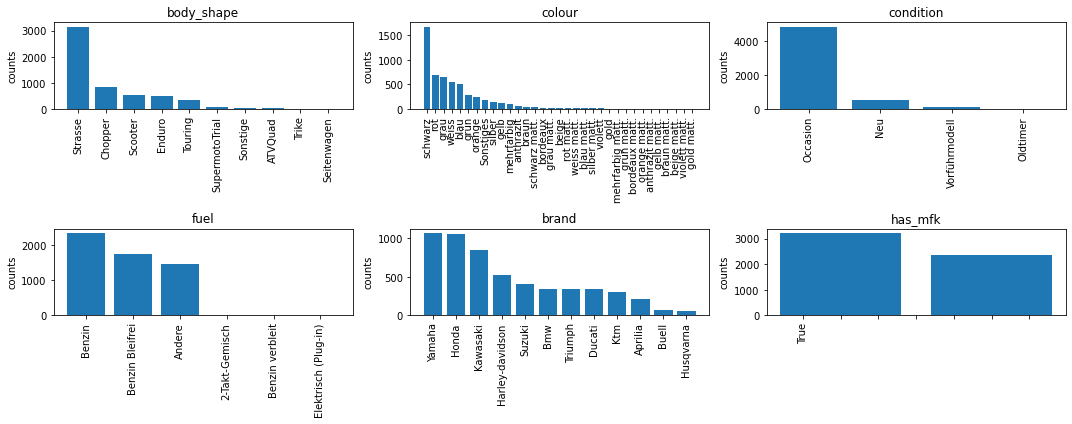

In [7]:
# Verteilung Kategorische Attribute absolute
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand', 'has_mfk']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts()
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

<ipython-input-8-becef6990993>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


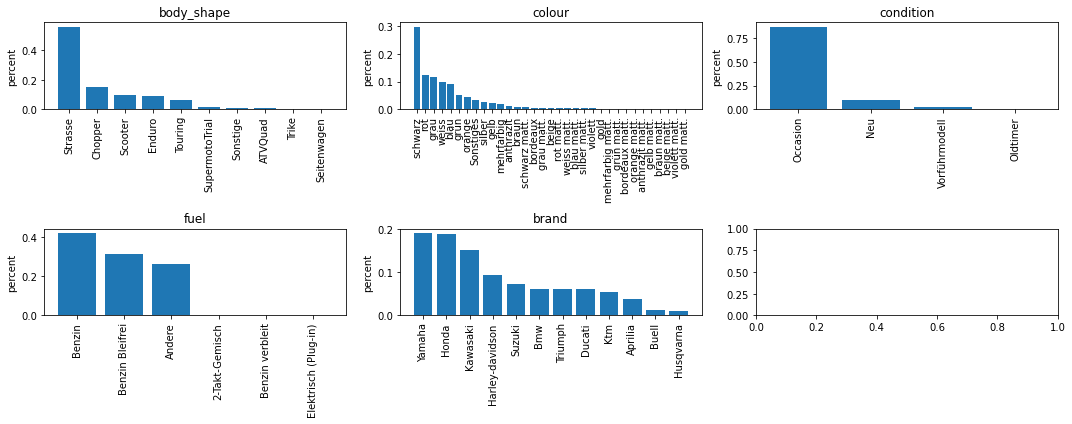

In [8]:
# Verteilung Kategorische Attribute relativ (Prozent)
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts() / len(df_moto_clean[attr])
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('percent')
fig.tight_layout()
plt.show()

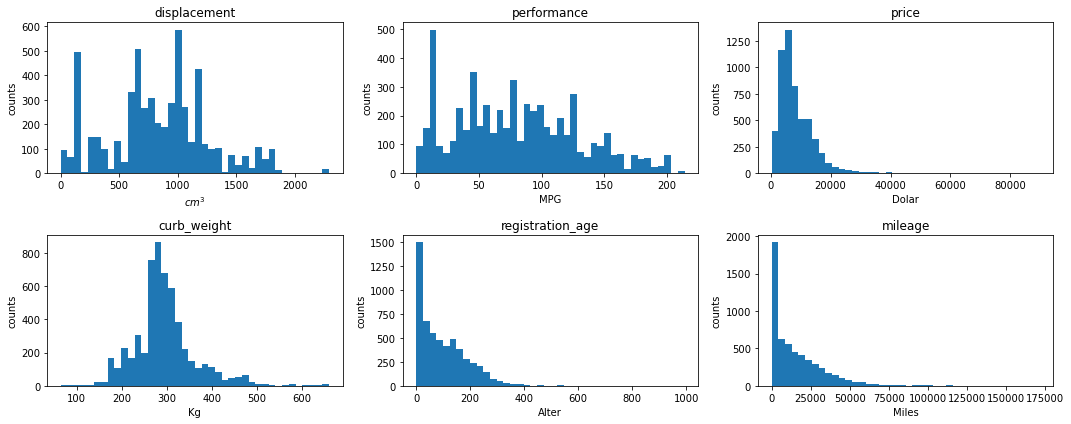

In [9]:
# Verteilung Numerischen Attributen
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
x_units = [r'$cm^3$', 'MPG', 'Dolar', 'Kg', 'Alter', 'Miles']

for i, attr in enumerate(attribut_num):
    ax[i].hist(df_moto_clean[[attr]], bins=40)
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

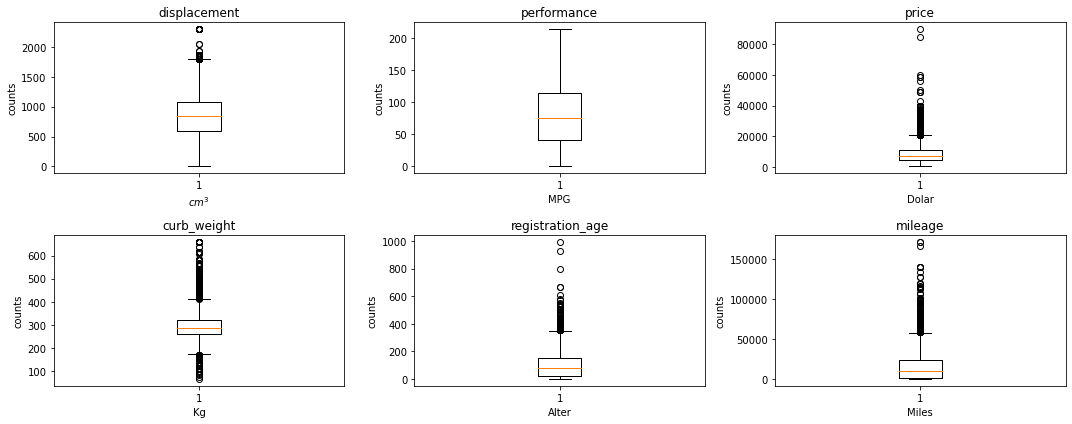

In [10]:
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()

for i, attr in enumerate(attribut_num):
    ax[i].boxplot(df_moto_clean[[attr]])
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

Fazit aus den oben erstellten Grafiken:
- In den Kategorische Attributen kommen einige Werte sehr oft vor und andere sehr selten. Zum Beispiel ist Condition zu +75% Occasionen, Farbe schwarz ist sehr dominierend mit 30%, die Fareb gold matt praktisch +0%, Oldtimer auch sehr tief). Fuel besteht hauptsächlich aus der Kategorie Benzin, Elektro Motorräder sind wenige vorhanden. 
- Achtung bei der Modellentwicklung mit sehr wenigen Daten in den Kategorischen Daten. Es könnten Modell trainiert werden mit einer gleichen Anzahl Datenpunkte je kategorischem Attribut. Dafür sind aber nicht genügend Daten vorhanden.
- In den Numerischen Werten sieht man ein logarithmisches Verhalten in Preis, Alter und Miles.
- In den Boxplots zeigt sich das Log-Verhalten erneut. 

**3.** Fehler in den Daten suchen
- Aus den Verteilungen der numerischen Daten sollten die 0-Werte oder nahe 0 Werte genauer untersucht werden. Zum Beispiel price, performance, displacement gleich oder nahe an 0 ergeben nicht viel Sinn.
- Bis auf das Attribut:Age sind die maximalen ranges der numersichen Variablen vernümpftige Werte, sollten aber bei der Modellentwicklung evtl erneut untersucht werden 

In [11]:
df_moto_clean[(df_moto_clean['displacement'] < 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1022,Scooter,orange,Occasion,1.0,Benzin verbleit,True,14.96,2800,179.0,46,29200.0,Ktm
3484,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,7800,179.0,35,1700.0,Ktm
3560,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),False,15.00,6900,179.0,58,887.0,Ktm
3561,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),False,15.00,12290,179.0,0,1.0,Ktm
3562,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,8500,179.0,22,300.0,Ktm
3563,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),True,15.00,12990,179.0,0,1.0,Ktm
4096,Enduro,blau,Vorführmodell,0.0,Benzin,True,0.00,14490,340.0,34,100.0,Yamaha
4581,Strasse,schwarz,Neu,15.0,Benzin,False,0.00,4480,182.0,0,1.0,Honda


In [12]:
df_moto_clean[(df_moto_clean['displacement'] > 1800)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
340,Chopper,Sonstiges,Occasion,2053.0,Andere,False,93.0,6000,565.0,141,29000.0,Kawasaki
366,Chopper,Sonstiges,Occasion,2053.0,Andere,False,103.0,7200,556.0,187,60000.0,Kawasaki
769,Chopper,Sonstiges,Occasion,2293.0,Andere,False,141.0,7700,585.0,177,13300.0,Triumph
772,Chopper,rot,Occasion,2294.0,Andere,False,140.0,9990,425.0,153,20236.0,Triumph
774,Chopper,rot,Occasion,2294.0,Andere,False,140.0,34900,425.0,128,38500.0,Triumph
...,...,...,...,...,...,...,...,...,...,...,...,...
5224,Touring,schwarz,Occasion,1867.0,Benzin,True,102.0,28500,488.0,29,19300.0,Harley-davidson
5285,Sonstige,schwarz,Occasion,1867.0,Benzin,True,94.0,35500,392.0,12,10.0,Harley-davidson
5286,Chopper,schwarz,Neu,1867.0,Benzin,True,94.0,42980,392.0,0,10.0,Harley-davidson
5300,Chopper,schwarz,Neu,1867.0,Benzin,True,91.0,28400,378.0,0,1.0,Harley-davidson


Werte unterhalb 40ccm sind eindeutig Datenfehler oder die wenigen Elektro-Motorräder und werden entfernt, Hubraum grösser 1800 ccm werden als Outlier gesehen und entfernt

In [13]:
# Werte unterhalb 40ccm sind eindeutig Datenfehler und werden entfernt
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['displacement'] < 40) | (df_moto_clean['displacement'] > 1800))]
df_moto_clean.shape

(5598, 12)


(5474, 12)

In [14]:
df_moto_clean[df_moto_clean['price'] < 500]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1913,Scooter,blau,Occasion,125.0,Andere,False,11.0,420,215.0,237,21440.0,Yamaha
2494,Scooter,grau,Occasion,125.0,Benzin Bleifrei,False,14.0,495,224.0,246,20554.0,Honda
2510,Scooter,schwarz,Occasion,49.0,Benzin Bleifrei,False,3.0,279,152.0,274,22200.0,Honda


In [15]:
df_moto_clean[df_moto_clean['price'] > 30_000]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
323,Chopper,grau,Occasion,903.0,Benzin Bleifrei,False,50.00,39500,353.0,130,1500.0,Kawasaki
414,Strasse,schwarz,Occasion,998.0,Benzin Bleifrei,True,200.00,31500,313.0,12,10.0,Kawasaki
2469,Touring,Sonstiges,Occasion,1500.0,Andere,False,82.96,30700,475.0,222,80000.0,Honda
2642,Strasse,schwarz,Oldtimer,1340.0,Benzin Bleifrei,False,40.00,56000,260.0,994,100.0,Harley-davidson
2669,Chopper,Sonstiges,Occasion,1449.0,Andere,False,70.00,32000,526.0,177,15000.0,Harley-davidson
2735,Chopper,anthrazit,Occasion,1689.0,Andere,True,74.00,33900,399.0,48,8042.0,Harley-davidson
2778,Touring,weiss,Occasion,1745.0,Andere,True,89.00,48900,463.0,21,30.0,Harley-davidson
2780,Touring,schwarz,Occasion,1745.0,Andere,True,90.00,33000,463.0,22,5283.0,Harley-davidson
2793,Touring,weiss,Occasion,1745.0,Andere,True,90.00,32900,451.0,26,14000.0,Harley-davidson
2808,Touring,Sonstiges,Occasion,1745.0,Andere,True,91.00,33000,487.0,43,4000.0,Harley-davidson


keine Preise mit 0 festgestellt. tiefste Preise scheinen erklärbar in Anbetracht der mileage. Preise über 30'000 scheinen z.B für Harley-davidson erklärbar. Werden dennoch als Outlier (34 stk.)gesehen und entfernt. Die Grenze kann beim Trainieren und Testen der Modell angepasst werden.

In [16]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~(df_moto_clean['price'] > 30_000)]
df_moto_clean.shape

(5474, 12)


(5440, 12)

In [17]:
print(f'max registartion_age = {df_moto_clean["registration_age"].max()}')
df_moto_clean[df_moto_clean['registration_age'] > 100]

max registartion_age = 930


,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
6,Strasse,rot,Occasion,750.0,Benzin Bleifrei,False,76.0,3900,220.0,340,48000.0,Kawasaki
7,Strasse,grau,Occasion,498.0,Benzin Bleifrei,False,27.0,3600,274.0,257,3500.0,Kawasaki
8,Strasse,Sonstiges,Occasion,499.0,Andere,False,34.0,2750,380.0,245,19390.0,Kawasaki
9,Chopper,grau,Occasion,124.0,Benzin Bleifrei,False,11.0,1900,223.0,245,11597.0,Kawasaki
10,Chopper,rot,Occasion,124.0,Benzin Bleifrei,False,12.0,2800,223.0,245,31200.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5612,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,6500,271.0,163,24000.0,Kawasaki
5613,Strasse,grün,Occasion,997.0,Benzin,False,175.0,4600,271.0,165,20730.0,Kawasaki
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki


Das Alter des Motorrads wäre ein gutes Attribut für das Modell. Da rund die hälfte älter > 100 ist, liegt die vermutung nahe das es sich hier Monate seit der Registrierung handel. Für eine bessere Übersicht wird das Alter zusätzlich in Jahren berechnet.

In [18]:
# Untersuche 0 Wert
df_moto_clean[(df_moto_clean['registration_age'] == 0) & (df_moto_clean['mileage'] > 100)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
3303,Strasse,orange,Neu,955.0,Benzin,False,98.0,7000,305.0,0,200.0,Triumph
3427,Strasse,schwarz,Neu,899.0,Benzin,False,55.0,9900,292.0,0,800.0,Triumph
3747,Strasse,weiss matt.,Neu,1037.0,Benzin,True,101.0,13700,303.0,0,150.0,Suzuki
3919,Strasse,blau,Neu,689.0,Benzin,False,75.0,8790,270.0,0,450.0,Yamaha
3946,Strasse,schwarz,Neu,847.0,Benzin,False,115.0,11390,285.0,0,250.0,Yamaha
3989,Trike,blau,Neu,847.0,Benzin,True,11.0,17790,338.0,0,300.0,Yamaha
4359,Strasse,schwarz,Neu,847.0,Benzin,True,115.0,11990,266.0,0,900.0,Yamaha
4368,Strasse,schwarz,Neu,997.0,Benzin,True,160.0,13690,285.0,0,250.0,Yamaha
5153,Strasse,rot,Neu,1198.0,Benzin,True,137.0,16890,286.0,0,120.0,Ducati
5397,Strasse,grau,Neu,649.0,Benzin,True,61.0,8700,300.0,0,900.0,Kawasaki


0 Werte scheinen ok zu sein, da Motorrad als neu verkauft wird.

In [19]:
df_moto_clean['age_year'] = np.round(df_moto_clean['registration_age'] / 12, 0)
df_moto_clean[(df_moto_clean['age_year'] > 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
395,Strasse,braun,Oldtimer,498.0,Benzin Bleifrei,False,60.00,12000,185.0,528,20000.0,Kawasaki,44.0
743,Strasse,Sonstiges,Occasion,125.0,Andere,False,12.00,2760,203.0,535,34800.0,Suzuki,45.0
903,Strasse,rot,Occasion,750.0,Benzin verbleit,False,53.00,9800,200.0,518,17500.0,Triumph,43.0
904,Strasse,blau,Oldtimer,744.0,Benzin Bleifrei,False,42.00,11000,205.0,488,35244.0,Triumph,41.0
1138,Touring,schwarz,Oldtimer,250.0,Benzin verbleit,False,12.00,6900,145.0,798,40100.0,Bmw,66.0
1447,Strasse,schwarz,Oldtimer,250.0,Benzin Bleifrei,False,18.00,7800,160.0,666,2550.0,Bmw,56.0
1448,Strasse,schwarz,Oldtimer,248.0,Benzin verbleit,False,18.00,7800,166.0,666,2500.0,Bmw,56.0
1449,Touring,schwarz,Oldtimer,600.0,Benzin Bleifrei,True,40.00,8900,210.0,547,80100.0,Bmw,46.0
2566,Strasse,mehrfarbig,Occasion,249.0,Benzin Bleifrei,True,26.00,2200,160.0,572,51734.0,Honda,48.0
2567,Strasse,rot,Oldtimer,750.0,Benzin verbleit,True,67.00,12000,240.0,523,46000.0,Honda,44.0


Sechs Motorräder sind älter als 50 Jahre mit max = 83. Für oldtimer scheint das wohl möglich. Zusätzlich soll noch nach mileage gefiltert werden. Alte Motorräder mit wenig Fahrkilometer können vorkommen aber können als Outlier entfernt werden.
Bei der Modellentwicklung schauen obe es sinnvoller ist nach quantilen zu entfernen.

In [20]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['age_year'] > 30) & (df_moto_clean['mileage'] < 5000))]
df_moto_clean = df_moto_clean[~(df_moto_clean['age_year'] > 50)]
df_moto_clean.shape

(5440, 13)


(5431, 13)

In [21]:
df_moto_clean[(df_moto_clean['performance'] < 5) & (df_moto_clean['displacement'] > 100)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
3011,Touring,blau,Occasion,1340.0,Benzin Bleifrei,False,1.0,18000,300.0,248,31500.0,Harley-davidson,21.0
3262,Strasse,schwarz,Vorführmodell,948.0,Benzin,False,0.0,8700,285.0,21,2070.0,Kawasaki,2.0
3347,Strasse,schwarz,Occasion,744.0,Benzin,False,0.0,11500,200.0,356,9700.0,Triumph,30.0
3471,Strasse,mehrfarbig,Oldtimer,750.0,Benzin,False,0.0,14000,240.0,500,9900.0,Triumph,42.0
3472,Strasse,mehrfarbig,Oldtimer,490.0,Benzin,False,0.0,12500,155.0,578,12000.0,Triumph,48.0
3564,Enduro,orange,Neu,250.0,Benzin,True,0.0,7890,98.0,0,1.0,Ktm,0.0
3606,Enduro,orange,Vorführmodell,250.0,Benzin,False,0.0,9900,99.0,12,1.0,Ktm,1.0
3805,Scooter,weiss,Neu,113.0,Benzin,False,0.0,2695,180.0,0,1.0,Suzuki,0.0
4344,Strasse,violett matt.,Occasion,689.0,Benzin,False,0.0,5500,263.0,56,15000.0,Yamaha,5.0
4345,Strasse,rot matt.,Occasion,689.0,Benzin,True,0.0,5700,263.0,41,12000.0,Yamaha,3.0


Die 'Performance' also Leistung der Motorräder kann nicht 0 sein. Vermutlich Werte ab 5 sind plausible, sollten aber auch einen kleinen Hubraum haben. Hier werden wenig Leistung und grosse Hubräume entfernt.

In [22]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['performance'] < 5) & (df_moto_clean['displacement'] > 100))]
df_moto_clean.shape

(5431, 13)


(5407, 13)

**4.** Koolinearitäten prüfen  
Bei Modellen sollte auf Attribute geachtet werden die nicht unabhängig von einander sind. Hohe $R^2$ Werte weisen auf Kolinearität hin (>0.8).   
*Bemerkung: Die folgende Tabelle mit Pearson Korrelation kann nur Koolinearität finden aber nicht feststellen ob keine vorhanden ist. Um Kolinearität auszuschliessen könnten Modelle mit einzelnen Attributen als Zielvariable benutzt werden.*

In [23]:
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
attribut_corr = df_moto_clean[attribut_num].corr()
attribut_corr.style.background_gradient(cmap='coolwarm')

,displacement,performance,price,curb_weight,registration_age,mileage
displacement,1.000000,0.656373,0.611493,0.763294,0.089954,0.224235
performance,0.656373,1.000000,0.468723,0.352042,-0.063025,0.102137
price,0.611493,0.468723,1.000000,0.462899,-0.373818,-0.313942
curb_weight,0.763294,0.352042,0.462899,1.000000,0.074615,0.200733
registration_age,0.089954,-0.063025,-0.373818,0.074615,1.000000,0.688353
mileage,0.224235,0.102137,-0.313942,0.200733,0.688353,1.000000


[]

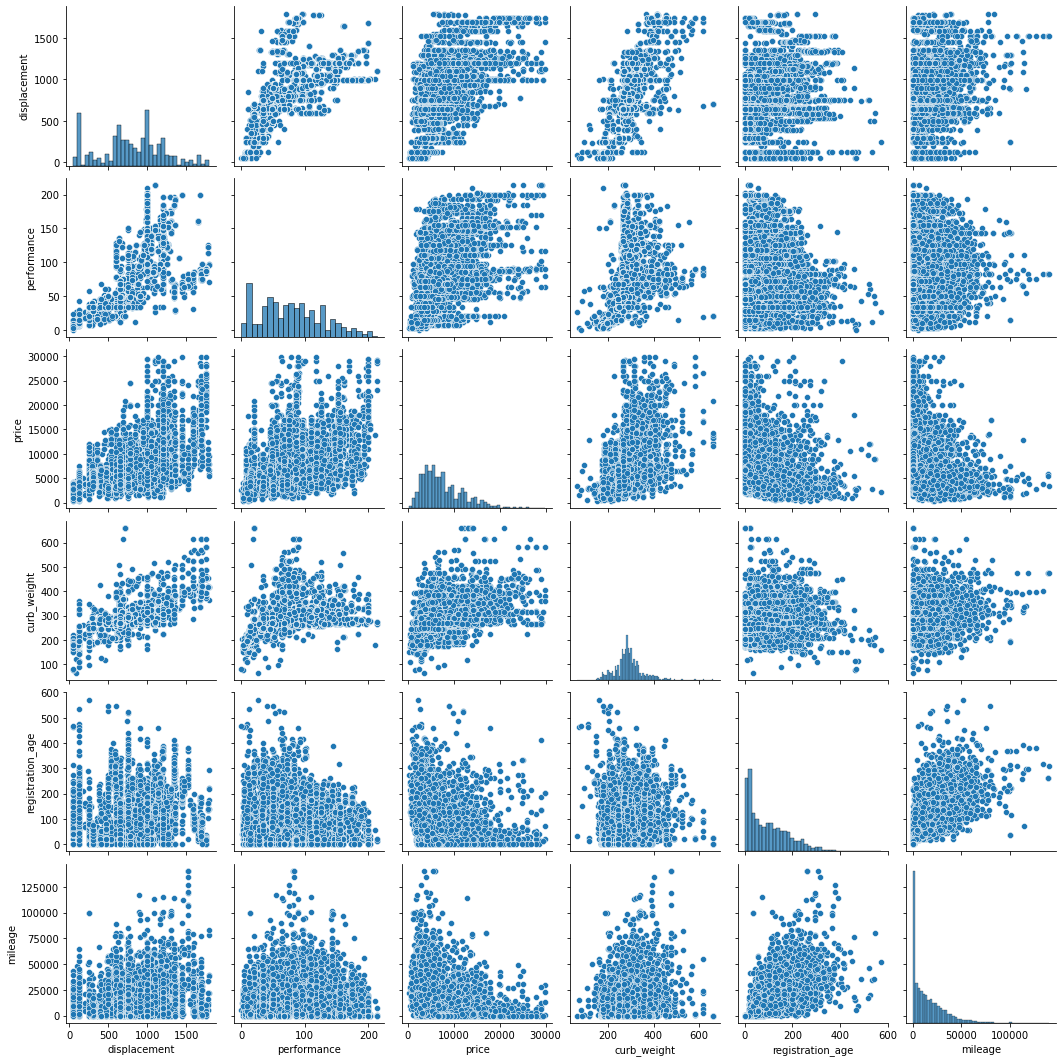

In [24]:
import seaborn as sns
sns.pairplot(df_moto_clean[attribut_num])
plt.plot()

Attribute wie MPG-Displacment und curb_weigt-displacment zeigen eine hohe Korrelation. Da $R^2 < 0.8$ ist werden sie beibehalten, aber in der Modellentwicklung könnte getestet werden was passiert, wenn eine der Variablen weggelassen wird (sinkt der R2-Score beträchtlich oder nur minim).

**5.** Variablen transformationen 
Preis, Alter und Miles zeigen ein logarithmisches Verhalten. Dies könnten Transformiert werden um eine Normalverteilung zu erhalten. Da Gewicht, Alter, Preis unterschiedlich Gross sind, würde auch ein Standardisierung auch Sinn. Obwohl Gewicht und Alter nicht zu sehr ausseinander liegen.

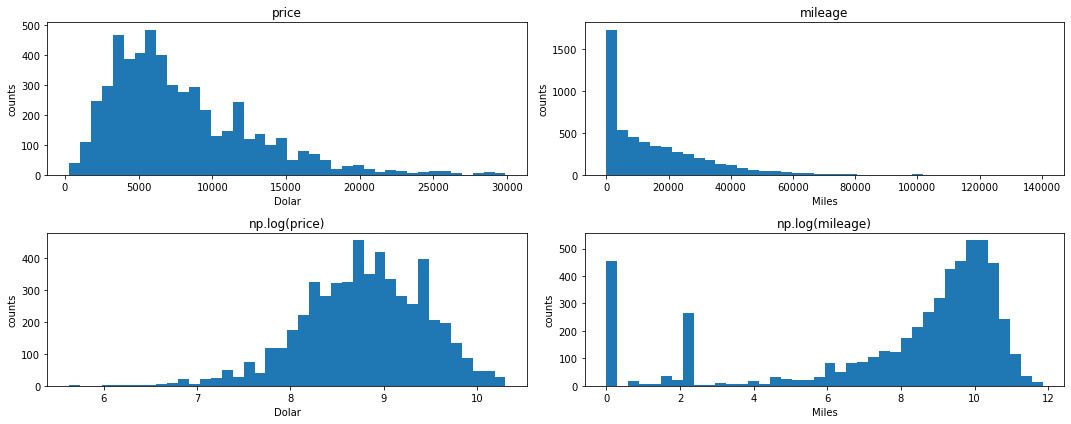

In [25]:
# Zeigen das mit log Transformation Daten normal verteilt sind (registration_age enthält 0 Werte)
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()
attribut_log = ['price', 'mileage'] * 2
x_units_log = ['Dolar', 'Miles'] * 2

for i, attr in enumerate(attribut_log):
    if i <=1:
        ax[i].hist(df_moto_clean[[attr]], bins=40)
        ax[i].set_title(attr)
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')
    else:
        ax[i].hist(np.log(df_moto_clean[[attr]]), bins=40)
        ax[i].set_title(f'np.log({attr})')
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')    
    
fig.tight_layout()
plt.show()

**6.** Erweiterung eda mit Fokus auf Ziel Attribut (Marke der Motorräder)  
1. Festlegen welche Attribute verwendet werden sollen
- body_shape: Spezifische Marken produzieren evtl. nur gewisse Motorradtypen
- color: auch wenn Farbe nicht spezifische auf die Marke schliessen lässt, haben bestimmte Marken bevorzugte Farben (Kawasaki-grün)
- condition: da 80% der Motorräder als Occasion markiert sind, wird dieses Attribut vorerst weggelassen
- fuel: 70% sind Benzin Motoren (Benzin + Benzin Bleifrei) die übrigen Kategorien sind praktisch nicht vertreten. Fuel wird vorerst nicht verwendet.
- Bei den nummerischen Attributen werden 'displacment', 'performance', 'price', 'curb_weight' und 'milage' verwendet

2. Prüfen ob Kategorien von Attributen, die selten vorkommen entfernt, kombiniert oder mit upsampling erweitert werden sollen  
- body_shape: Kategorie 'Strasse'domminiert mit >50% der Werten. 

In [26]:
df_moto_clean_mlp = df_moto_clean.copy()
attributs_cat = ['body_shape', 'colour']

body_s_count = pd.DataFrame(df_moto_clean_mlp['body_shape'].value_counts())
body_s_count['percent'] = df_moto_clean_mlp['body_shape'].value_counts() / len(df_moto_clean_mlp[attr])
body_s_count

,body_shape,percent
Strasse,3091,0.571666
Chopper,783,0.144812
Scooter,556,0.102830
Enduro,511,0.094507
Touring,301,0.055669
SupermotoTrial,70,0.012946
Sonstige,44,0.008138
ATVQuad,41,0.007583
Trike,7,0.001295
Seitenwagen,3,0.000555


Kategorien Trike und Seitenwagen. Mit 10 Observationen zu klein für eine vernümpftige Klassifikation.

In [27]:
print(df_moto_clean.shape)
df_moto_clean_mlp = df_moto_clean_mlp[(df_moto_clean_mlp['body_shape'] != 'Trike') & (df_moto_clean_mlp['body_shape'] != 'Seitenwagen')]
df_moto_clean_mlp.shape

(5407, 13)


(5397, 13)

- bei den Farben fällt die seperate Aufteilung der seltenen Matt-Farben auf. Um die Information "Matt" nicht einfach zu entfernen soll eine zusätzliches binäres Attribut für die Option 'Matt' (is_matt) dem Datensatz beigefügt werden und die Farben dann kombiniert werden.

In [28]:
df_moto_clean_mlp['colour'].value_counts().index

CategoricalIndex(['schwarz', 'rot', 'grau', 'weiss', 'blau', 'grün', 'orange',
                  'Sonstiges', 'silber', 'gelb', 'mehrfarbig', 'anthrazit',
                  'braun', 'schwarz matt.', 'bordeaux', 'beige', 'grau matt.',
                  'weiss matt.', 'rot matt.', 'blau matt.', 'silber matt.',
                  'violett', 'gold', 'grün matt.', 'mehrfarbig matt.',
                  'orange matt.', 'bordeaux matt.', 'anthrazit matt.',
                  'gelb matt.', 'braun matt.', 'gold matt.', 'beige matt.',
                  'violett matt.'],
                 categories=['Sonstiges', 'anthrazit', 'anthrazit matt.', 'beige', 'beige matt.', 'blau', 'blau matt.', 'bordeaux', ...], ordered=False, dtype='category')

In [29]:
# Farbe teilen und neuen spalten namen zuordnen. is_matt als 1 / o codieren
df_moto_clean_mlp[['colour2', 'is_matt']] = df_moto_clean_mlp['colour'].str.split(' ', n=1, expand=True)
df_moto_clean_mlp.loc[:, 'is_matt'] = np.where(df_moto_clean_mlp['is_matt'] == 'matt.', 1, 0)
df_moto_clean_mlp

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year,colour2,is_matt
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0,schwarz,0
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0,rot,0
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0,grün,0
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki,0.0,schwarz,0
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki,1.0,grau,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki,11.0,weiss,0
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki,13.0,schwarz,0
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki,9.0,schwarz,1
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki,0.0,schwarz,0


In [30]:
color_count = pd.DataFrame(df_moto_clean_mlp['colour2'].value_counts())
color_count['percent'] = df_moto_clean_mlp['colour2'].value_counts() / len(df_moto_clean_mlp[attr])
color_count

,colour2,percent
schwarz,1649,0.305540
rot,700,0.129702
grau,670,0.124143
weiss,559,0.103576
blau,506,0.093756
grün,289,0.053548
orange,235,0.043543
Sonstiges,183,0.033908
silber,153,0.028349
gelb,125,0.023161


Damit sieht die Aufteilung bereits übersichtlicher aus. Schwarz ist die am häufigsten verbreitete Farbe. Folgend wird eine Gruppierung der Marken und die vorkommenden Farben gezeigt. Bestimmte Marken wie KTM und Kawasaki haben ihre Markenfarbe. Somit könnte anhand der Farben auch auf gewisse Marken geschlossen werden.

In [31]:
# Aufteilung Marken und Farbe absolut
df_colour_grouped = pd.DataFrame(df_moto_clean_mlp.groupby('brand')['colour2'].value_counts())
df_colour_grouped.rename(columns={'colour2':'counts'}, inplace=True)
df_colour_grouped = df_colour_grouped.reset_index()
df_colour_grouped = df_colour_grouped.pivot(index='colour2', columns= 'brand', values='counts')
df_colour_grouped

brand,Aprilia,Bmw,Buell,Ducati,Harley-davidson,Honda,Husqvarna,Kawasaki,Ktm,Suzuki,Triumph,Yamaha
colour2,,,,,,,,,,,,
Sonstiges,3.0,13.0,2.0,9.0,41.0,56.0,NaN,22.0,9.0,9.0,6.0,13.0
anthrazit,NaN,4.0,NaN,4.0,8.0,23.0,1.0,4.0,NaN,3.0,3.0,23.0
beige,NaN,4.0,NaN,NaN,4.0,10.0,NaN,6.0,NaN,NaN,1.0,2.0
blau,12.0,48.0,8.0,NaN,22.0,55.0,1.0,45.0,3.0,98.0,33.0,181.0
bordeaux,2.0,1.0,2.0,1.0,4.0,12.0,NaN,4.0,NaN,3.0,NaN,8.0
braun,NaN,4.0,NaN,2.0,7.0,6.0,NaN,14.0,NaN,6.0,2.0,9.0
gelb,4.0,14.0,1.0,15.0,7.0,11.0,NaN,7.0,3.0,18.0,18.0,27.0
gold,NaN,NaN,1.0,NaN,3.0,6.0,NaN,NaN,NaN,NaN,1.0,2.0
grau,38.0,55.0,1.0,21.0,26.0,115.0,2.0,114.0,5.0,51.0,36.0,206.0


In [32]:
# Aufteilung Marken und Farbe in prozent
df_colour_grouped_proz = df_colour_grouped.copy()
for col in df_colour_grouped_proz.columns:
    df_colour_grouped_proz[col] = (df_colour_grouped[col] / np.sum(df_colour_grouped[col]) * 100).round(2)
df_colour_grouped_proz

brand,Aprilia,Bmw,Buell,Ducati,Harley-davidson,Honda,Husqvarna,Kawasaki,Ktm,Suzuki,Triumph,Yamaha
colour2,,,,,,,,,,,,
Sonstiges,1.41,3.78,3.03,2.67,9.38,5.52,NaN,2.64,3.00,2.23,1.88,1.22
anthrazit,NaN,1.16,NaN,1.19,1.83,2.27,1.59,0.48,NaN,0.74,0.94,2.16
beige,NaN,1.16,NaN,NaN,0.92,0.99,NaN,0.72,NaN,NaN,0.31,0.19
blau,5.63,13.95,12.12,NaN,5.03,5.42,1.59,5.40,1.00,24.32,10.31,16.96
bordeaux,0.94,0.29,3.03,0.30,0.92,1.18,NaN,0.48,NaN,0.74,NaN,0.75
braun,NaN,1.16,NaN,0.59,1.60,0.59,NaN,1.68,NaN,1.49,0.62,0.84
gelb,1.88,4.07,1.52,4.45,1.60,1.08,NaN,0.84,1.00,4.47,5.62,2.53
gold,NaN,NaN,1.52,NaN,0.69,0.59,NaN,NaN,NaN,NaN,0.31,0.19
grau,17.84,15.99,1.52,6.23,5.95,11.34,3.17,13.69,1.67,12.66,11.25,19.31


In der zweiten Tabelle sieht man die "Markenfarben" der Hersteller als prozuentaler Anteil. Ktm's sind zu 50% Orange, 25% der Kawasaki's sind grün, Harley-Davidson sind zu 55% schwarz. In der Farbe sind somit auch ein Teil an Informationen für die Vorhersage der Marke enthalten.

3. Numerische Werte  
Die Verteilungen der Numerischen Werte sehen, bis auf 'price' und 'milage', vernümpftig aus. 'price' und 'milage' werden, um eine Normalverteilung zu erhalten, Log-Transformiert.

In [33]:
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']

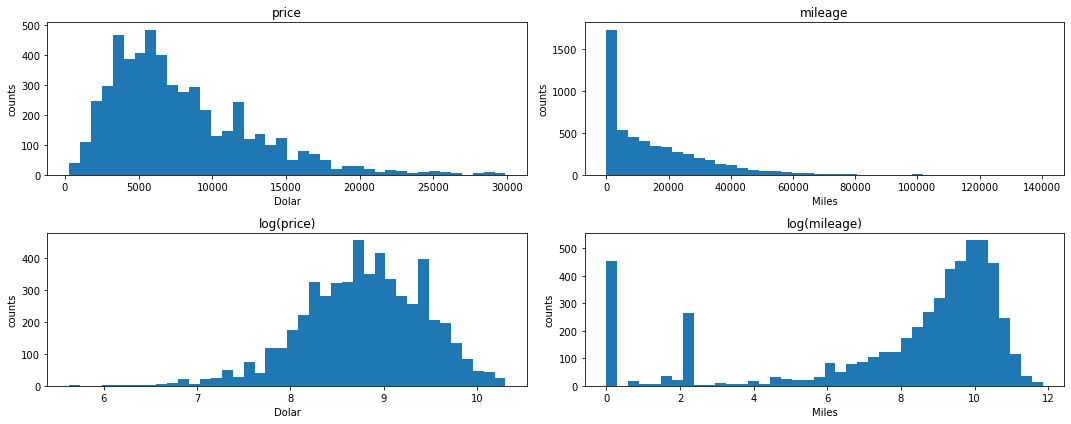

In [34]:
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()
attribut_num = ['price', 'mileage']
x_units = [r'Dolar', 'Miles']

for i, attr in enumerate(attribut_num):
    ax[i].hist(df_moto_clean_mlp[[attr]], bins=40)
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
    
# Log-Transformation price und milage
df_moto_clean_mlp.loc[:, 'price'] = np.log(df_moto_clean_mlp['price'])
df_moto_clean_mlp.loc[:, 'mileage'] = np.log(df_moto_clean_mlp['mileage'])
    
for i, attr in enumerate(attribut_num):
    ax[i+2].hist(df_moto_clean_mlp[[attr]], bins=40)
    ax[i+2].set_title(f'log({attr})')
    ax[i+2].set_xlabel(x_units[i])
    ax[i+2].set_ylabel('counts')    
fig.tight_layout()
plt.show()

4. Untersuchen des Ziel Attributs 'brand'
Yahama, Honda, Kawasaki sind die häufigsten Marken. Buell und Husqvarna mit je ca. 60 Observationen sind eher selten.
Bei den Marken mit wenigen Observationen wird eine Falsch Klassifikation in den Scores nicht korrekt festgestellt (nur ein kleiner Teil mit falschen Vorhersagen). Das einfachste wäre die beiden Marken (Buell und Husqvarna) zu entfernen und in der Beschreibung der Modell Vorhersagen zu erwähnen, das für eine Klassifikation für die beiden Marken zu wenig Daten vorhanden sind.  

Eine weitere Möglichkeit wäre ein Up-/Downsampling. Dabei werden die Observationen von seltenen Marken künstlich, mit Kopien, erhöht und die der häufigen Marken (Yahama, Honda, Kawasakit) reduziert:

In [35]:
brand_count = pd.DataFrame(df_moto_clean_mlp['brand'].value_counts())
brand_count['percent'] = df_moto_clean_mlp['brand'].value_counts() / len(df_moto_clean_mlp[attr])
brand_count

,brand,percent
Yamaha,1067,0.197702
Honda,1014,0.187882
Kawasaki,833,0.154345
Harley-davidson,437,0.080971
Suzuki,403,0.074671
Bmw,344,0.063739
Ducati,337,0.062442
Triumph,320,0.059292
Ktm,300,0.055586
Aprilia,213,0.039466


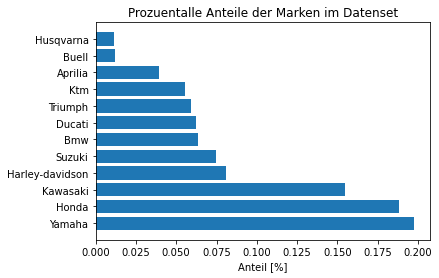

In [36]:
plt.barh(brand_count.index, brand_count['percent'])
plt.title('Prozuentalle Anteile der Marken im Datenset')
plt.xlabel('Anteil [%]')
plt.show()

In [37]:
# Attribute zu unterschiedlichen Anteilen verarbeitet
df_moto_sampling1 = pd.DataFrame()

# Marken namen ohne sampling
brand_names = ['Harley-davidson', 'Suzuki', 'Bmw', 'Ducati', 'Triumph', 'Ktm']
for brand in brand_names:
    # df mit Markenname
    act_brand = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == brand]        
    df_moto_sampling1 = pd.concat([df_moto_sampling1, act_brand])
df_moto_sampling1.shape

(2141, 15)

In [38]:
# Downsampling Yamaha, Honda, Kawasaki
from sklearn.utils import resample
n_sample = 500

yamaha = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Yamaha']
yam_downsample = resample(yamaha,
             replace=False,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, yam_downsample])

honda = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Honda']
hon_downsample = resample(honda,
             replace=False,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, hon_downsample])

kawasaki = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Kawasaki']
kaw_downsample = resample(kawasaki,
             replace=False,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, kaw_downsample])

print(f'Downsampling Yamaha: {yam_downsample.shape}')
print(f'Downsampling Honda: {hon_downsample.shape}')
print(f'Downsampling Kawasaki: {kaw_downsample.shape}')

Downsampling Yamaha: (500, 15)
Downsampling Honda: (500, 15)
Downsampling Kawasaki: (500, 15)


In [39]:
# Upsampling Buell, Husqvarna
from sklearn.utils import resample
n_sample = 250

buell = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Buell']
bue_downsample = resample(buell,
             replace=True,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, bue_downsample])

husqvarna = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Husqvarna']
hus_downsample = resample(husqvarna,
             replace=True,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, hus_downsample])

aprilia = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Aprilia']
apr_downsample = resample(aprilia,
             replace=True,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, apr_downsample])


print(f'Upsampling Buell: {bue_downsample.shape}')
print(f'Upsampling Husqvarna: {hus_downsample.shape}')
print(f'Upsampling Aprilia: {apr_downsample.shape}')

Upsampling Buell: (250, 15)
Upsampling Husqvarna: (250, 15)
Upsampling Aprilia: (250, 15)


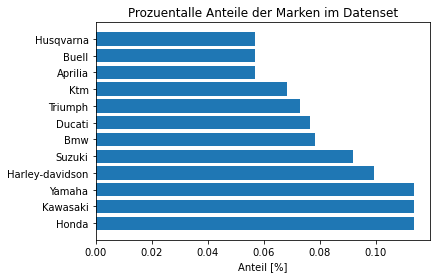

In [40]:
# Berechen Marken Anteile auf dem korrigierten Datensatz
brand_resample_count = pd.DataFrame(df_moto_sampling1['brand'].value_counts())
brand_resample_count['percent'] = df_moto_sampling1['brand'].value_counts() / len(df_moto_sampling1[attr])
brand_resample_count

# Plot die Anteile
plt.barh(brand_resample_count.index, brand_resample_count['percent'])
plt.title('Prozuentalle Anteile der Marken im Datenset')
plt.xlabel('Anteil [%]')
plt.show()

Ein zweiter Ansatz um die Anteil-unterschiede in der Ziel Variable zu beheben ist ein Resample auf alle Marken zu machen.

In [41]:
# Alle Attribute resamplen zu gleichen Anteilen im Datensatz
df_moto_sampling2 = pd.DataFrame()
n_sample = 500

brand_names = df_moto_clean_mlp['brand'].unique()
for brand in brand_names:
    # df mit Markenname
    act_brand = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == brand]
    # up or downsample 
    up_downsample = resample(act_brand,
             replace=True,
             n_samples=n_sample,
             random_state=42)
    
    df_moto_sampling2 = pd.concat([df_moto_sampling2, up_downsample])
print(f'erwartet Zeilen: {n_sample * len(brand_names)}, Zeilen nach resampling: {df_moto_sampling2.shape[0]}')
df_moto_sampling2

erwartet Zeilen: 6000, Zeilen nach resampling: 6000


,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year,colour2,is_matt
102,Chopper,schwarz,Occasion,649.0,Benzin Bleifrei,True,68.0,8.881836,469.0,17,5.857933,Kawasaki,1.0,schwarz,0
439,Strasse,schwarz,Occasion,296.0,Benzin Bleifrei,True,39.0,8.691146,243.0,12,2.302585,Kawasaki,1.0,schwarz,0
270,Strasse,schwarz,Occasion,773.0,Benzin Bleifrei,False,48.0,8.974618,292.0,65,10.338511,Kawasaki,5.0,schwarz,0
106,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,48.0,9.391828,301.0,12,2.302585,Kawasaki,1.0,schwarz,0
71,Chopper,grau,Occasion,948.0,Andere,True,125.0,8.948976,357.0,29,9.448570,Kawasaki,2.0,grau,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,Strasse,schwarz,Occasion,1099.0,Benzin,False,154.0,9.169518,271.0,125,10.184900,Ducati,10.0,schwarz,0
5152,Strasse,schwarz,Occasion,583.0,Benzin,False,54.0,8.342840,265.0,259,9.740969,Ducati,22.0,schwarz,0
3218,Strasse,schwarz,Occasion,583.0,Benzin Bleifrei,False,33.0,8.160518,265.0,273,10.308953,Ducati,23.0,schwarz,0
3140,Strasse,rot,Occasion,1198.0,Andere,False,184.0,10.160066,226.0,89,9.287301,Ducati,7.0,rot,0


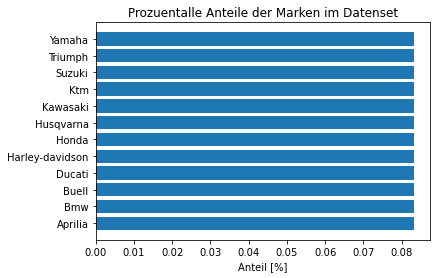

In [42]:
# Berechen Marken Anteile auf dem korrigierten Datensatz
brand_resample_count = pd.DataFrame(df_moto_sampling2['brand'].value_counts())
brand_resample_count['percent'] = df_moto_sampling2['brand'].value_counts() / len(df_moto_sampling2[attr])
brand_resample_count

# Plot die Anteile
plt.barh(brand_resample_count.index, brand_resample_count['percent'])
plt.title('Prozuentalle Anteile der Marken im Datenset')
plt.xlabel('Anteil [%]')
plt.show()

Inwieweit ein resampling auf seltene Daten angewednet werden soll, soll später im MPL geprüft werden (Buell bei df_moto_sampling2 mit je 5 Kopien je Observation könnten zu viel sein).

YOUR ANSWER HERE

### Aufgabe 2 - Testing / Metrics (4 Punkte)

Unterteile den Datensatz sinnvoll in Trainings- und Testteil. Wir werden von diesen Teilen in sämtlichen kommenden Aufgaben Gebrauch machen.

Als Zielmetrik werden wir über alle kommenden Aufgaben mit dem mittleren F1-Score arbeiten, individuell berechnet über alle Klassen.  
Erörtere, was die Eigenschaften dieser Metrik sind und wann sie sinnvoll ist, wann nicht. Trifft dies hier zu?

**Aufteilung des Datensatz**  
Damit eine gleiche Verteilung der Klassen des Attributs 'Brand' auch in den Testdaten enthalten ist, wird der Parameter `stratify` von `sklearn.model_selection.train_test_split` verwendet. ´shuffel´ wird verwendet um allfällige Ordnung im Datenset zu umgehen. 

In [43]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# datenset mit ausgewählten Attributen
mlp_attr = ['body_shape', 'colour2', 'displacement', 'performance', 'price', 'curb_weight', 'mileage', 'brand']
#df_moto_sampling1_mlp = df_moto_sampling1[mlp_attr].copy()
df_moto_mlp = df_moto_clean_mlp[mlp_attr].copy()

# Resampling Test 1
#X = df_moto_sampling1_mlp.drop('brand', axis=1).copy()
#y = df_moto_sampling1_mlp['brand'].copy()

# Resampling Test 2
X = df_moto_mlp.drop('brand', axis=1)
y = df_moto_mlp['brand'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y,
                                                     shuffle=True, random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (4317, 7), y_train shape: (4317,)
X_test shape: (1080, 7), y_test shape: (1080,)


Wie im eda-teil erwähnt sollte die Klassen Inbalance von 'Brand' behandelt werden. Hier durch up-downsampling angesprochen. Wichtig ist dass dies nicht auf dem ganzen Datenset ausgeführt wird, sondern nur auf den Trainingsdaten um das Modell zu trainieren. Die Testdaten sollen das gleiche Verhältniss der Klassen wie im Datenst abbilden, resp die echte Verteilungn der Klasse zeigen.  

Folgens das up-downsampling auf den Trainningsdaten auf je 500 Observationen je Klasse:

In [44]:
# Alle Attribute resamplen zu gleichen Anteilen im Datensatz nur auf den Trainingsdaten
n_sample = 500
Xy_train_concat = pd.concat([X_train, y_train], axis=1).copy()
Xy_train_upsampling = pd.DataFrame()

brand_names = Xy_train_concat['brand'].unique()
for brand in brand_names:
    # df mit Markenname
    act_brand = Xy_train_concat[Xy_train_concat['brand'] == brand]
    # up or downsample 
    up_downsample = resample(act_brand,
             replace=True,
             n_samples=n_sample,
             random_state=42)
    
    Xy_train_upsampling = pd.concat([Xy_train_upsampling, up_downsample])
print(f'erwartet Zeilen: {n_sample * len(brand_names)}, Zeilen nach resampling: {Xy_train_upsampling.shape[0]}')
Xy_train_upsampling

# Aufteilung zurück in X_train und y_train
X_train = Xy_train_upsampling.drop('brand', axis=1)
y_train = Xy_train_upsampling['brand']

erwartet Zeilen: 6000, Zeilen nach resampling: 6000


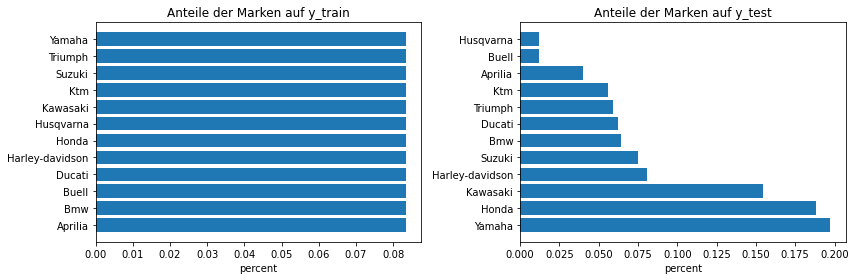

In [45]:
# Testen der Aufteilung der Marken
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax = ax.flatten()
   
# Berechen Marken Anteile auf dem korrigierten Datensatz
count_train = pd.DataFrame(y_train.value_counts())
count_train['percent'] = y_train.value_counts() / len(y_train)
count_train

ax[0].barh(count_train.index, count_train['percent'])
ax[0].set_title('Anteile der Marken auf y_train')
ax[0].set_xlabel('percent')

# Berechen Marken Anteile auf dem korrigierten Datensatz
count_test = pd.DataFrame(y_test.value_counts())
count_test['percent'] = y_test.value_counts() / len(y_test)
count_test

ax[1].barh(count_test.index, count_test['percent'])
ax[1].set_title('Anteile der Marken auf y_test')
ax[1].set_xlabel('percent')

plt.tight_layout()
plt.show()

Folgend werden die **Trainings- und Testdaten** noch **standardisiert** um das Verhältnisse der Attributen auf ein vergleichbares Niveau zu bringen. Da bei der Standardisierung die Mittelwerte und Standardabweichung berechnet werden, wird die Operation seperat auf die Trainings- und Testdaten angewendet und nicht bereits im Eda-Teil. Damit soll 'Information Leakage' von den Testdaten auf die Trainingsdaten reduziert werden. Weiter werden **Dummy-Variablen von den Kategorischen Attributen** erzeugt:

In [46]:
from sklearn import preprocessing

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Standardisierung von X_train und X_test
normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
X_train_scaler = preprocessing.StandardScaler().fit(X_train[normalize_attr])
X_test_scaler = preprocessing.StandardScaler().fit(X_test[normalize_attr])

# Standardisierte Werte schreiben
X_train_scaled.loc[:, normalize_attr] = X_train_scaler.transform(X_train[normalize_attr])
X_test_scaled.loc[:, normalize_attr] = X_test_scaler.transform(X_test[normalize_attr])

# Dummie Variablen von den Kategorischen Attributen erzeugen
X_train_scaled = pd.get_dummies(X_train_scaled)
X_test_scaled = pd.get_dummies(X_test_scaled)
X_train_scaled

,displacement,performance,price,curb_weight,mileage,body_shape_ATVQuad,body_shape_Chopper,body_shape_Enduro,body_shape_Scooter,body_shape_Seitenwagen,...,colour2_gold,colour2_grau,colour2_grün,colour2_mehrfarbig,colour2_orange,colour2_rot,colour2_schwarz,colour2_silber,colour2_violett,colour2_weiss
4612,-0.236345,-0.574659,-0.298031,0.089207,-0.155093,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2354,-0.596070,0.401102,-0.998341,-0.088733,0.661371,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2150,-1.392425,-1.197485,-0.325506,-0.299026,-2.433115,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2100,0.391313,0.255776,1.144738,0.348029,-0.710847,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2322,-0.596070,0.401102,-0.592855,-0.088733,0.313987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-0.365350,-0.159442,0.909684,-0.719611,-1.833289,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3723,-1.218765,-1.384333,0.329729,-1.544606,-0.957372,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3246,-0.367830,-0.159442,0.536719,-0.719611,-0.075099,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3707,-0.365350,-0.159442,0.820869,-0.881375,-1.833289,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Eigenschaften der F1-Metrik**  

Der F1-Score setzt sich aus Precision und Recall zusammen. Daher werden diese und Accuracy kurz erläutert:

Die **Accuracy** berechnet die Anzahl korrekten Klassifikation dividiert durch alle Vorhersagen. Der Ouput beschreibt den prozuentalen Anteil der richtig klassifiziert wurden. Ein Model mit Accuracy von 0.93 klassifiziert zu 93% richtig. Accuracy ist bei imbalanced Daten aber mit Vorsicht zu verwenden. Beispiel: Ein Datenset mit zwei Klassen wovon die zweite Klasse nur zu 7% vorkommt, hat auch eine Accuracy von 93%, falls das Modell immer nur die erste Klasse vorhersagt. 

**Accuracy** Metrik: $Acc = \frac{correct predictions}{all predictions}$  

Je nach Aufgabenstellung oder Motivation an die Klassifikation können die Modell optimiert werden. Zum Beispiel mit der Schwelle ab welcher Wahrscheinlichkeit Klassen zugeordnet werden. Dabei wird dan jeweils nach Precision oder Recall optimiert. 

Bei **Precision** werden die Falsch Positive Vorhersagen mehr gewichtet und führen zu einem schlechtern Score wenn diese vertreten sind. Diese Metrik wird verwendet wenn True Positiv Werte optimiert werden möchten. Dies kann nützlich sein wenn zum Beispiel die Kosten bei Falsch Positiven Klassifizierung hoch sind. 

**Precision** Metrik: $Prec = \frac{TP}{TP + FP}$.  

Bei **Recall** werden die Falsch Negativen Vorhersagen stärker gewichtet und führen zu einem schlechteren Score wenn diese vertreten sind. Nützlich wenn zum Beispiel die Kosten von Falsch Negativen Klassifizierung hoch sind. Beispiel wäre die Diagnose von Krebs. Hier ist ein hoher Recall Metrik erwünscht, denn es ist wohl besser wenn das Model Krebs fälschlicherweise vorhersagt und dann medizinische Tests Krebs negativ sind.

**Recall** Metrik: $Recall= \frac{TP}{TP + FN}$. 

Wichtig zu erwähnen ist dass die Optimierung der einen Metrik (Precision oder Recall) zu einer Verschlechterung der anderen Metrik führt. Ein Tradeoff der je nach Anwendungsgebiet ermittelt werden muss. Im Fall der Krebsdiagnose wäre Recall zu optimieren während dann der Score von Precsion schlechter wird. Also ein Tradoff zwischen Krebs bereits früher Vorhersagen und Mehrkosten für das Gesundheitswesen wegen mehr Tests. 

Der **F1-Score** ist nun der harmonische Mittelwert der oben erwähnten Metriken Precision und Recall. Dabei wird Precision und Recall gleich gewichtet. Der F1-Score wird besser wenn beide Metriken hoch sind (harmonisch). Der F1-Score wird also schlechter wenn Precision und Recall tief sind oder einer der beiden Hoch und der andere Tief ist. Somit führt ein optimieren des F1-Scores auch auf guter Tradeoff Wert zwischen Precision und Recall.

**F1-Score** Metrik: $F1 = \frac{2 \cdot (precision \cdot recall)}{(precision + recall)}$

**Fazit**  
Bei Inbalanced Daten sollte die Metrik Accuracy nicht verwendet werden, der F1-score gibt besser Auskunft wie korrekt die Klassifizierung des Models stattfindet. Für die Optimierung von F1 wird zudem auf jeweils hohe Precision und Recall Scores aufgebaut, was somit auch den optimalen Tradeoff dazwischen ermittelt.

YOUR ANSWER HERE

### Aufgabe 3 - Logistic Regression (5 Punkte)

Als 'Baseline'-Modell verwenden wir logistische Regression.  

Setze einen einfachen regularisierten, rein linearen logistischen Regressionsansatz um. Verwende dazu scikit-learn.  

Evaluiere und diskutiere das Modell auf dem Testdatensatz. Zeichne die Confusion Matrix und berechne die Zielmetrik. 

**Logistisches Modell** erstellen.

In [47]:
def calc_class_scores(y, y_pred, average='macro', print_info=True):
    # berechnen der optionalen Metriken
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average=average)
    recall = recall_score(y, y_pred, average=average)
    f1 = f1_score(y, y_pred, average=average)

    if print_info:
        print(f'Accuracy: {acc:0.3f}')
        print(f'Precision: {prec:0.3f}')
        print(f'Recall: {recall:0.3f}')
        print(f'F1: {f1:0.3f} \n')
        
    return acc, prec, recall, f1

In [48]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# erstelle logistische Modell
log_modell1 = LogisticRegression(max_iter=500, random_state=42).fit(X_train_scaled, y_train)

# erstelle Vorhersagen für Train und Test
y_train_pred = log_modell1.predict(X_train_scaled)
y_test_pred = log_modell1.predict(X_test_scaled)

**Confusion Matrix** auf den Testdaten erstellen.

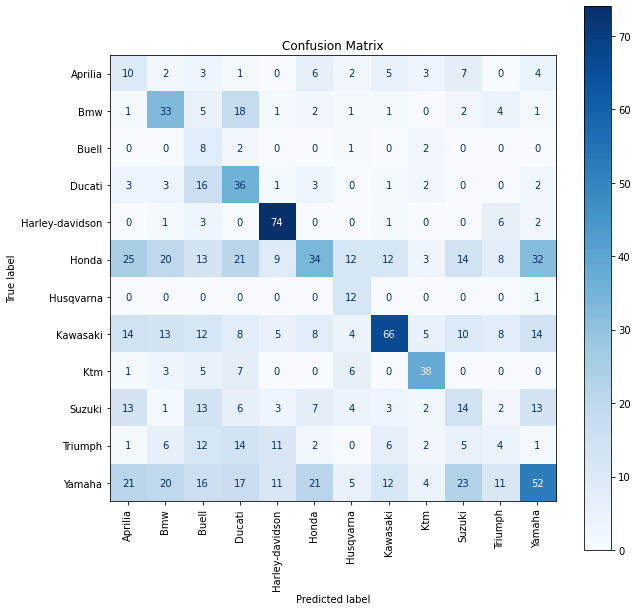

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_modell1, X_test_scaled, y_test, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [50]:
print('Testdaten Scores')
acc_log_model, prec_log_model, recall_log_model, F1_log_modell= calc_class_scores(y_test, y_test_pred)

Testdaten Scores
Accuracy: 0.353
Precision: 0.337
Recall: 0.443
F1: 0.340 



Berechnung des **F1-Score** 

$F1-Score = \frac{2 \cdot (precision \cdot recall)}{(precision + recall)}$


In [51]:
# Berechnung mit precision recal
f1_log_model = (2 * prec_log_model * recall_log_model) / (prec_log_model + recall_log_model)
print(f'F1-Score: {f1_log_model:0.3f}')

F1-Score: 0.383


**Diskusion** einfaches Logistisches Model:   
Der F1-Score von 0.34 ist nicht sehr gut. Dies wird auch in der Confusion Matrix festgestellt. Einige Marken wie Honda, Kawasaki, Yamaha werden sehr oft falsch klassifiziert. Diese Marken sind sich wohl sehr ähnlich und die korrekte Unterscheidung scheint komplexer. Das logistisch Modell hat Mühe dies abzubilden.

**Testen von sklearn class_weight**  
Das logistische Regressionsmodell von sklearn hat einen Parameter `class_weight`. Dieser soll einem unbalanced Datenset den Klassen Gewichte zuordnen. Im eda Teil wurde das unbalancierte Datenset bereits angesprochen und entsprechend behandelt. Dennoch wäre es intressant zu sehen wie sich ein Modell mit `class_weight='balanced'` und dem orginalen Datenset df_moto_clean_mlp schlägt:

In [52]:
def create_log_modell_weight(balanced_dataset:bool):
    global X_train_weight_scaled
    global X_test_weight_scaled
    global y_train_weight
    global y_test_weight
    
    # datenset mit ausgewählten Attributen für Modell
    mlp_attr = ['body_shape', 'colour2', 'displacement', 'performance', 'price', 'curb_weight', 'mileage', 'brand']
    df_moto_mlp_weight = df_moto_clean_mlp[mlp_attr].copy()

    # Train- Testsplit
    X_weight = df_moto_mlp_weight.drop('brand', axis=1)
    y_weight = df_moto_mlp_weight['brand'].copy()

    X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y_weight, test_size=0.2, 
                                                                    stratify= y_weight, shuffle=True, random_state=42)
    # Standardisierung von X_train und X_test
    X_train_weight_scaled = X_train_weight.copy()
    X_test_weight_scaled = X_test_weight.copy()

    normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
    X_train_weight_scaler = preprocessing.StandardScaler().fit(X_train_weight[normalize_attr])
    X_test_weight_scaler = preprocessing.StandardScaler().fit(X_test_weight[normalize_attr])

    # Standardisierte Werte schreiben
    X_train_weight_scaled.loc[:, normalize_attr] = X_train_weight_scaler.transform(X_train_weight[normalize_attr])
    X_test_weight_scaled.loc[:, normalize_attr] = X_test_weight_scaler.transform(X_test_weight[normalize_attr])

    # Dummie Variablen von den Kategorischen Attributen erzeugen
    X_train_weight_scaled = pd.get_dummies(X_train_weight_scaled)
    X_test_weight_scaled = pd.get_dummies(X_test_weight_scaled)

    if balanced_dataset: 
        # erstelle logistische Modell mit Gewichtung
        log_modell_weight = LogisticRegression(max_iter=500, class_weight='balanced', 
                                    random_state=42).fit(X_train_weight_scaled, y_train_weight)
    else:
        # erstelle logistische Modell ohne Gewichtung
        log_modell_weight = LogisticRegression(max_iter=500, class_weight=None, 
                                    random_state=42).fit(X_train_weight_scaled, y_train_weight)

    # erstelle Vorhersagen für Train und Test
    y_train_weight_pred = log_modell_weight.predict(X_train_weight_scaled)
    y_test_weight_pred = log_modell_weight.predict(X_test_weight_scaled)
    
    return log_modell_weight, y_train_weight_pred, y_test_weight_pred

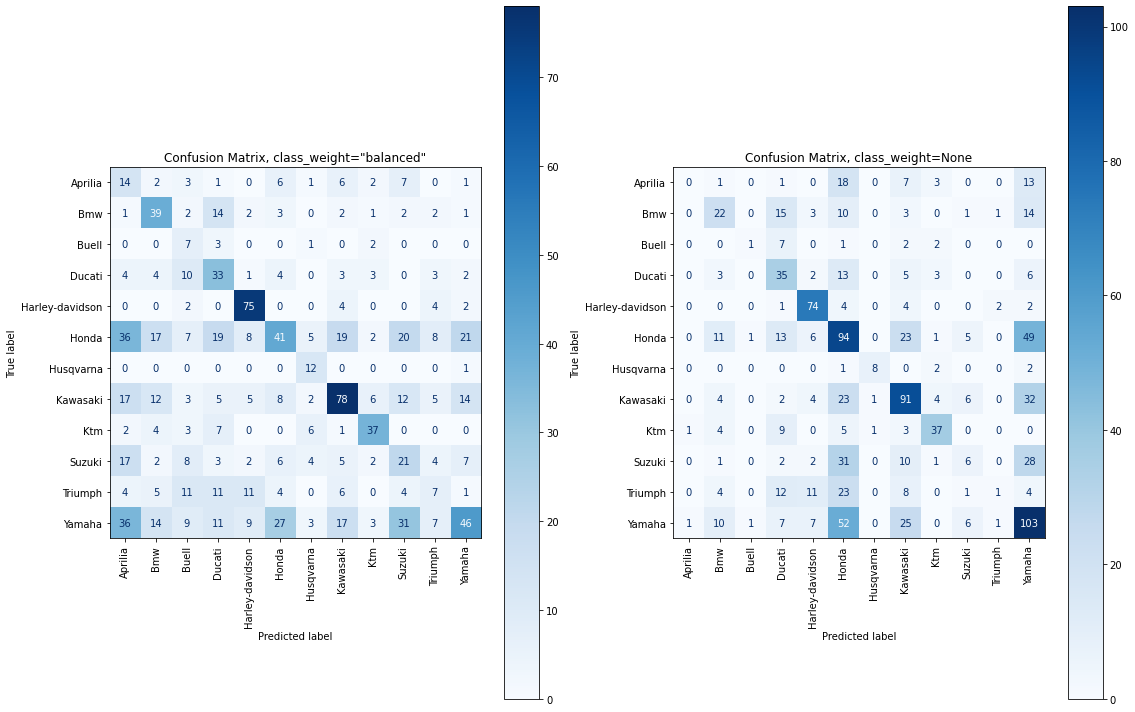

In [53]:
fig, ax = plt.subplots(1,2, figsize=(16, 10))
ax = ax.flatten()

# Modelle erstellen für class_weight='balanced' und class_weight=None.
log_modell_weight_true, y_train_weight_true_pred, y_test_weight_true_pred = create_log_modell_weight(balanced_dataset=True)
log_modell_weight_false, y_train_weight_false_pred, y_test_weight_false_pred = create_log_modell_weight(balanced_dataset=False)

# Confusion Plot zeichnen
plot_confusion_matrix(log_modell_weight_true, X_test_weight_scaled, y_test_weight, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix, class_weight="balanced"')

plot_confusion_matrix(log_modell_weight_false, X_test_weight_scaled, y_test_weight, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title('Confusion Matrix, class_weight=None')

fig.tight_layout()
plt.show()

In [54]:
# berechnen der optionalen Metriken
print('Logistisches Modell mit class_weight=balanced')
acc_log_model2, prec_log_model2, recall_log_model2, F1_log_modell2 = calc_class_scores(y_test_weight, y_test_weight_true_pred)
print('Logistisches Modell mit class_weight=None')
acc_log_model3, prec_log_model3, recall_log_model3, F1_log_modell3 = calc_class_scores(y_test_weight, y_test_weight_false_pred)

Logistisches Modell mit class_weight=balanced
Accuracy: 0.380
Precision: 0.367
Recall: 0.465
F1: 0.377 

Logistisches Modell mit class_weight=None
Accuracy: 0.437
Precision: 0.409
Recall: 0.382
F1: 0.373 



Die zwei erstellten Modelle (mit und ohhe balanciertem Datenset) führen zu unterschiedlichen Confusion Matrizen. Der Accuracy Score mit paramater `class_weight='balanced'` von sklearn ist tiefer als mit `class_weight=None`. Dies zeigt gut die Problematik bei Daten mit unterschiedlich grossen Klassen. Der Score ist zwar höher aber die kleineren Klassen wurden sehr oft Falsch Klassifiziert (Buell hat eine korrekte Klassifzierung und 11 falsche).  

Das eigen balancierte Datenset hat einen höheren Score auf den Train-Testdaten erziehlt. Hier soll getestet werden wie sich das Modell1, welches auf dem eigenen balancierten Datenset trainiert wurde auf den originalem kompletten unbalanced Datenset schlägt. Der Test soll zeigen ob die angewendeten Resampling Methoden (Up-Downsampling) zu einem besseren Modell  führt.

Logistisches Modell1 auf dem komplettem unbalanced Datenset
Accuracy: 0.384
Precision: 0.367
Recall: 0.498
F1: 0.371 



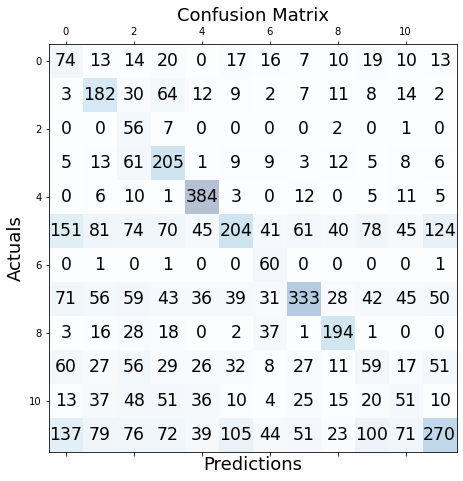

In [55]:
mlp_attr = ['body_shape', 'colour2', 'displacement', 'performance', 'price', 'curb_weight', 'mileage', 'brand']
log_model1_all_data = df_moto_clean_mlp[mlp_attr].copy()
X_all = log_model1_all_data.drop('brand', axis=1).copy()
y_all =log_model1_all_data['brand'].copy()

# Standardisierung von X_train und X_test
X_all_scaled = X_all.copy()

normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
X_all_scaler = preprocessing.StandardScaler().fit(X_all_scaled[normalize_attr])

# Standardisierte Werte schreiben
X_all_scaled.loc[:, normalize_attr] = X_all_scaler.transform(X_all_scaled[normalize_attr])
# Dummie Variablen von den Kategorischen Attributen erzeugen
X_all_scaled = pd.get_dummies(X_all_scaled)

# Vorhersage durch Modell 1
y_all_pred = log_modell1.predict(X_all_scaled)
print('Logistisches Modell1 auf dem komplettem unbalanced Datenset')
acc_log_model2, prec_log_model2, recall_log_model2, F1_log_modell2 = calc_class_scores(y_all, y_all_pred)

# zeichne Confusion Matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
conf_matrix = confusion_matrix(y_true=y_all, y_pred=y_all_pred)
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Auch dieser F1 Score ist sehr tief, somit könnte die Wahl des logistisch Model einfach gundsätzliche schlecht sein oder die ausgeführten Resampling Operation im eda-teil sind etwas zu stark. Bevor diesbezüglich Anpassungen vorgenommen werden soll die restlichen Modellen ausprobiert werden.

### Aufgabe 4 - Multi-Layer Perceptron (15 Punkte)

Implementiere ein Multi-Layer Perceptron mit sigmoider Aktivierungsfunktion und $l_2$-Regularisierung durch Ergänzen der folgenden Klasse.  

Zeige mit Hilfe des kleinen Entwicklungsdatensatzes `dev_data.csv`, dass die Umsetzung des Gradienten korrekt ist unter Verwendung der Methode `grad_check()`. 
Erkläre, was `grad_check` macht.

Zeige weiter, dass

- Gradient Descent konvergiert.
- eine Accuracy > 0.8 erzielt werden kann.
- die Regularisierung den gewünschten Effekt hat.

Verwende aus der Library `mlxtend.plotting` die Funktion `plot_decision_regions` zum Zeichnen der Decision Regions und der Decision Boundary.  
Bechreibe den Plot.  

Ermögliche weiter die Verwendung der Bibliotheksfunktion `scipy.optimize.minimize` zur Optimierung der Modell-Koeffizenten $\theta$.  
Zeige, dass auch das funktioniert. Zeichne insbesondere den Verlauf der Kostenfunktion über das Iterationsverfahren hinweg, wenn du den Solver `L-BFGS-B` verwendest.

In [56]:
import numpy as np
import sys
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import OneHotEncoder
from scipy.optimize import minimize as scipy_minimize

class MLP(object):
    ''' A Multi-Layer Perceptron.
    '''

    def __init__(self, layers, weight_init_int=(-.7, .7), method='fullbatch',
            max_iter=1000, learning_rate=0.3, dlr=0.1, alpha=0., epsilon=0.01,
            minimethod='CG', batchsize=30, binary_y_data=False):
        '''
        layers: tuple
            The elements of the tuple define the number of units in all hidden
            layers (bias units not included), i.e. a tuple (20, 30, 40) defines
            a MLP with three hidden layers of 20, 30 and 40 hidden units plus
            bias units.

        weight_init_int: tuple =(-.7, .7)
            The interval on which the weights/thetas will be randomly initialized.

        alpha: float
            The l2 regularization strength.

        method: string
            'fullbatch', 'minibatch', 'sgd', 'minimize'

        epsilon: float
            The threshold value for the length of the gradient for stopping gradient
            descent iterations.
            
        learning_rate: float
            The (initial) step size.
            
        max_iter: int
            The maximal number of gradient descent iterations.
            
        dlr: float
            The adaptive learning rate constant d.
            
        batchsize: int
            The number of samples in batch when using the minibatch method for optimizing.
            
        minimethod: string
            The algorithm used by the minimize library function for optimizing the
            model coefficients / thetas / weights. (use 'CG' or 'L-BFGS-B')
        '''
        # the model
        self.layers = layers
        self.weight_init_int = weight_init_int
        self.alpha = alpha
        # basic gradient decscent params
        self.method = method
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        # batched gradient descent
        self.dlr = dlr
        self.batchsize = batchsize
        # when using scipy.optimize.minimize
        self.minimethod = minimethod
        # more
        self.input_layer = 0
        self.output_layer = 0
        self.theta_ = []
        self.theta_shapes_ = []  # dim
        self.Zn_ = []
        self.An_ = []
        self.y_colnames = []
        self.X_norm_mean = 0
        self.X_norm_std = 0.001
        self.costs_ = []
        self.grad_norms_ = []
        self.X = np.array([])
        self.y_ = np.array([])
        

        print('MLP(layers={}, weight_init={}, method="{}", alpha={}, learning_rate={}, dlr={})'.format(
            self.layers, self.weight_init_int, self.method, self.alpha, self.learning_rate, self.dlr))
    
    def fit(self, X, y):
        '''
        Configures input and output layer, initializes weights and fits the
        model coefficients.
        '''
        # Standardisierung der Daten
        X = np.array(X)
        
        # initialize the entire network, including input and ouput layer
        y_ = self._init_network(X, y)
        
        # Anzahl Batches
        n_batches = 0
        
        if self.method == 'fullbatch':            
            n_batches = 1          
            
        elif self.method == 'sgd':
            # YOUR CODE HERE
            n_batches = X.shape[0]           
            
        elif self.method == 'minibatch':
            # batchsize beschreibt die Grösse der einzelnen Batches
            n_batches = round(X.shape[0] / self.batchsize)          

        elif self.method == 'minimize':
            # unroll thetas
            min_theta_unr = MLP.unroll(self.theta_)
            self.X = X
            self.y_ = y_            
            
            # scipy minimize Funktion
            minimize_res = scipy_minimize(MLP.cost_function, min_theta_unr, 
                                         args=(self.alpha, self.X, self.y_, self.theta_shapes_),
                                         method=self.minimethod,
                                         jac=MLP.gradient_cost_function,
                                         options={'maxiter':self.max_iter},
                                         tol=self.epsilon,
                                         callback=self.save_minimize_calculations)
            if minimize_res.success:
                print('minimize success')
                self.theta_ = MLP.rollup(minimize_res.x, self.theta_shapes_)
            else:
                print('scipy-minimize: Sorry, kein Minimum gefunden')
                
            return self
               
        ####################    
        # Hier Gradient Descent der Theta values für 'fullbatch', 'sgd', 'minibatch'    
        batchsize = round(X.shape[0] / n_batches)
        n_data_obs = 0
        i = 0
        mean_gradient_norm = 1
        grad_norm = 1
        # Abrechen wenn max Iteration oder min epsilon erreicht sind
        while (i <= self.max_iter) and (mean_gradient_norm >= self.epsilon):
            mixed_index = np.random.permutation(X.shape[0])
            X = X[mixed_index, :]
            y_ = y_[mixed_index, :]
            
            adapt_learning_rate = self.learning_rate / (1 + i * self.dlr)
            steps_norm = []
            steps_cost = []
            
            # Anzahl batches festgelegt in self.method (Epoche)
            for nbatch in range(n_batches):
                # Berechne Gadienten für die Anzahl batches
                n_start_batch = nbatch * batchsize
                n_end_batch = (nbatch+1) * batchsize
                X_iter = X[n_start_batch:n_end_batch, :]
                y_iter = y_[n_start_batch:n_end_batch, :]
                
                # Berechnen des Durchscnitts Gradienten alles Messpunkte
                mean_gradients = MLP.gradient_cost_function(self.theta_, self.alpha, X_iter, y_iter)
                
                mean_gradient_norm = np.linalg.norm(mean_gradients)
                steps_norm.append(mean_gradient_norm)
                
                # Berechne Kostenfunktion
                cost_n_batch = self.cost_function(self.theta_, self.alpha, X_iter, y_iter)
                steps_cost.append(cost_n_batch)
                
                theta_unrolled = self.unroll(self.theta_)
                # Verbessern der thetas mit Gradient und Learningrate, unroll um zwei Vektoren zu verrechnen
                # Gradient Descent
                for g, gradient in enumerate(mean_gradients):
                    theta_unrolled[g] = theta_unrolled[g] - (adapt_learning_rate * gradient)
                    
                # Optimierte Thetas speichern für nächste Optimierung    
                theta_uprolled = self.rollup(theta_unrolled, self.theta_shapes_)
                self.theta_ = theta_uprolled
                 
            # Kosten und norm des Gradienten speichern                                           
            self.costs_.append(np.mean(steps_cost))
            self.grad_norms_.append(np.mean(steps_norm))
                
            # Infos
            if i >= self.max_iter: print(f'Max Iteration erreicht, max:{i}')
            if mean_gradient_norm <= self.epsilon: print(f'MLP gradient konvergiert < epsilon, Gratulation!!')
            i += 1            
          
        return self

    @staticmethod
    def cost_function(theta_, alpha, X, y, theta_shapes=None):
        '''Computes the cross-entropy cost function.

        Uses MLP.forward_propagation

        Arguments
        ---------
        theta_ : the weights of the neural network
        alpha : the regularization strength
        X, y : the data -> y should be OneHotEncoded
        theta_shapes : a list of tuples defining the shapes of theta

        Returns
        -------
        J : cost function value given thetas
        '''
        # Implementation Hint:
        # Use np.nan_to_num to ensure numpy handles values very close to zero
        # correctly in the log function
        
        # Anzahl Observationen
        n_obs = X.shape[0]
        J_sum_costs = 0
        X = np.array(X)
        y = np.array(y)
        
        # unroll Thetas if theta_shapes != None
        # == None -> theta als Liste mit Matrizen -> führe unroll aus
        if theta_shapes == None:
            theta_unrolled = MLP.unroll(theta_) 
        # == -> theta als 1d-array -> führe rollup aus
        else:
            theta_unrolled = theta_
            theta_ = MLP.rollup(theta_, theta_shapes)

        for one_observation in range(X.shape[0]):     
                
            # Forward Propagation verabeitet nur eine Observation
            a = MLP.forward_propagation(theta_, X[one_observation, :]) 
            a_last = a[-1]
            
            yi = y[one_observation,:]

            # Cross-entropy mit L2 Regularisierung 
            # Regularisierungs term Reg (L2)
            Reg = (alpha/(2*n_obs)) * np.sum(theta_unrolled**2)
            
            # Cross-entropy Formel
            J_sum_costs += - (yi.T @ np.nan_to_num(np.log(a_last)) + (1-yi).T @ np.log(1-np.nan_to_num(a_last)) + Reg)
            
        J_sum_costs = J_sum_costs * (1/n_obs) 

        ######################################## Dimensions Tests
        #b = y.T @ np.log(A_last) # skalar
        #c = (1-y).T @ np.log(1-A_last) # skalar
        #d = (y.T @ np.log(A_last) + (1-y).T @ np.log(1-A_last)) + Reg  #skalar
        #return b, c, d, J
        ########################################

        return J_sum_costs

    @staticmethod
    def gradient_cost_function(theta_, alpha, X, y, theta_shapes=None, binary_y_data = False):
        '''Computes the gradient of the cost function.

        Arguments
        ---------
        theta_ : the weights of the neural network
        theta_shapes : a list of tuples defining the shapes of theta
        alpha : the regularization strength
        X, y : the data -> y should be onehotencoded y_

        If theta_shapes is provided (i.e. not None) the thetas are received as
        a 1-d array and rolled-up first. The gradient is then computed. After
        that, if rolled-up initially, the gradient is unrolled again, e.g. for
        further use in an optimizer.

        Returns
        -------
        grad : the gradient of the cost function
        '''
        # 
        theta_ = MLP.rollup_if(theta_, theta_shapes)
        gradient = [0 for the in range(len(theta_))]
        n_obs = X.shape[0]
        
        # Je Observation / Datenpunkt Aktivierung und Delta berechnen
        for one_observation in range(X.shape[0]):
            
            a = MLP.forward_propagation(theta_, X[one_observation, :])            
            d = MLP.back_propagation(theta_, a, y[one_observation, :])
            
            #print('len(a)', len(a), 'len(d)', len(d))
            
            for i in range(len(d)):
                # berechnen des Gradienten, fehler * aktivierungslayer
                #print(f'len d[{i}]: {len(d[i])}, len a[{i}]: {len(a[i][1:])}')
                # Gradienten der Thetas berechnen -> Matrix -> mit np.outer sicherstellen das matrix
                # a0 @ d[0] ,a1 @ d[1]
                #print('a', len(a[i]), 'd', len(d[i]))
                new_gradient = np.outer(d[i], a[i])
                # aufsummieren aller Gradienten vektoren je layer
                gradient[i] += new_gradient
                #print(f'1,grad[{i}]: {gradient[i].shape}')
                
        for i in range(len(gradient)):
            # Gradienten je Layer durch anzahl Observationen teilen. Durchschnitts gradient je Layer
            gradient[i] = gradient[i] / n_obs
            
            # Regularisierung der Gewichte als Addition beifügen, vorher Bias 0 setzen. dieser wird nicht Reg.
            theta_bias_zero = theta_[i].copy()
            theta_bias_zero[:, 0] = 0  
            
            #print(f'shape the_del: {theta_bias_zero.shape}')
            #print(f'grad[i]: {gradient[i].shape}')
            
            gradient[i] += (theta_bias_zero * alpha)

        gradient_unrolled = MLP.unroll(gradient)

        return gradient_unrolled
        
        
    
    @staticmethod
    def forward_propagation(theta, x, print_info=False):
        '''Computes the activations for all units in an MLP given by theta for
        a single data point x.

        Returns
        -------
        a : activations of all units as a list of arrays
        '''
        # speichern von Zwischenresultaten An(zn) = aktiviereung des Layers
        Z = []
        A = []
        
        # set input data x as first layer a1 (+1 for bias)
        # +1 für Bias Term        
        a0 = np.ones(len(x)+1)
        a0[1:] = x
        A.append(a0)
        
        for i, theta_n in enumerate(theta):
            # berechne x oder a**-1 mit Weights (+Bias)
            # Wenn Zn leer dann Inputdaten verwenden
            if len(Z) == 0:
                #print('theta_n:', theta_n.shape)
                #print('a0:', len(a0))
                z = theta_n @ a0.T                
            else:
                #print('theta_n:', theta_n.shape)
                #print('a:', len(a))
                z = theta_n @ a.T
            # Berechne Aktivierungs Funktion
            
            
            # Bias in a einsetzen falls nicht letzter layer
            if i < len(theta)-1:
                a_ohne_bias = MLP.sigmoid(z)
                # Bias mit 1 init
                a = np.ones(len(a_ohne_bias)+1)
                a[1:] = a_ohne_bias
            else: 
                a = MLP.sigmoid(z)
                #print('len a:', len(a))
            
            Z.append(z)
            A.append(a)
        #print(len(A))
        return A
         

    @staticmethod
    def back_propagation(theta, a, y, return_delta=False):
        '''Computes the error d for all units.
        theta: Gewicht
        a: Aktivierung
        y: Vorhersage forward Propagation

        Returns
        -------
        d : the error (small delta) propagated back through the network as list
        of arrays.
        '''
        # YOUR CODE HERE
        # Erstelle delta array (Fehler)
        d = [np.nan for thet in range(len(theta))]
        
        # erster und letzter Layer  (Input/Output Layer) nicht berechnen -> -1
        #print('leng theta: ', len(theta))
        H = len(theta) - 1
        
        for L in range(H, -1, -1):
            #print('index L :', L)
            
            # Berechnung des letzten Layers (L) oder des ersten layers von Backpropagation
            if L == H:
                #print(f'a{L}: {a[L]}')
                #print(f'y{L}: {y}')
                delta = (a[L+1] - y)
                d[L] = delta
                #print('delta0:', len(delta))
                
            # Berechnungen der weiteren layer
            else:
                #print(f'len delta{len(delta)}')
                #print(f'theta[{L+1}]: {theta[L+1].shape}')
                delta = theta[L+1].T @ d[L+1] * MLP.anti_sigmoid(a[L+1])
              
                # Bias verschwindet bei der Ableitung, somit disen hier entfernen
                delta = np.delete(delta, 0, 0)
                #print('delta0:', len(delta))
                d[L] = delta
                             
        return d

        

    def grad_check(self, X, y, epsilon=0.0001, decimal=3, verbose=False):
        '''Compare the gradient with finite differences around current point
        in parameter space.
        '''
        if not 'theta_' in dir(self):
            print('grad_check init network')
            y = self._init_network(X, y)
            
        # erstelle y_ mit dummie y
        y_ = np.array(pd.get_dummies(y))
        # ersetze y durch dummie y -> Kostenfunktion erwartet slicing für 2D-Array
        y = np.array(pd.get_dummies(y))
        
        X = np.array(X)
        

        theta_ur = MLP.unroll(self.theta_)
        #print('grad_check, len theta:', len(theta_ur))

        # approximate the gradient with finite differences
        approxgrad = []
        for idx in range(len(theta_ur)):
            # modify theta[idx] +/- epsilon
            tplus = theta_ur.copy()
            tplus[idx] = tplus[idx]+epsilon
            tminus = theta_ur.copy()
            tminus[idx] = tminus[idx]-epsilon
            # calculate the costfunctions
            minuseps = MLP.cost_function(tminus, self.alpha, X, y, self.theta_shapes_)
            pluseps = MLP.cost_function(tplus, self.alpha, X, y, self.theta_shapes_)
            # finite diffs
            approxgrad.append((pluseps - minuseps)/(2*epsilon))

        approxgrad = np.array(approxgrad)

        # compare normalized gradients
        approxgrad /= np.linalg.norm(approxgrad)
        calcgrad = MLP.gradient_cost_function(theta_ur, self.alpha, X, y_, self.theta_shapes_)
        # compare normalized gradients
        calcgrad /= np.linalg.norm(calcgrad)

        if verbose:
            print('approx : ', approxgrad)
            print('backprop : ', calcgrad)

        np.testing.assert_array_almost_equal(approxgrad, calcgrad, decimal=decimal)

    def predict(self, X, print_info=False):
        '''Predicts the output for all data points in X.

        Makes use of MLP.forward_propagation

        Returns
        -------
        prediction of output
        '''
        X = np.array(X)
        
        # berechne Vorhersage für jedes x
        y_prediction = np.array([])
        
        for x_obs in range(X.shape[0]):
            # Forward Popagation
            y_pred_prob = MLP.forward_propagation(self.theta_, X[x_obs, :])[-1]  # a_last = h(x) = y_pred_prob
            # Vorhersage mit der höchsten Wahrscheinlichkeit
            y_pred = self.y_colnames[np.argmax(y_pred_prob)]  
            
            y_prediction = np.append(y_prediction, y_pred)  
            
            if print_info:
                print('y_prob:', y_pred_prob)
                print('y_pred:', y_pred)
        
        return y_prediction

    def score(self, X, y, average='macro', print_info=True):
        '''Computes the accuracy metric for the predictions on X, given the
        true output y.

        Returns
        -------
        accuracy : metric computed for X and y, invoking a prediction on X,
        given the current model
        '''
        # YOUR CODE HERE
        y_pred = self.predict(X)
        
        # berechnen aller Metriken
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred, average=average)
        recall = recall_score(y, y_pred, average=average)
        f1 = f1_score(y, y_pred, average=average)

        if print_info:
            print(f'F1: {f1:0.3f} \n')
            print(f'Accuracy: {acc:0.3f}')
            print(f'Precision: {prec:0.3f}')
            print(f'Recall: {recall:0.3f}')            
        
        return  f1, acc, prec, recall

    @staticmethod
    def rollup_if(x_, shapes):
        '''Conditional uprolling if shapes is not None.

        Returns
        -------
        x : list of arrays, if shapes provided, input x_ otherwise
        True/False : True if input has been rolled up.
        '''
        # YOUR CODE HERE
        if(shapes != None):
            return MLP.rollup(x_, shapes)
        
        return x_

    @staticmethod
    def unroll(xlist):
        '''Unrolling theta in a 1d array (that can be passed into minimize).

        Returns
        -------
        x : unrolled 1-d array
        '''
        # x als 1d array festlegen
        thetas_flattend = np.array([])
        # jedes element in theta flachklopfen
        for theta in xlist:
            #thetas_flattend.extend(theta[:, 1:].flatten())
            thetas_flattend = np.append(thetas_flattend, theta.flatten())
         
        return thetas_flattend

    @staticmethod
    def rollup(xur, shapes):
        '''Rolling up theta into a list of 2d matrices.

        Returns
        -------
        xlist : list of 2-d arrays extracted from xur, reshaped into shapes.
        '''
        # Aufrollen zur Ursprünglichen theta liste anhand der Dimensionen in den layers
        xlist = []
        pos = 0
        for shape_layer in shapes:
            # Anzahl elemente nach dimension layers
            n_elem = shape_layer[0] * shape_layer[1]
            # alle Werte des xten Layers aus dem flachen Array ziehen
            val_layer_x = xur[pos:pos + n_elem]
            # Werte als Vektoren (array+reshape) in der Liste speichern
            xlist.append(np.array(val_layer_x).reshape(shape_layer))
            # Position des nächsten Layers
            pos += n_elem
            #print('pos:', pos)
            
        return xlist

    @staticmethod
    def phi(t):
        '''Logistic / sigmoid function.'''
        return 1. / (1 + np.exp(-t))

    def _init_network(self, X, y):
        '''Initializes all that's necessary to start training.

        - transforms y as required to one-hot-encoding and returns encoded y_
        - completes self.layers
        - initializes thetas, using MLP.theta_init, as list of 2-d matrices
        - sets self._theta_shapes (needed for unrolling and uprolling)

        (uses init_theta())

        Returns
        -------
        y_ : one-hot encoded categories contained in y.
        '''
        # dummie variable y
        
        #self.encoder = OneHotEncoder()
        #y_ = self.encoder.fit_transform(np.array(y.reshape(-1,1))).toarray()
        #y_ = self.encoder.fit_transform(y.reshape(-1, 1)).toarray()
        
        y_ = np.array(pd.get_dummies(y))
        self.y_colnames = pd.get_dummies(y).columns.to_list()
        #print('y colnames: ', self.y_colnames)
        
        # get Input/Outpur data shape for input/output layer
        self.input_layer = X.shape[1]
        self.output_layer = y_.shape[1]
        
        # init thetas list 2d-matrix. Das +1 für den bias term
        #all_layers = [self.input_layer+1, self.layers[0]+1,self.layers[1]+1, self.layers[2]+1, self.output_layer]
        
        all_layers = []
        # Input Layer beifügen
        all_layers.append(X.shape[1])
        # Hidden Layer beifügen
        for hiden_layer in self.layers:
            all_layers.append(hiden_layer)
        # Outpurlayer beifügen
        all_layers.append(y_.shape[1])
        
        
        self.theta_ = MLP.init_theta(all_layers, self.weight_init_int, print_info=False)
        
        # get theta shape
        for theta in self.theta_:
            self.theta_shapes_.append(theta.shape)
            
        return y_

    @staticmethod
    def init_theta(layers, weight_init_int, print_info=False):
        '''Initializes the thetas and returns them as a list of 2-d matrices.

        Returns
        -------
        theta : list of model coefficients 2-arrays according to the layer
        specification.
        '''
        # YOUR CODE HERE
        np.random.seed(42)
        thetas = []
        for n_layer in range(len(layers)-1):
            theta = np.random.uniform(low=weight_init_int[0], high=weight_init_int[1], 
                                      size=(layers[n_layer+1],layers[n_layer]+1))
            # set bias gewicht = 1 auf dem ersten theta element -> Bias im a beifügen!
            #for n_col in range(theta.shape[1]):
            #    theta[0][n_col] = 1
                
            # append thetas
            thetas.append(theta)
            if print_info:    
                print(f'theta{n_dim}:', theta.shape)
                
        return thetas
    
    @staticmethod
    def sigmoid(z):
        '''
        Berechnung der Sigmoid Aktivierungs Funktion sigmoid(z) -> a
        '''
        a = (1.0 / (1.0 + np.exp(-z)))
        return a
    
    @staticmethod
    def anti_sigmoid(a):
        '''
        Berechnung von z mit der Umkehrfunktion von Sigmoid anti_sigmoid(a) -> z
        '''
        z = a * (1-a)
        return z
    
    @staticmethod
    def sigmoid_derivative(a):
        '''
        Berechnung der Ableitung der Sigmoid Aktivierungs Funktion
        '''
        z = MLP.sigmoid(a) @ (1 - MLP.sigmoid(a))
        return z
    
    @staticmethod
    def cross_entropy(y, y_pred, alpha):
        if y == 1:
            return -np.log(y_pred)
        else:
            return -np.log(1 - y_pred)
    @staticmethod    
    def normalize_data(X):
        X_norm_mean = X.mean(axis=0)
        X_norm_std = X.std(axis=0)
        
        # Standardisieren
        X_norm = (X - X_norm_mean) / X_norm_std
        return X_norm, X_norm_mean, X_norm_std
    
    def plot_gradient_norm_and_costs(self):
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        ax[0].plot(self.costs_)
        ax[0].set_xlabel(f'Anzahl Durchläufe')
        ax[0].set_ylabel('Kosten')
        ax[0].set_title(f'Kostenfunktion, max_iter: {self.max_iter}')
        
        ax[1].plot(self.grad_norms_)
        ax[1].set_xlabel(f'Anzahl Durchläufe')
        ax[1].set_ylabel('np.linalg.nomr(Gradient)')
        ax[1].set_title(f'Länge des Gradienten, epsilon: {self.epsilon}')
        plt.tight_layout()
        plt.show()
      
    #@staticmethod
    def save_minimize_calculations(self,thetas):
        '''
        Wird verwendet um die Kosten und die Länge Gradienten zu den 
        einzelnen Schritten in der scipy minimize Optimierungsfunktion zu speichern.
        'Callback'-Funktion
        '''
        # Kosten / Gradient berechnen
        cost = MLP.cost_function(thetas, self.alpha, self.X, self.y_, self.theta_shapes_)
        mean_gradient = MLP.gradient_cost_function(thetas, self.alpha, self.X, self.y_, self.theta_shapes_)
        mean_gradient_norm = np.linalg.norm(mean_gradient)
                
        # Werte speichern
        self.costs_.append(cost)
        self.grad_norms_.append(mean_gradient_norm)
            
    
    # ADD ADDITIONAL UTILITY METHODS HERE
    # YOU CAN REMOVE THE NotImplementedError right
    # YOUR CODE HERE

**Erklärung der Funktion grad_check()**  
Die Elemente des Gradient bildet sich aus den einzelnen Ableitungen der Funktionsparameter. Diese einzelnen Ableitungen werden mit den bekannten Ableitungsregeln berechnet und beschreiben die Steigung der Tangente am Punkt $x_0$. Diese Steigung kann auch mit dem Differenzquotienten approximiert werden (Aus der die Ableitungsregeln entstanden sind).  
Bei der Approxiation der Tangente wird auf der Funktion ein Punkt ganz wenig unterhalb und oberhalb von Punkt $x_0$ gewählt. Werden diese zwei Punkte verbunden, erhält man eine Gerade und kann deren Steigung bestimmen (Tangentensteigung) die der Steigung im Punkt $x_0$ ähnlich ist. Lässt man diese $\Delta x$ immer weiter gegen 0 laufen kommt die Approximation der Steigung der Ableitung immer näher.  

Differenzquotienten Formel:   
$ m_t = lim_{\Delta x \to 0} ( \frac{\Delta f}{\Delta x}) = lim_{\Delta x \to 0} (\frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x})$

In der `grad_check()` Funktion bezeichnet epsilon das delta x welches von den Thetas einmal minus und einmal plus gerechnet wird. Die Berechnung der Kostenfunktion entspricht unserem $f(x_0)$. Somit entspricht die Zeile `approxgrad.append((pluseps - minuseps)/(2*epsilon))` $= m_t$, der Steigung der aproximierten  Tangente die ungefähr der Ableitungen der Elemente des Gradienten entspricht. Je kleiner epsilon gewählt wird umso besser die Annäherung.

**Unittests**

In [57]:
def test_set_theta_first_element_one():
    # arrange    
    weight_init_int = [-0.7, 0.7]
    layers = [21, 11, 31, 41, 6]
    theta_soll = []
    theta_ist = []
    
    for n_layer in range(len(layers)-1):
        np.random.seed(42)
        theta = np.random.uniform(low=weight_init_int[0], high=weight_init_int[1], 
                                      size=(layers[n_layer+1],layers[n_layer]))
        # set bias gewicht = 1 auf dem ersten theta element
        for n_dim in range(len(theta)):
            theta[n_dim][0] = 1
                
        # append thetas
        theta_soll.append(theta)
    
    # act
    theta_ist = MLP.init_theta(layers, weight_init_int, print_info=False)
    
    # assert
    assert len(theta_soll) == len(theta_ist), 'theta length no equal'
    #assert np.array_equal(theta_soll, theta_ist), 'theta_soll not equal theta_ist'
    #return theta_soll, theta_ist
    
test_set_theta_first_element_one()

**Dev_data.csv** einlesen und Train- / Testsplit Aufteilung

In [58]:
# Einlesen der Daten 
df_dev_data = pd.read_csv('../data/dev_data.csv')
X_dev = df_dev_data[['X1', 'X2']]
y_dev = df_dev_data['y']

X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_dev, y_dev, test_size=0.2, 
                                                        stratify= y_dev, shuffle=True, 
                                                        random_state=42)

**MLP Test Fullbatch**  
Bei der Fullbatch Option werden alle Gradienten der einzelnen Datenpunkte berechnet und aufsummiert, danach durch die Anzahl Datenpunkte dividiert. Das ergibt einen Durchschnitsgradienten der in die Richtung des Maximum zeigt. Gradient Descent wird ausgeführt je Iteration in max_iter um das Minimum zu suchen.

In [59]:
mlp_dev_data_fullbatch = MLP(layers=(8, 15), weight_init_int=(-.7, .7), method='fullbatch',
            max_iter=1000, learning_rate=0.6, dlr=0.01, alpha=0., epsilon=0.001)
mlp_dev_data_fullbatch.fit(X_train_dev, y_train_dev)
#y_test_pred = mlp_dev_data_fullbatch.predict(X_test, print_info=False)

MLP(layers=(8, 15), weight_init=(-0.7, 0.7), method="fullbatch", alpha=0.0, learning_rate=0.6, dlr=0.01)
Max Iteration erreicht, max:1000


**Testen grad_check() Funktion**  
Die Funktion grad_check() kann ohne Fehler ausgeführt werden (Mit verbose=True) können auch die Werte der Approximation und der Backpropagation geprüft werden.

In [60]:
mlp_dev_data_fullbatch.grad_check(X_train_dev, y_train_dev, verbose=False) 

**Kosten und Länge des Gradienten** je Iteration plotten.  
Mit Anpassung der Learningrate kann das Minimum (<epsilon) früher ereicht werden.

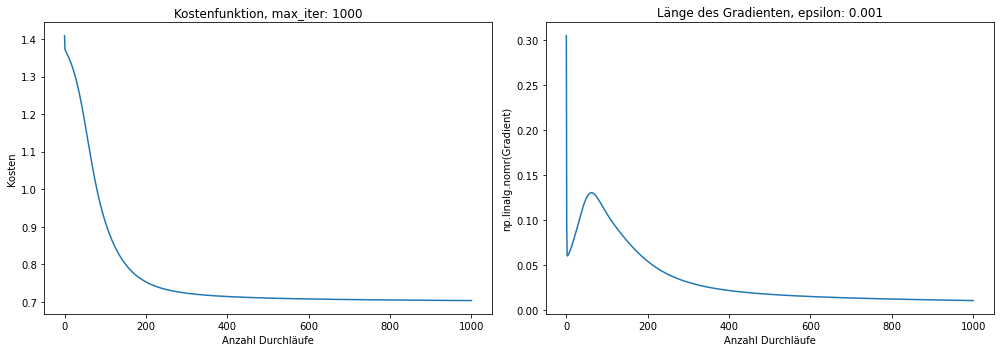

In [61]:
mlp_dev_data_fullbatch.plot_gradient_norm_and_costs()

**Model Testscore**  
Berechnen der Scores auf dem Testdatensatz. Der Score 0.8 wird mit dem MLP-Model erreicht.

In [62]:
print('Scores auf Testdaten')
mlp_dev_full_f1, _, _, _, = mlp_dev_data_fullbatch.score(X_test_dev, y_test_dev)

Scores auf Testdaten
F1: 0.800 

Accuracy: 0.800
Precision: 0.800
Recall: 0.800


**MLP Test SGD** [Stochastic Gradient Descent](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)  
Bei stochastic Gradient Descent wird der Gradient eines zufälligen Datenpunkts berechnet und direkt für Gradient Descent angewendet. Die Kurve der Kostenfunktion ist zwar nicht mehr so glatt oder genau wie Fullbatch, aber das Erreichen des Minimum dauert viel kürzer. Bei Funktionen mit mehreren lokalen Minimias kann hier Gadient Descent auch wieder 'rausspringen'.

MLP(layers=(8, 15), weight_init=(-0.7, 0.7), method="sgd", alpha=0.0, learning_rate=0.3, dlr=0.01)
MLP gradient konvergiert < epsilon, Gratulation!!
Scores auf Testdaten
F1: 0.900 

Accuracy: 0.900
Precision: 0.900
Recall: 0.900


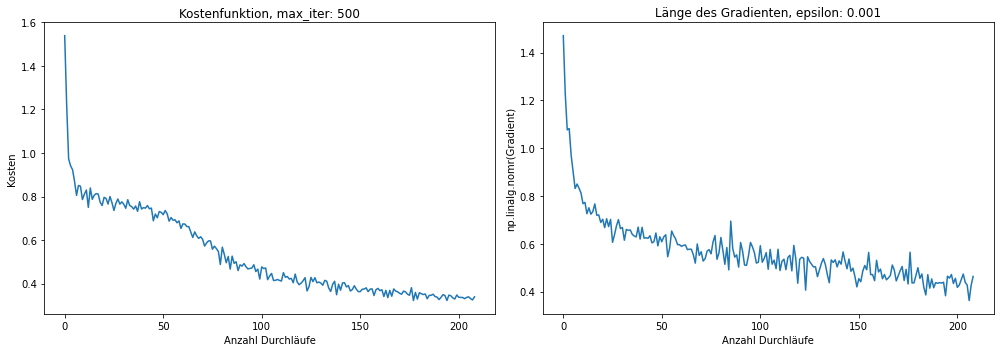

In [63]:
mlp_dev_data_sgd = MLP(layers=(8, 15), weight_init_int=(-.7, .7), method='sgd',
            max_iter=500, learning_rate=0.3, dlr=0.01, alpha=0., epsilon=0.001,
            minimethod='CG', batchsize=30)

mlp_dev_data_sgd.fit(X_train_dev, y_train_dev)
#y_test_pred = mlp_dev_data.predict(X_test, print_info=False)

print('Scores auf Testdaten')
mlp_dev_sgd_f1, mlp_dev_sgd_acc, mlp_dev_sgd_pre, mlp_dev_sgd_rec, = mlp_dev_data_sgd.score(X_test_dev, y_test_dev)

# Plotten der Kosten und Gradienten Entwicklung
mlp_dev_data_sgd.plot_gradient_norm_and_costs()

**MLP Test Minibatch**   
Ähnlich zu SGD nur werden mehrer Datenpunkte statt nur einem für Gradient Descent verwendet. Die Anzahl batches ergeben sich durch nbatches = data.shape[0] / batchsize. Hier wird das epsilon nicht erreicht und minibatch bricht nach erreichen von max_iter ab. Dennoch ist ein Score von 0.8 auf den Testdaten nicht schlecht. Anpassen der Learningrate von 0.3 auf 0.01 führte zu einem Score von 0.95 (was etwas misstrauisch macht) .

MLP(layers=(8, 15), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.0, learning_rate=0.01, dlr=0.01)
Max Iteration erreicht, max:1000
Scores auf Testdaten
F1: 0.950 

Accuracy: 0.950
Precision: 0.955
Recall: 0.950


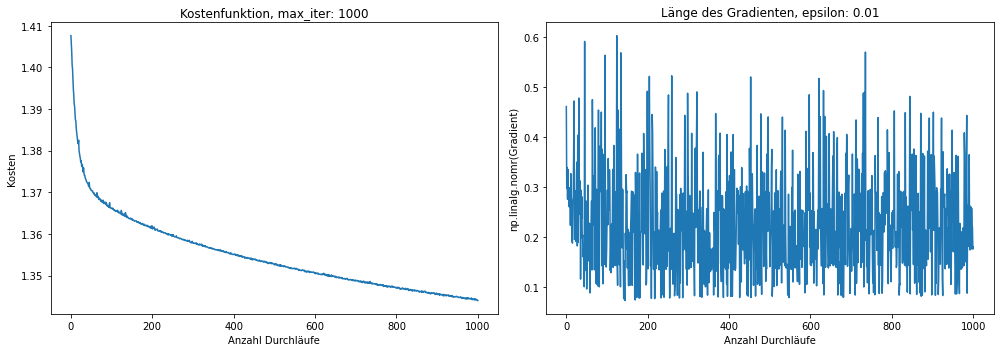

In [64]:
mlp_dev_data_minibatch = MLP(layers=(8, 15), weight_init_int=(-.7, .7), method='minibatch',
            max_iter=1000, learning_rate=0.01, dlr=0.01, alpha=0., epsilon=0.01,
            minimethod='CG', batchsize=30)
mlp_dev_data_minibatch.fit(X_train_dev, y_train_dev)
#y_test_pred = mlp_dev_data.predict(X_test, print_info=False)

print('Scores auf Testdaten')
mlp_dev_minibatch_f1, mlp_dev_minibatch_acc, mlp_dev_minibatch_pre, mlp_dev_minibatch_rec, = mlp_dev_data_minibatch.score(X_test_dev, y_test_dev)

# Plotten der Kosten und Gradienten Entwicklung
mlp_dev_data_minibatch.plot_gradient_norm_and_costs()

**MLP Test sklearn minimize** [doku](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)  
Der Score von Minimize mit dem Parameter 'CG' betrug 0.75. Mit dem Parameter [L-BFGS-B](https://machinelearningmastery.com/bfgs-optimization-in-python/) beträgt der Score 0.9. 

MLP(layers=(8, 15), weight_init=(-0.7, 0.7), method="minimize", alpha=0.0, learning_rate=0.01, dlr=0.01)
minimize success
Scores auf Testdaten
F1: 0.900 

Accuracy: 0.900
Precision: 0.900
Recall: 0.900


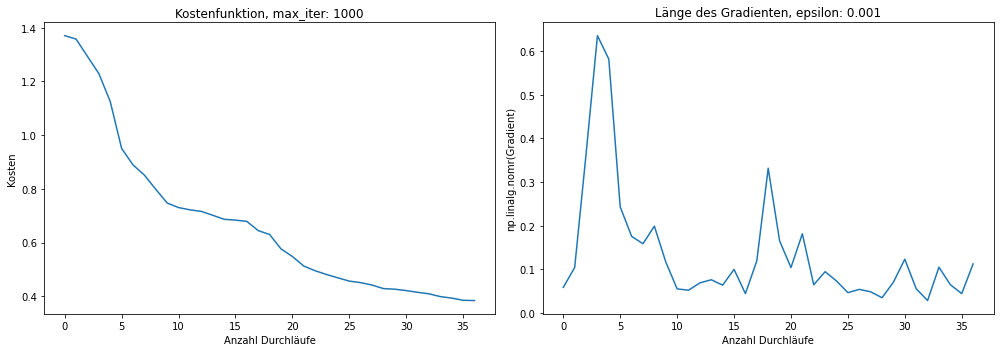

In [65]:
# Modell erstellen
mlp_dev_data_minimize = MLP(layers=(8, 15), weight_init_int=(-.7, .7), method='minimize',
            max_iter=1000, learning_rate=0.01, dlr=0.01, alpha=0., epsilon=0.001,
            minimethod='L-BFGS-B', batchsize=30)
mlp_dev_data_minimize.fit(X_train_dev, y_train_dev)

print('Scores auf Testdaten')
mlp_dev_minimize_f1, _,_,_, = mlp_dev_data_minimize.score(X_test_dev, y_test_dev)

# Plotten der Kosten und Gradienten Entwicklung
mlp_dev_data_minimize.plot_gradient_norm_and_costs()

**MLP Optionen**  
Das Anpassen der Learningrate für die Optionen SGD und Minibatch führte zu unterschiedlichen Scores. Kleinere Learnigrate führt zu besseren Resulateten. Fullbatch ist davon weniger betroffen.

**Anwendung von 'plot_decision_regions'** aus der Aufgabenstellung. [doku](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)  
Die Decision Boundry zeigt die Aufteilung der Klassen durch das MLP-Modell. Folgend mit die Grafiken für Full- und Minibatch.

**Plotten der Decision Regions**

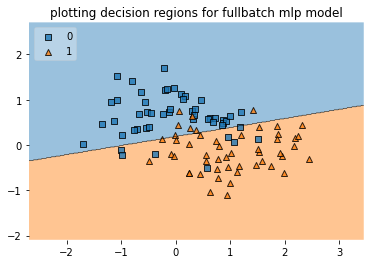

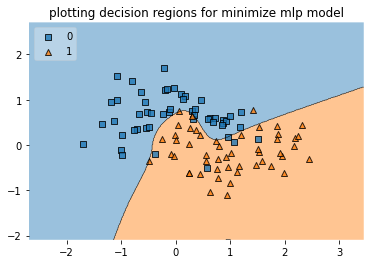

In [66]:
from mlxtend.plotting import plot_decision_regions

# Daten dev_data.csv zu arrays
X_dev = np.array(X_dev)
y_dev = np.array(y_dev.astype('int'))

# plote 'plot_decision_regions'
plot_decision_regions(X_dev, y_dev, mlp_dev_data_fullbatch, legend=2)
plt.title('plotting decision regions for fullbatch mlp model')
plt.show()

# plote 'plot_decision_regions'
plot_decision_regions(X_dev, y_dev, mlp_dev_data_minimize, legend=2)
plt.title('plotting decision regions for minimize mlp model')
plt.show()

**Regulariesierung** des MLP Models  
Wie bei der ersten Challenge bei Ridge und Lasso kann mit dem Regularisierungstermn ein Overfitten auch den Trainingsdaten unterbunden werden. Im MLP wurde die L2-Regularisierung umgesetzt. Folgend wird das Minimize Modell erneut mit $\alpha \neq 0$ verwendet und die Decisoion Boundry betrachtet.

MLP(layers=(8, 15), weight_init=(-0.7, 0.7), method="minimize", alpha=0.0008, learning_rate=0.3, dlr=0.1)
minimize success
Scores auf Testdaten
F1: 0.899 

Accuracy: 0.900
Precision: 0.917
Recall: 0.900


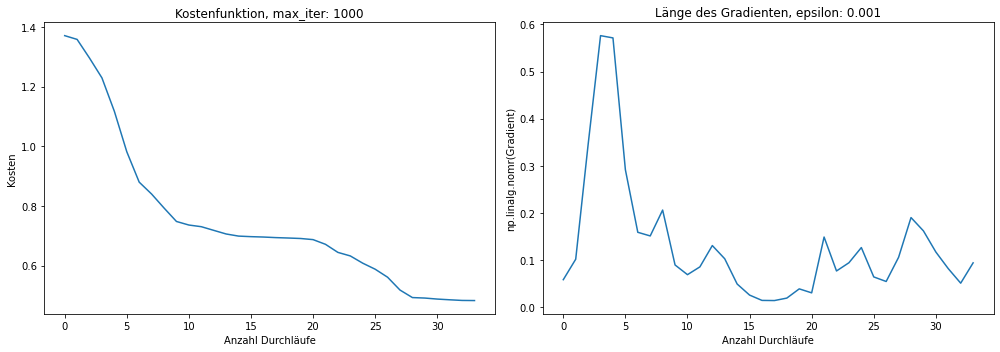

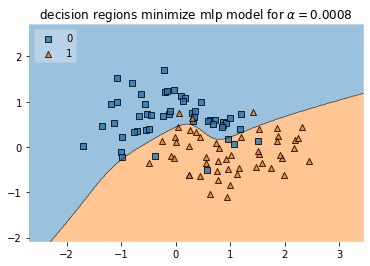

In [67]:
# Modell erstellen
mlp_dev_data_minimize_reg = MLP(layers=(8, 15), weight_init_int=(-.7, .7), method='minimize',
            max_iter=1000, alpha=0.0008, epsilon=0.001,
            minimethod='L-BFGS-B', batchsize=30)
mlp_dev_data_minimize_reg.fit(X_train_dev, y_train_dev)

print('Scores auf Testdaten')
mlp_dev_minimize_f1, _,_,_, = mlp_dev_data_minimize_reg.score(X_test_dev, y_test_dev)

# Plotten der Kosten und Gradienten Entwicklung
mlp_dev_data_minimize_reg.plot_gradient_norm_and_costs()

# plote 'plot_decision_regions'
plot_decision_regions(X_dev, y_dev, mlp_dev_data_minimize_reg, legend=2)
plt.title(r'decision regions minimize mlp model for $\alpha=0.0008$ ')
plt.show()

Bereits kleine Alpha Werte haben grossen Einfluss auf die Decision Boundry von Minimize. Die Scores können schlechter werden aber die Funktioen des Modells bietet mehr Stabilität durch den künstlichen Bias der mit der Regularisierung beigefügt wird. Hier zeigte sich ein Wert von $\alpha = 0.0008$ als gut.

**Test Forward Propagation** mit df_moto Datensatz

In [68]:
# Demo Live Daten
X = df_moto_mlp.drop('brand', axis=1).copy()
y = df_moto_mlp['brand'].copy()
y_ = pd.get_dummies(y)
y_ = np.array(y_)
y_colnames = pd.get_dummies(y).columns.to_list()
X = pd.get_dummies(X)
X = np.array(X).copy()
x = np.array(X[10,:]).copy()
y_onesample = y_[10,:].copy()

# Init MLP
weight_init_int = [-0.7, 0.7]
layers = [len(x.T)+1, 11, 31, 41, len(y_colnames)]
# theta MLP
theta_test = MLP.init_theta(layers, weight_init_int, print_info=False)
print(f'theta_0 shape: {theta_test[0].shape}, x length (+1): {x.shape}')

theta_0 shape: (11, 34), x length (+1): (32,)


In [69]:
# Prediction MLP
a = MLP.forward_propagation(theta_test, x)
print('len a:', len(a))
print('len y_:', len(y_onesample))
print('len y_pred:', len(a[-1]))
y_onesample, a[-1]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 33 is different from 34)

In [ ]:
for i, ele in enumerate(a):
    print(f'a{i}: {len(a[i])}')
a[0]

**Test Backpropagation**

In [ ]:
deltas = MLP.back_propagation(theta_test, a, y_onesample)
for i, delt in enumerate(deltas):
    print(f'len delta {i}:', len(delt))
deltas[3]

**Test Kostenfunktion**

In [ ]:
MLP.cost_function(theta_test, alpha=1, X=X, y=y_)

**Test gradient_cost_function**

In [ ]:
# get theta shape
theta_test_shape = []
for theta in theta_test:
    theta_test_shape.append(theta.shape)
#print('theta_test_shapes: ', theta_test_shape)
#y_

In [ ]:
MLP.gradient_cost_function(theta_test, 1, X, y_, theta_shapes=None)  # None == kein 1d-array

YOUR ANSWER HERE

### Aufgabe 5 - MLP Anwendung (5 Punkte)

Verwende deine Implementierung des Multi-Layer Perceptrons, um unseren Datensatz zu klassifizieren.  
(Falls deine Implementierung nicht funktionieren sollte, kann du scikit-learn verwenden. Damit kannst du noch 3 Punkte erreichen.)

Finde ein möglichst gutes Modell im Sinne der Zielmetrik.  

Evaluiere und diskutiere die Resultate, zeichne dabei auch die Confusion Matrix auf dem Testset.  

**Bemerkung:**  
Bei der eigenen MLP Klasse konvergieren die Gradienten leider nicht, daher wird sklearn verwendet..

**MLP Modell erstellen** mit sklearn 

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

y_train
X_train_scaled

,displacement,performance,price,curb_weight,mileage,body_shape_ATVQuad,body_shape_Chopper,body_shape_Enduro,body_shape_Scooter,body_shape_Seitenwagen,...,colour2_gold,colour2_grau,colour2_grün,colour2_mehrfarbig,colour2_orange,colour2_rot,colour2_schwarz,colour2_silber,colour2_violett,colour2_weiss
4612,-0.236345,-0.574659,-0.298031,0.089207,-0.155093,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2354,-0.596070,0.401102,-0.998341,-0.088733,0.661371,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2150,-1.392425,-1.197485,-0.325506,-0.299026,-2.433115,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2100,0.391313,0.255776,1.144738,0.348029,-0.710847,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2322,-0.596070,0.401102,-0.592855,-0.088733,0.313987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-0.365350,-0.159442,0.909684,-0.719611,-1.833289,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3723,-1.218765,-1.384333,0.329729,-1.544606,-0.957372,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3246,-0.367830,-0.159442,0.536719,-0.719611,-0.075099,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3707,-0.365350,-0.159442,0.820869,-0.881375,-1.833289,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Model Tunning**  
Für das Tunning der Parameter des Neuronalen Netzwerkes wird [Randomized Grid Search](https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html) verwendet.

Unten werden die Parameter welche für die Optimierung des MLP zur Verfügung stehen aufgelistet. Da der Datensatz nicht besonders gross ist sollen vorerst nur Parameter untersucht werden die den Score des Modells verbessern können. (Parameter wie `batch_size`, `epsilon`, `learning_rate` können optimiert werden um die Berechnung des Modell zu beschleunigen).  
Folgende Parameter sollen für einen besseren Score untersucht werden:
- alpha für die Regularisierung
- Anzahl hiden Layers um zu sehen ob mehr Layers genauer sind

In [71]:
# Modell Parameter für Tunning auslesen
MLPClassifier(random_state=42, max_iter=2000).get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [72]:
# Achtung Dauer ca. 10-15min
model_tunning = False

if model_tunning:
    # Modell erstellen
    mlp_sklearn = MLPClassifier(random_state=42, max_iter=2000)
    
    # Parameter festlegen
    param_grid = {'alpha': np.linspace(0, 0.5, 5),
                  'hidden_layer_sizes': [(150), (200), (250), (300)],
                  'max_iter': [2000]}

    # GridSearchCV suche
    random_grid_mlp = RandomizedSearchCV(estimator=mlp_sklearn,
                              param_distributions=param_grid,
                              cv=4)

    random_grid_mlp.fit(X_train_scaled, y_train)

In [73]:
# Randomized Search Parameter Info
if model_tunning:
    print('best parameter: ', random_grid_mlp.best_params_)
    print('best scores: ', random_grid_mlp.best_score_.round(4))
    #print('grid scores: ', random_grid_mlp.cv_results_.keys())
    print('mean cv test score: ', np.mean(random_grid_mlp.cv_results_['mean_test_score']).round(4))

Die im Randoimized Search gefunden **besten Parameter** werden im folgenden Modell eingebaut:  

In [74]:
# bestes Modell erstellen
mlp_sklearn = MLPClassifier(random_state=42, alpha=0.001, 
                            hidden_layer_sizes=250, max_iter=2000).fit(X_train_scaled, y_train)

# Vorhersage für Marke erstellen
y_train_pred = mlp_sklearn.predict(X_train_scaled)
y_test_pred = mlp_sklearn.predict(X_test_scaled)

# Vorhersage als Wahrscheinlichkeit erstellen
y_test_pred_prob = mlp_sklearn.predict_proba(X_test_scaled)

# Score Model sklearn
print('Sklearn Model Score: ', mlp_sklearn.score(X_test_scaled, y_test).round(4))

# F1 Score Testdaten
print('Testdaten Scores:')
mlp1_sklearn_acc, mlp1_sklearn_acc, mlp1_sklearn_pre, mlp1_sklearn_f1 = calc_class_scores(y_test, y_test_pred, print_info=True)

Sklearn Model Score:  0.5546
Testdaten Scores:
Accuracy: 0.555
Precision: 0.549
Recall: 0.628
F1: 0.577 



**Zeichnen der Confusion Matrix**  
Der F1-Score von 0.778 auf den Testdaten sieht vielversprechend aus. Die folgende Confusion Matrix zeigt die Klassifizierung des mlp Models im Detail. Verschiedene Fehlklassifizierungen finden noch statt. Aber auf jedenfall kann gesehen werden das alle Marken verwendet / resp. klassifiziert werden. Dies wird später wichtig, wenn das Modell auf dem gesamten Datensatz angewendet wird.

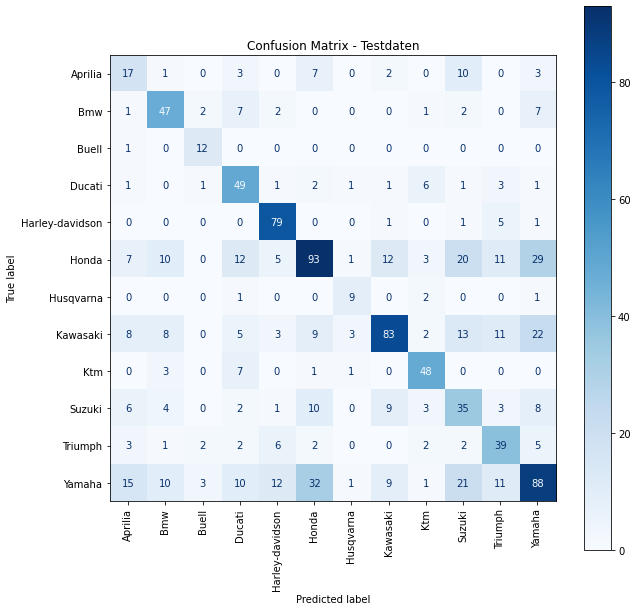

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(mlp_sklearn, X_test_scaled, y_test, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Testdaten')
plt.show()

**Fazit Model Tunning**  
Bei dem einfachen Modell zeigten sich bessere Scores je mehr Hidden Layers verwendet wurden (max=500 getestet, Testdaten Score=0.85). Die Vermutung liegt nahe das dies aber wohl zu einer hohen Variance (Overfitting) führt.

Die Parametersuche bei RandomSearch und mit Crossvalidation=4 dauerte ca. 20min. Bei RandomizedSearch wird der beste Score bei 200 Hidden Layer berechnet. Dies zeigt die Vorteile des Parameter tunnings um high Variance mit CV zu unterbinden. Auch zeigten sich für verschiedene alpha Werte keine Veränderung im F1-Score. Somit scheint keine Regularisierung besser zu sein. 

**Model auf dem gesamten Datensat testen**  
Das Model wurde mit den upsampleten Trainingsdaten trainiert. Um zu testen ob dies hilfreich war soll hier getestet werden, wie gut die Klassifizierung des Models auf dem kompletten Datensatz aussieht (Datensatz ohne künstliches upsampling von kleinen Klassen). 

Daten vorbereiten

In [76]:
df_moto_clean_mlp

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year,colour2,is_matt
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9.199279,285.0,0,0.000000,Kawasaki,0.0,schwarz,0
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9.199279,285.0,0,0.000000,Kawasaki,0.0,rot,0
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9.199279,285.0,0,0.000000,Kawasaki,0.0,grün,0
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,9.391828,285.0,0,2.302585,Kawasaki,0.0,schwarz,0
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,9.259131,262.0,12,2.302585,Kawasaki,1.0,grau,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,8.628735,283.0,137,10.117065,Kawasaki,11.0,weiss,0
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,8.594154,271.0,161,10.341742,Kawasaki,13.0,schwarz,0
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,8.697847,283.0,112,9.764225,Kawasaki,9.0,schwarz,1
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,9.902987,281.0,0,2.302585,Kawasaki,0.0,schwarz,0


In [77]:
from sklearn import preprocessing

# verwende gleiche attribute wie das Modell trainiert wurde
attr_names = df_moto_mlp.columns.to_list()
df = df_moto_clean_mlp[attr_names].copy()
X_all = df.drop('brand', axis=1)
X_all_scaled = X_all.copy()
y_all = df['brand']

# Standardisierung von X_all
normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
X_all_scaler = preprocessing.StandardScaler().fit(X_all[normalize_attr])

# Standardisierte Werte schreiben
X_all_scaled.loc[:, normalize_attr] = X_all_scaler.transform(X_all[normalize_attr])

# Dummie Variablen von den Kategorischen Attributen erzeugen
X_all_scaled = pd.get_dummies(X_all_scaled)

Modell anwenden

In [78]:
# Modell anwenden
y_all_pred = mlp_sklearn.predict(X_all_scaled)

# Score Model sklearn
print('Sklearn Model Score: ', mlp_sklearn.score(X_all_scaled, y_all).round(4))

# F1 Score Testdaten
print('Kompleter Datensatz Scores:')
mlp2_sklearn_acc, mlp2_sklearn_acc, mlp2_sklearn_pre, mlp2_sklearn_f1 = calc_class_scores(y_all, y_all_pred, print_info=True)

Sklearn Model Score:  0.6961
Kompleter Datensatz Scores:
Accuracy: 0.696
Precision: 0.679
Recall: 0.781
F1: 0.718 



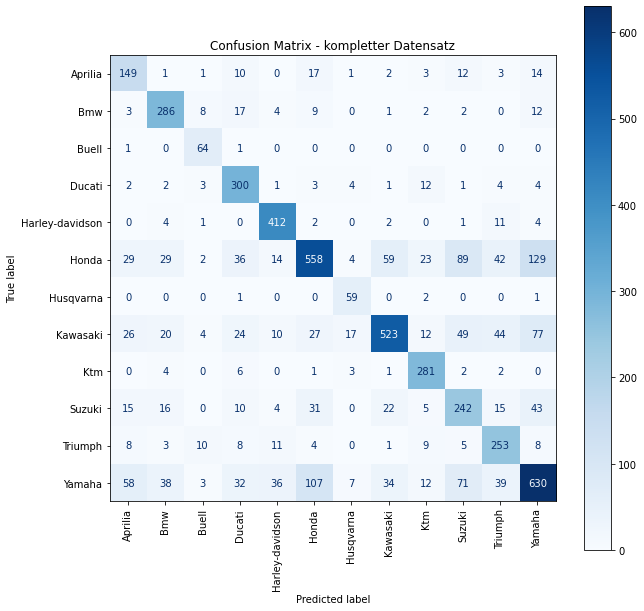

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(mlp_sklearn, X_all_scaled, y_all, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - kompletter Datensatz')
plt.show()

**Fazit Modell Anwendung auf dem kompletten Datensatz**  
Die obige Confusion Matrix, zeigt die Klassifizierung der Marke auf dem kompletten Datensatz. Der F1-Score ist gegenüber den Testdatenset zwar schlechter (F1=0.70, Testdaten F1=0.82), aber man sieht das jede Klasse klassifiziert wird. Falls ein Modell trainiert wird, bei dem die Klassen inbalance nicht beachtet wird, kann die Accuracy des Modells zwar höher ausfallen, aber die Klassen die kaum vorhanden sind, werden viel häufiger oder komplett ignoriert. Daher ist es in jedem Fall sinnvoll den F1-Scores zu betrachten und auch die Confusion Matrix genauer zu untersuchen.  

Der Score des Modells resp. die Klassifizierung der Marke ist nich ideal. Es wurden soweit alle Attribute die relevant scheinen verwendet. Es wird vermutet dass anhand der vorliegenden Attribute eine exakte Zuweisung der Motorrad Marke schwierig ist. Die Hersteller stehen in starker Konkurrenz untereinander und die Leistungsdaten sind teilweise sehr ähnlich. 

YOUR ANSWER HERE

### Aufgabe 6 - Decision Tree - Theorie (6 Punkte)

Erkläre wie ein Decision Tree erstellt wird.  

Welche Rolle spielen dabei Metriken wie die Entropie oder Gini-Index?  

Was sind die Eigenschaften der Decision Boundary bei Decision Trees?  

Wodurch kann bei Decision Trees Overfitting entstehen? Diskutiere welche Ansätze möglich sind, um Overfitting zu vermeiden.

**Erkläre wie ein Decision Tree erstellt wird**  
Der Decision Tree Algorithmus erstellt von bestehenden Daten einen mehrstufigen, hirarchischen Entscheidungsprozess mit  dem neue Daten  klassifiziert werden können. Der Weg der Entscheidungen werden dabei als Äste (Branches), wie die eines Baumes, bezeichnet. Der Startpunkt ist der Wurzelknoten, dort wird die erste Entscheidung getroffen. Bei jeder Entscheidung werden schrittweise weitere Entscheidungen (resp Knoten) getroffen, das so lange bis die Daten komplett eingeteilt wurden oder der Prozess abgebrochen wird. Das Ende dieses Prozesses wird als Blatt bezeichnet und entspricht der Klassifikation der Daten. Ein Beispiel für eine Entscheidung  wäre wenn X grösser Y dann gehe auf diesem Ast weiter und lande in diesem Node, dieses Node könnte dann über X kleiner Z entscheiden und so weiter. Die Entscheidung welche Attribute und Werte für einen Split verwendet werden, werden durch die Berechung der Reinheit erstellt. Daraus wird der Information Gain oder die Informations Gewinnung errechnet um den best möglichsten Split zu erzielen.

**Welche Rolle spielen dabei Metriken wie die Entropie oder Gini-Index?**   
**Entropy** beschreibt die Messung der Ungenauigkeit oder umgekehrt die Messung der Genauigkeit. In Zusammenhang mit Entscheidungsbäumen wird auch von Reinheit (eines Splits) gesprochen. Die Berechnung der Entropy ergibt einen Wert zwischen 0 und 1. 0 entspricht kompletter Reinheit und 1 der maxiamalen Unreinheit. Das Ziel ist einen möglichscht geringen Entropy Wert zu erhalten.  

 $ Entropy = - \sum_{i=1}^{n} p_i \cdot Log_2(p_i)$

**Gini Index** oder auch Gini Impurity bewegt sich zwischen 0 und 0.5. Kleine Werte zeigen eine geringe Unreinheit und grössere Werte eine hohe Unreinheit. Das Maximum der Unreinheit wird erreicht, wenn jede Klasse in einem Knoten die gleicher Wahrscheinlichkeit hat. 
Das Ziel ist die Entscheidungsknoten festzulegen bei der der Gini-index am kleinsten ist. 

$ Gini Index = 1 - \sum_{i=1}^n (p_i)^2$

**Information Gain** berechnet den Informations Gewinn eines Spits indem 1 - die Metrik der Reinheit verwendt wird. Nachdem alle Attribute und Werte verglichen wurden, wird Attribut und Wert mit dem höchsten Information Gain als Split vewendet. Für Information Gain kann sowoll der Gini Index als auch Entropy vernwendet werden.

$ Information Gain = 1 - Gini Index $  
$ Information Gain = 1 - Entropy $

**Unterschiede der beiden Metriken:**   
Gini Index und Entropy legen beide die Reinheit eines Splits fest. Es gibt zwei Hauptunterschiede: 
- Das Interval von Gini Index beträgt [0, 0.5], das von Entropy [0, 1].
- Die Berechnung von Entrpy ist komplexer, weshalb diese mehr Rechenzeit benötigt. Je nach Laeistung des Systems kann das relevant sein.  
Ansonsten sind die Metriken sehr ähnlich. Entscheidungsbüme erstellt mit Entropy erstellen mehr ausgewogene Bäume, wohingegen der Gini-index die Hauptklassen in einen eigenen Ast (Branch) steckt.  

**Was sind die Eigenschaften der Decision Boundary bei Decision Trees?**  
Die Decision Boundary von Entscheidungsbäumen sind jeweils parallel zu den Achsen. Parallel daher da ein Split nach einem konstanten Wert ausgeführt wird. Einen Split mit y = X > 3 entspricht einer vertikalen Linie auf der x-Achse beim konstanten Wert 3. Diese Eigenschaft ist die unterschiedlich zur Linearen Regression mit y = mx + b.  

**Wodurch kann bei Decision Trees Overfitting entstehen? Diskutiere welche Ansätze möglich sind, um Overfitting zu vermeiden.**  
Durch die Metriken Gini-index und Entropy ist das Ziel den Wert zu minimieren. Also eine perfekte Reinheit in der Klassifizierung zu erhalten. Der kleinste Wert wird erreicht wenn jeder Datenpunkt in einem Blatt (Leaf) landet. Zum Beispiel wächst der Baum auf dem Trainingsset so lange bis alle Datenpunkte in einem Blatt landen und die Merik den Wert 0 erreicht. Ein solches Modell wird aber auf den Test Daten, wegen Overfitting, zu schlechten Resultaten führen.

Somit muss beim erstellen eines Entscheidungsbaumes unbedingt auf die Tiefe der Knoten geachtet werden. Um einen Overfitt vorzubeugen wird der Baum beschnitten, also ab einer gewissen Tiefe am wachsen gehindert (Prunning). Bei Sklearn steht dafür der parameter `max_depth` oder `min_samples_leaf` zur Verfügung. Mit RandomizedSearchCV kann mit Cross Validation die beste Tiefe eines Baums gesucht werden.
Prunning kann weiter in Pre- und Postprunnig geteilt werden. Preprunning lässt den Baum ab einer gewissen Tiefe nicht weiter wachsen. Postprunning lässt den Baum komplett wachsen und danach nach gewissen Anforderungen zurückgeschnitten. In Sklearn steht dafür der Parameter `ccp_alpha` (cost comlexity-parameter) zur Verfügung. Für grössere Werte von ccp_alpha wird der Baum stärker beschnitten indem die schwächsten Knoten entfernt werden.

### Aufgabe 7 - Decision Tree - Anwendung I (4 Punkte)

Betrachte nun eine Vorhersage der Variablen `has_mfk`.  
Berechne dazu einen Entscheidungsbaum mit vier Teilräumen 'manuell', das heisst, bloss auf der Basis von Numpy-Funktionalität und unter Verwendung des Gini-Index.  

Visualisiere den resultierenden Baum und diskutiere seine Entstehung.  

Wie gut ist die Vorhersage? 

Die Klasse `has_mkf` ist binär, kann also den Wert 0 oder 1 annehmne. Der Eda-teil zeigt das beide Werte in etwas gleich oft Vorkommen. Daher liegt kein Inbalance der Klasse vor und ein up-down sampling ist nicht notwendig. In Anbetracht der Ziel Variable wurde bei der Auswahl auf logische Attribute reduziert. `colour`, `brand`, `fuel`, `condition`, und `body_shape` wurden für das Modell entfernt. `performance` und `curb_weight` werden vorerst auch weggelassen. Es wurde überlegt alle Attribute zu verwenden, jedoch machen einige für die Model Erklärung nicht viel Sinn (Korrelation und Kausalität). Zum Beispiel Einfluss der Farbe kann in Modellen einen Einfluss bewirken, einen kausalen Zusammenhang kann aber nicht hergestellt werden. 

In [80]:
# Daten Aufbereiten
attr_tree_7 = ['price', 'registration_age', 'mileage', 'performance', 'has_mfk']
df_tree_model = df_moto_clean[attr_tree_7]
df_tree_model

,price,registration_age,mileage,performance,has_mfk
0,9890,0,1.0,125.0,True
1,9890,0,1.0,125.0,True
2,9890,0,1.0,125.0,True
3,11990,0,10.0,125.0,True
4,10500,12,10.0,48.0,True
...,...,...,...,...,...
5614,5590,137,24762.0,188.0,False
5615,5400,161,31000.0,175.0,False
5616,5990,112,17400.0,188.0,False
5617,19990,0,10.0,200.0,True


Folgend eine kurze Korrealtions Übersicht der ausgewählten Attribtue zur Ziel Variabel `has_mfk`

In [81]:
# Erstellen der Daten für das Baummodell
X_tree = df_tree_model.copy().drop('has_mfk', axis=1)
y_tree = df_tree_model.copy()['has_mfk']

# Aufteilung in Train- Testdaten
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, 
                                                                        random_state=42, shuffle=True)

Folgend Funktion um einen Decision Tree zu trainieren und anzuwenden

In [82]:
# Funktionen Decision Tree

def calc_gini_index(y_split):
    '''
    Berechnung des Gini Index für eine Binäre Zielvariabele (oder zwei Klassen)
    y1_count: count Klasse 1
    y2_count: count Klasse 2
    '''
    #print(y_split)
    
    # check if none
    if len(y_split) == 0:
        #print('y_split leer')
        y_true_count = 0
        y_false_count = 0
    
    # check ob beide Klassen vorhanden True False und y_split nicht leer
    if (len(y_split.value_counts().index.values) < 2) & (len(y_split) != 0):
        if y_split.value_counts().index.values[0] == True:
            y_false_count = 0
            y_true_count = y_split.value_counts().values[0]
        else:
            y_true_count = 0
            y_false_count = y_split.value_counts().values[0]
    
    
    # Berechne vorkommen der binären Klassen
    if len(y_split.value_counts().index.values) == 2:
        y_true_count = y_split.value_counts()[0]
        y_false_count = y_split.value_counts()[1]
    
    # total Observations
    n_total = y_true_count + y_false_count
    #print(n_total)
    
    # wenn n_total 0 dann perfekter gini score
    if n_total == 0:
        return 0.
    
    # Wahrscheinlichkeit der Klasse berechnen
    p1 = y_true_count / n_total
    p2 = y_false_count / n_total
    
    # berechne gini-index
    gini_index = 1 - (p1 ** 2 + p2 ** 2)
    
    return gini_index


def calc_best_split(X, y, print_info=True):
    '''
    Berechnet den besten Split indem Information Gain auf jeder Spalte und
    jedem Zeilen Wert als Threshhold
    X: X Datenum passende Split Attribute und Werte zu finden
    y: y um die Aufteilung zu prüfen (Gini-index und Information Gain)
    print_info: Um Gini-index, Information Gain und beste Splits auszugeben
    return: returns die jeweilen x / y Daten des Splits recht / links
    '''
    x_col_names = X.columns.to_list()
    #X = np.array(X)
    #y = np.array(y)
    
    best_split_col = None
    best_split_val = None
    best_info_gain = -999
    
    # speichern Gini-Index 
    gini_before = calc_gini_index(y)
    if print_info: 
        print('################## Split ###################')
        print(f'gini-index before split {gini_before:0.3f}')
        print(f'n_samples: {len(y)}')
    
    # Durch Spalten von X iterieren
    for col in x_col_names:
        if print_info: print('check spalte: ', col)
        x_col = X.loc[:, col]
        
        # für jeden Wert in Spalte
        for row_value in x_col:
            split_value = row_value
            # Aufteilung links, rechts split nach Zeilen wert. Suche nach optimum Split Value in der Zeile
            x_col_index_left = X[X[col] <= split_value].index
            x_col_index_right = X[X[col] > split_value].index
            y_left = y.loc[x_col_index_left].copy()
            y_right = y.loc[x_col_index_right].copy()
                        
            # Berechne Reinheit des Splits -> 
            gini_left = calc_gini_index(y_left)
            gini_right = calc_gini_index(y_right)
    
            # Berechne Information Gain
            info_gain_after_split = gini_before
            info_gain_after_split -= (gini_left * len(y_left) / len(y))
            info_gain_after_split -= (gini_right * len(y_right) / len(y))
            
            
            # Prüfe ob Gini-index besser als vorher
            if info_gain_after_split > best_info_gain:
                best_split_col = col
                best_split_val = row_value
                best_info_gain = info_gain_after_split
                if print_info: 
                    print(f'{gini_left=:0.4f}, {gini_right=:0.4f}, {info_gain_after_split=:0.4f}, {best_split_col=}, {best_split_val=}')
    
    # bester Split ausführen
    #split_col = X.loc[:, best_split_col]
    x_left =  X[X[best_split_col] <= best_split_val]
    x_right = X[X[best_split_col] > best_split_val]
    
    y_left = y.loc[x_left.index]
    y_right = y.loc[x_right.index]
    
    if print_info:
        print()
        print(f'Resultat füt Best Split: {best_split_col=}, {best_split_val=}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left):.4f}, Gini-Idex Right: {calc_gini_index(y_right):.4f}')
        print()
    
    return best_split_col, best_split_val, x_left, y_left, x_right, y_right 

In [83]:
def get_best_split(X, y, verbose=1):
    '''
    Erstellt einen Baum mit zwei Splits. Wurzelknoten erster Split, die Resultate werden wieder nach
    bestem Split Attribut durchsucht und geteilt
    X: X Trainingsdaten
    y: y Trainingsdaten
    verbose: verschiedene Informationsstufen wie der Baum erstellt wird
    return: returns die besten Splitt Attribute und deren Werte nach Split Reihenfolge
    '''
    x_split = X.copy()
    y_split = y.copy()
    
    # Liste mit Split Informationen Wurzelknote index 0, danach von links nach rechts. index 1 split 2 links
    split_attr = []
    split_val = []
    
    if verbose == 0:
        # Erstelle ersten Splits nach bestem Attribute und Splitwert
        best_split_col1, best_split_val1, x_left1, y_left1, x_right1, y_right1 = calc_best_split(X_train_tree, 
                                                                                   y_train_tree, print_info=False)
         
        # Linker Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
        best_split_col2, best_split_val2, x_left2, y_left2, x_right2, y_right2 = calc_best_split(x_left1, 
                                                                                   y_left1, print_info=False)  
        
        # Rechter Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
        best_split_col3, best_split_val3, x_left3, y_left3, x_right3, y_right3 = calc_best_split(x_right1, 
                                                                                   y_right1, print_info=False) 
    
    if verbose == 1:
        # Erstelle ersten Splits nach bestem Attribute und Splitwert
        best_split_col1, best_split_val1, x_left1, y_left1, x_right1, y_right1 = calc_best_split(X_train_tree, 
                                                                                   y_train_tree, print_info=False)
         
        # Linker Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
        best_split_col2, best_split_val2, x_left2, y_left2, x_right2, y_right2 = calc_best_split(x_left1, 
                                                                                   y_left1, print_info=False)  
        
        # Rechter Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
        best_split_col3, best_split_val3, x_left3, y_left3, x_right3, y_right3 = calc_best_split(x_right1, 
                                                                                   y_right1, print_info=False) 
        # Print Results
        print()
        print('Results:')
        print(f'Split 1 Attribut: {best_split_col1}, Split 1 Wert: {best_split_val1}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left1):.4f}, Gini-Idex Right: {calc_gini_index(y_right1):.4f}')
                                                                                                 
        print(f'Split 2 Links, Attribut: {best_split_col2}, Split 2 Wert: {best_split_val2}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left2):.4f}, Gini-Idex Right: {calc_gini_index(y_right2):.4f}') 
                                               
        print(f'Split 3, Rechts, Attribut: {best_split_col3}, Split 3 Wert: {best_split_val3}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left3):.4f}, Gini-Idex Right: {calc_gini_index(y_right3):.4f}')                                                                                                                                                                                
        
    if verbose == 2:
        # Erstelle ersten Splits nach bestem Attribute und Splitwert
        best_split_col1, best_split_val1, x_left1, y_left1, x_right1, y_right1 = calc_best_split(X_train_tree, 
                                                                                   y_train_tree, print_info=True)       
        
        # Linker Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
        best_split_col2, best_split_val2, x_left2, y_left2, x_right2, y_right2 = calc_best_split(x_left1, 
                                                                                   y_left1, print_info=True)         
        
        # Rechter Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
        best_split_col3, best_split_val3, x_left3, y_left3, x_right3, y_right3 = calc_best_split(x_right1,
                                                                                    y_right1, print_info=True) 
        
        # Print Results
        print()
        print('Results:')
        print(f'Split 1 Attribut: {best_split_col1}, Split 1 Wert: {best_split_val1}, samples: {len(y)}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left1):.4f}, Gini-Idex Right: {calc_gini_index(y_right1):.4f}')
                                                                                                 
        print(f'Split 2 Links, Attribut: {best_split_col2}, Split 2 Wert: {best_split_val2}, samples: {len(y_left1)}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left2):.4f}, Gini-Idex Right: {calc_gini_index(y_right2):.4f}') 
                                               
        print(f'Split 3, Rechts, Attribut: {best_split_col3}, Split 3 Wert: {best_split_val3}, samples: {len(y_right1)}')
        print(f'Gini-Idex Left: {calc_gini_index(y_left3):.4f}, Gini-Idex Right: {calc_gini_index(y_right3):.4f}')
        
        print()
        print(f'sample Left: {len(y_left2)}, {len(y_right2)}, sample Right: {len(y_left3)}, {len(y_right3)}')
        
    split_attr.append([best_split_col1, best_split_col2, best_split_col3])
    split_val.append([best_split_val1, best_split_val2, best_split_val3])
        
    return split_attr[0], split_val[0]
        

In [84]:
def get_prediction_tree(X, split_attr, split_val):
    '''
    Fittet X_test Daten und predicted 'has_mfk' anhand der besten Splitattribut und deren Splitwerte
    X: X für die Vorhersage
    split_attr: beste Split Attribute
    split_val: beste splitwerte
    '''
    X = X.reset_index(drop=True)
    # Liste mit predictions Vorbereiten
    y_pred = np.array([np.nan for _ in range(X.shape[0])])
    
    # Split Kriterium 
    split_1_true_kriterium = X[split_attribute[0]] <= split_value[0]
    split_1_false_kriterium = X[split_attribute[0]] > split_value[0]
    
    split_2_left_true_kriterium = X[split_attribute[1]] <= split_value[1]
    split_2_left_false_kriterium = X[split_attribute[1]] > split_value[1]    
    split_2_right_false_kriterium = X[split_attribute[2]] <= split_value[2]
    split_2_right_true_kriterium = X[split_attribute[2]] > split_value[2]
    
    # Kriterium das has_mkf True or False
    leafs_left_true_index = X[split_1_true_kriterium &  split_2_left_true_kriterium].index
    leafs_left_false_index = X[split_1_true_kriterium &  split_2_left_false_kriterium].index
    
    leafs_right_true_index = X[split_1_false_kriterium &  split_2_right_true_kriterium].index
    leafs_right_false_index = X[split_1_false_kriterium &  split_2_right_false_kriterium].index
        
    y_pred[leafs_left_true_index] = 1
    y_pred[leafs_left_false_index] = 0 
    y_pred[leafs_right_true_index] = 1       
    y_pred[leafs_right_false_index] = 0
    
    return y_pred

**Split Attribute und Werte testen**  
Hier werden die einzelnen Schritte der Funktion `get_best_split` manuell geprüft und visuell dargestellt, wie die neue Aufteilung von `has_mfk` nach einem Split aussieht. Der oberste Subplot entspricht der Verteilung der Daten für den Wurzelknoten. Die beiden folgenden Plots zeigen die Aufteilung nach dem Split des Wurzelknoten. Die untern vier Plots die Aufteilung der Blätter für den Baum aus der Aufgabenstellung mit vier Teilräumne (oder zwei Splits).

In [85]:
# Wurzelknoten / Erster Split: Variable mit dem besten Information Gain und Wert suchen
best_split_col1, best_split_val1, x_left1, y_left1, x_right1, y_right1 = calc_best_split(X_train_tree, 
                                                                                   y_train_tree, print_info=False)

# Linker Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
best_split_col2, best_split_val2, x_left2, y_left2, x_right2, y_right2 = calc_best_split(x_left1, 
                                                                                   y_left1, print_info=False) 

# Rechter Knoten / zweiter Split: Variable mit dem besten Information Gain und Wert suchen
best_split_col3, best_split_val3, x_left3, y_left3, x_right3, y_right3 = calc_best_split(x_right1, 
                                                                                   y_right1, print_info=False) 

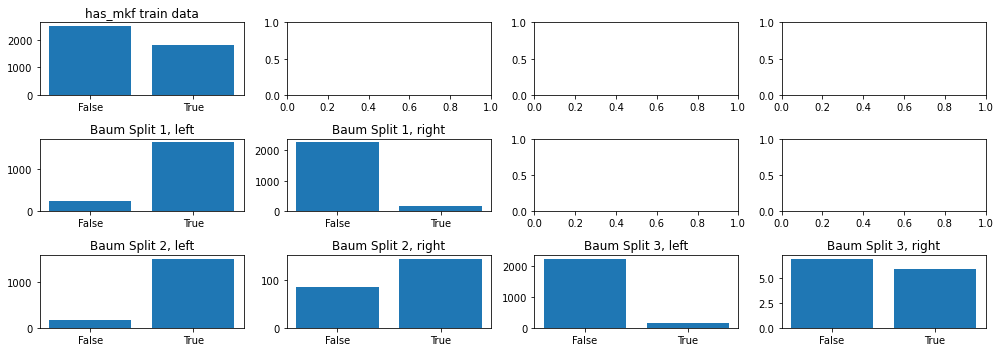

In [86]:
fig, ax = plt.subplots(3,4, figsize=(14, 5))
ax = ax.flatten()

ax[0].bar(x=['False', 'True'], height=y_train_tree.value_counts().sort_index())
ax[0].set_title('has_mkf train data')

ax[4].bar(x=['False', 'True'], height=y_left1.value_counts().sort_index())
ax[4].set_title('Baum Split 1, left')
ax[5].bar(x=['False', 'True'], height=y_right1.value_counts().sort_index())
ax[5].set_title('Baum Split 1, right')

ax[8].bar(x=['False', 'True'], height=y_left2.value_counts().sort_index())
ax[8].set_title('Baum Split 2, left')
ax[9].bar(x=['False', 'True'], height=y_right2.value_counts().sort_index())
ax[9].set_title('Baum Split 2, right')
ax[10].bar(x=['False', 'True'], height=y_left3.value_counts().sort_index())
ax[10].set_title('Baum Split 3, left')
ax[11].bar(x=['False', 'True'], height=y_right3.value_counts().sort_index())
ax[11].set_title('Baum Split 3, right')

plt.tight_layout()
plt.show()

**Decision Tree Modell auf 'has_mfk' anwenden**  
Folgend wird ein Decision Tree mit den Trainingsdaten trainiert, die gefundenen Splitattribute und deren Werte ermittelt und auf die Testdaten angewendet.

In [87]:
# Achtung dauer 2-3min
# Baum erstellen und Split Attribute festlegen      
split_attribute, split_value = get_best_split(X_train_tree, y_train_tree, verbose=2)

################## Split ###################
gini-index before split 0.488
n_samples: 4325
check spalte:  price
gini_left=0.3789, gini_right=0.4945, info_gain_after_split=0.0438, best_split_col='price', best_split_val=5990
gini_left=0.4053, gini_right=0.4810, info_gain_after_split=0.0489, best_split_col='price', best_split_val=7490
gini_left=0.4192, gini_right=0.4674, info_gain_after_split=0.0504, best_split_col='price', best_split_val=8300
gini_left=0.3924, gini_right=0.4833, info_gain_after_split=0.0521, best_split_col='price', best_split_val=6950
gini_left=0.3944, gini_right=0.4818, info_gain_after_split=0.0526, best_split_col='price', best_split_val=7000
check spalte:  registration_age
gini_left=0.4977, gini_right=0.1309, info_gain_after_split=0.0789, best_split_col='registration_age', best_split_val=153
gini_left=0.1826, gini_right=0.2066, info_gain_after_split=0.2903, best_split_col='registration_age', best_split_val=50
gini_left=0.2398, gini_right=0.1319, info_gain_after_split=0

In [88]:
# Vorhersage auf den Testdaten erstellen
y_test_pred_mfk = get_prediction_tree(X_test_tree, split_attribute, split_value)

# Score Berechnen
acc_tree, _, _, _ = calc_class_scores(y_test_tree, y_test_pred_mfk, print_info=True)

Accuracy: 0.879
Precision: 0.881
Recall: 0.874
F1: 0.876 



**Visualisierung Decision Tree**  
Anstelle einer Plot Funktion eine von Hand erstelltes hirarchisches Bild des erstellten Decision Trees

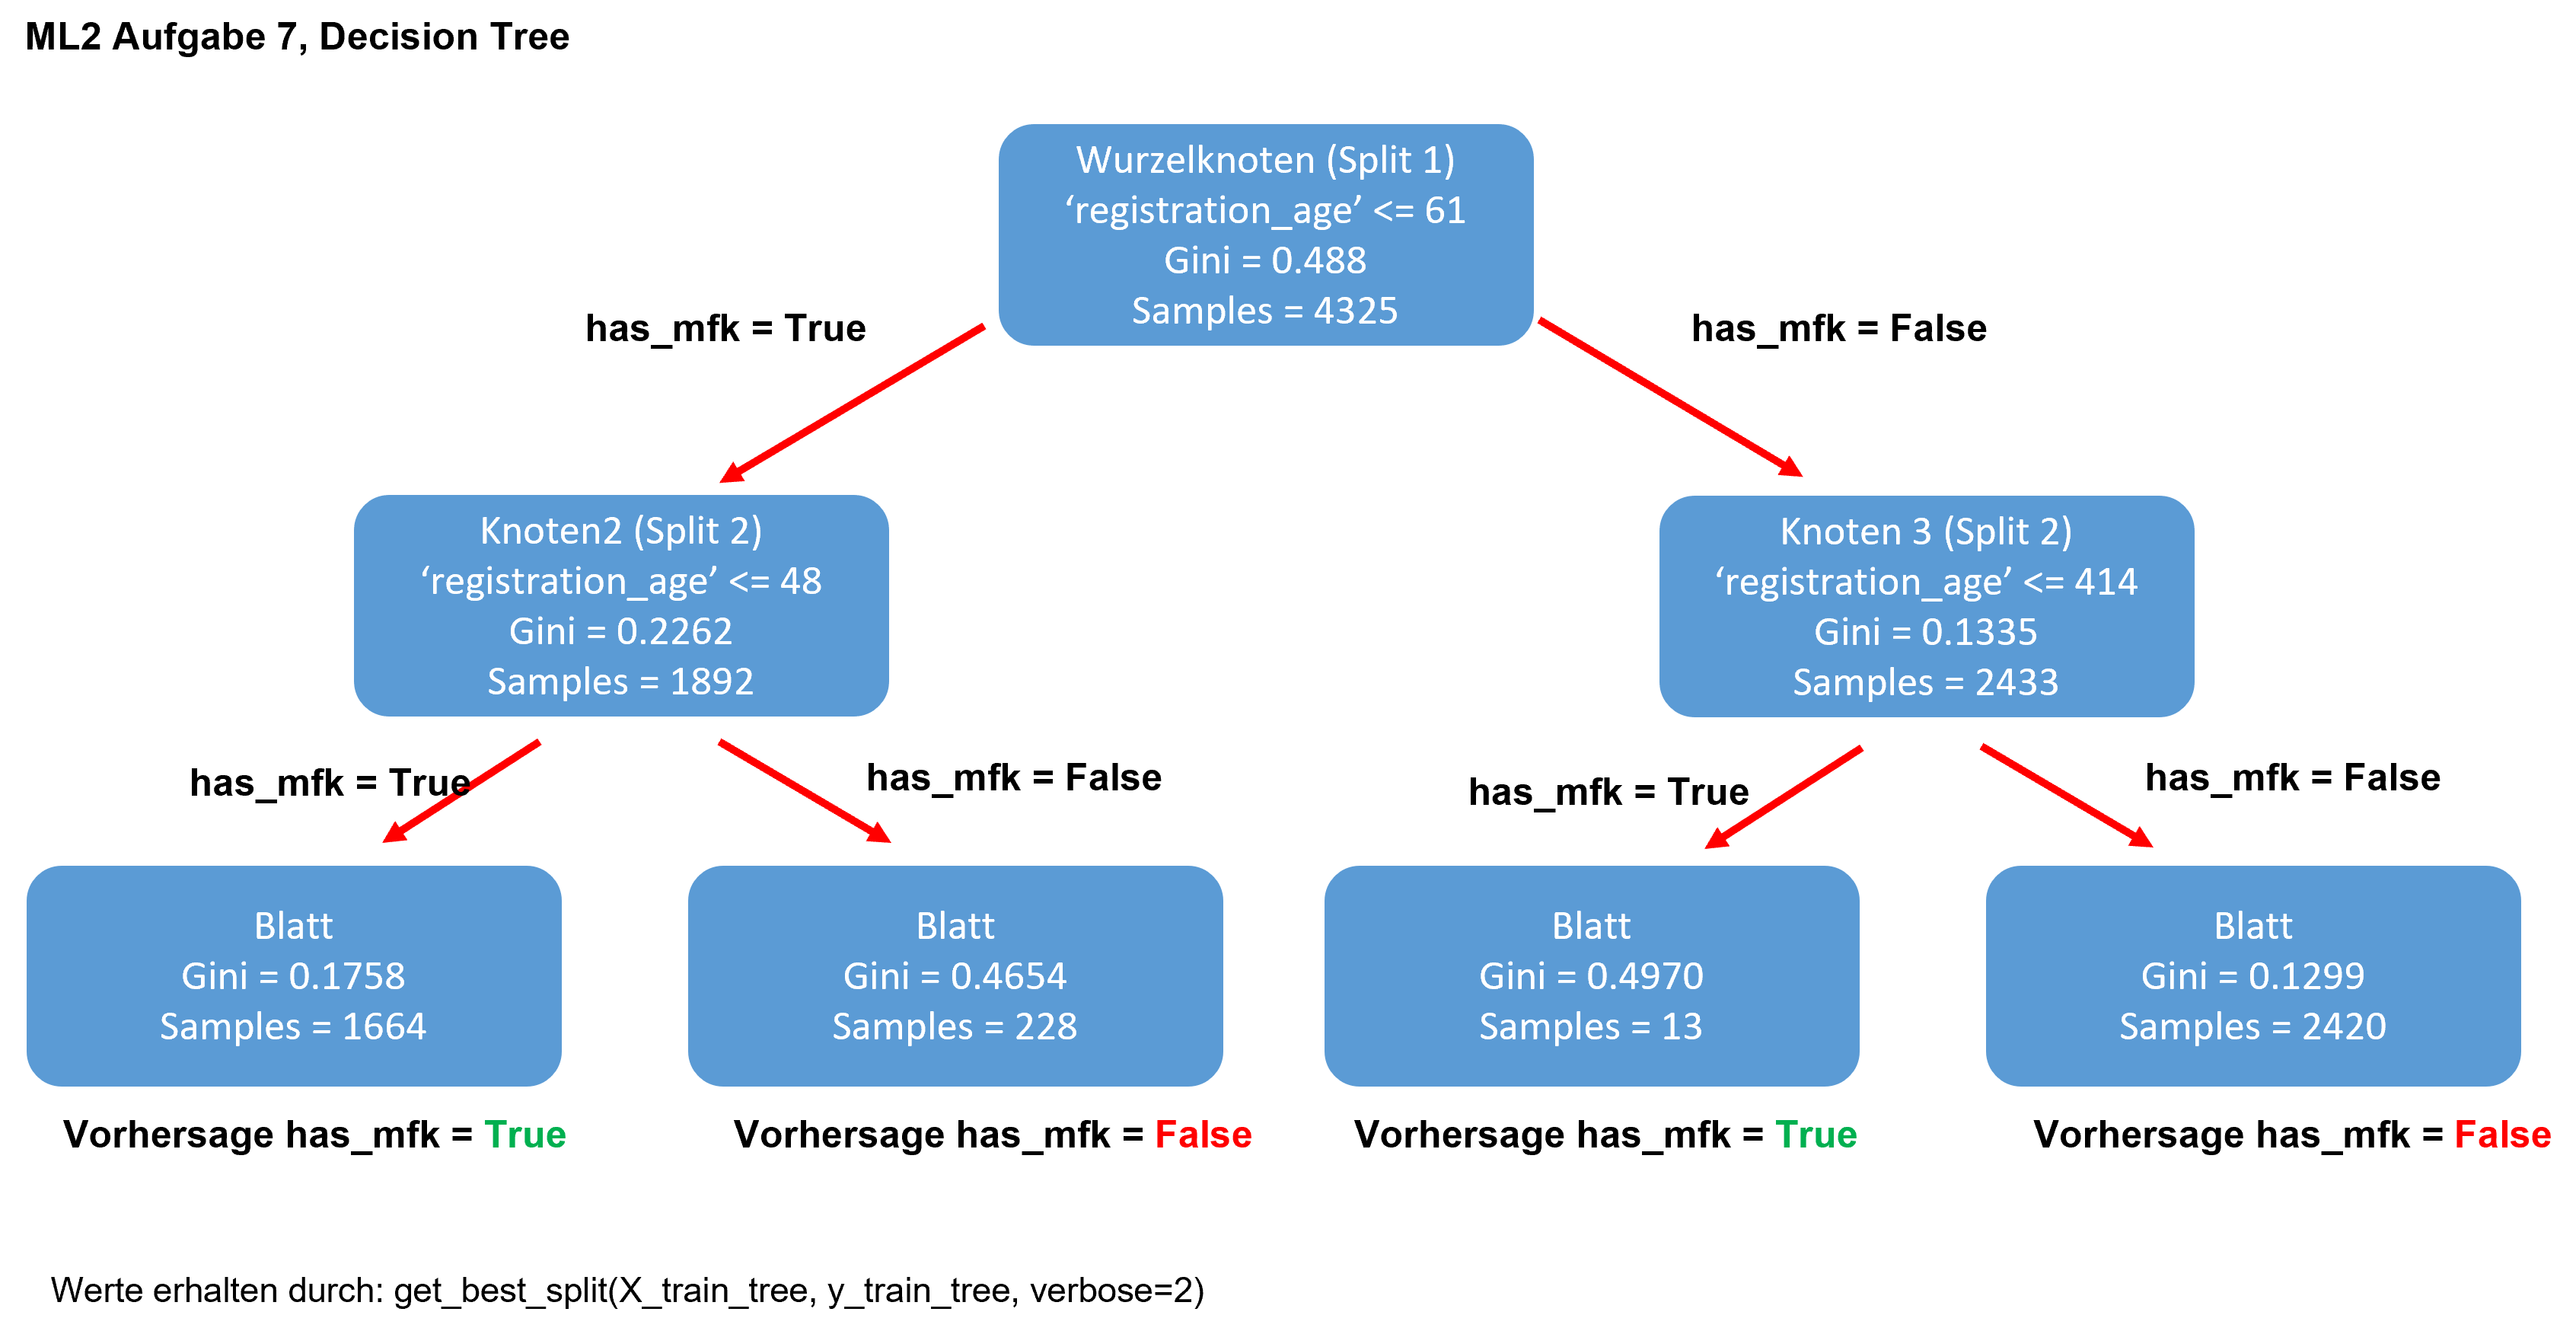

**Fazit Resultate**  
Die Wahl des Decision Tree, für Attribute mit die besten Splits, fällt dreimal auf das Attribut `registration_age`. Nur anhand dieser einzelnen Variablen lässt sich einen Score von 0.88 erreichen (Hier kan auch Accuracy verwendet werden da kein Inbalance vorhanden ist). Die Wahl `registration_age` macht vermutlich Sinn da die MFK erstmal stark davon abhängt wie lang das Motorrad bereits eingelöst ist. Mit dem ersten Split (Split Wert: `registration_age=61`) findet bereits eine sehr gute Aufteilung statt. Wohl je nach Land etwas unterschiedlich, besitzen neue Motorräder die MFK bereits ab Werk für die ersten paar Jahre (in diesem Datenset wohl 61/12 = 5 Jahre). Im zweiten Split wird erneut `registration_age` als bestes Attribute erkannt. Wohl daher da die MFK obligatoisch ist sofern das Motorrad eingelöst ist. Eine grosse Verbesserung findet aber nicht mehr statt. 

### Aufgabe 8 - Decision Tree - Anwendung II (5 Punkte)

Verwende nun einen Decision Tree von scikit-learn zur Klassifikation von `brand`.

Zeichne den besten resultierenden Baum und erkläre ihn.

Evaluiere und diskutiere die Resultate, zeichne dabei auch die Confusion Matrix auf dem Testset.

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Daten vorbereiten
attr_tree_2 = ['displacement', 'performance', 'price', 'curb_weight', 'mileage', 'age_year', 'body_shape', 'brand', 'colour2']
df_tree_model2 = df_moto_clean_mlp[attr_tree_2].copy()
df_tree_model2['colour2'] = df_tree_model2['colour2'].astype('category')
df_tree_model2

,displacement,performance,price,curb_weight,mileage,age_year,body_shape,brand,colour2
0,947.0,125.0,9.199279,285.0,0.000000,0.0,Strasse,Kawasaki,schwarz
1,947.0,125.0,9.199279,285.0,0.000000,0.0,Strasse,Kawasaki,rot
2,947.0,125.0,9.199279,285.0,0.000000,0.0,Strasse,Kawasaki,grün
3,948.0,125.0,9.391828,285.0,2.302585,0.0,Strasse,Kawasaki,schwarz
4,649.0,48.0,9.259131,262.0,2.302585,1.0,Strasse,Kawasaki,grau
...,...,...,...,...,...,...,...,...,...
5614,997.0,188.0,8.628735,283.0,10.117065,11.0,Strasse,Kawasaki,weiss
5615,997.0,175.0,8.594154,271.0,10.341742,13.0,Strasse,Kawasaki,schwarz
5616,997.0,188.0,8.697847,283.0,9.764225,9.0,Strasse,Kawasaki,schwarz
5617,998.0,200.0,9.902987,281.0,2.302585,0.0,Strasse,Kawasaki,schwarz


In [90]:
# setze Attribute body_shape als Zahl
df_tree_model2_num = df_tree_model2.copy()

df_tree_model2_num['body_shape_num'] = df_tree_model2['body_shape'].cat.codes.copy()
df_tree_model2_num.drop('body_shape', axis=1, inplace=True)

df_tree_model2_num['colour_num'] = df_tree_model2['colour2'].cat.codes.copy()
df_tree_model2_num.drop('colour2', axis=1, inplace=True)
df_tree_model2_num

,displacement,performance,price,curb_weight,mileage,age_year,brand,body_shape_num,colour_num
0,947.0,125.0,9.199279,285.0,0.000000,0.0,Kawasaki,6,13
1,947.0,125.0,9.199279,285.0,0.000000,0.0,Kawasaki,6,12
2,947.0,125.0,9.199279,285.0,0.000000,0.0,Kawasaki,6,9
3,948.0,125.0,9.391828,285.0,2.302585,0.0,Kawasaki,6,13
4,649.0,48.0,9.259131,262.0,2.302585,1.0,Kawasaki,6,8
...,...,...,...,...,...,...,...,...,...
5614,997.0,188.0,8.628735,283.0,10.117065,11.0,Kawasaki,6,16
5615,997.0,175.0,8.594154,271.0,10.341742,13.0,Kawasaki,6,13
5616,997.0,188.0,8.697847,283.0,9.764225,9.0,Kawasaki,6,13
5617,998.0,200.0,9.902987,281.0,2.302585,0.0,Kawasaki,6,13


In [91]:
# Erstellen der Daten für das Baummodell - Mit Integer Encoding
X_tree2 = df_tree_model2_num.copy().drop('brand', axis=1)
y_tree2 = df_tree_model2_num.copy()['brand']

# Erstellen der Daten für das Baummodell - Mit OneHotEncoding
#X_tree2 = df_tree_model2.copy().drop('brand', axis=1)
#X_tree2 = pd.get_dummies(X_tree2)
#y_tree2 = df_tree_model2.copy()['brand']

# Aufteilung in Train- Testdaten
X_train_tree2, X_test_tree2, y_train_tree2, y_test_tree2 = train_test_split(X_tree2, y_tree2, test_size=0.2, 
                                                                                random_state=42, shuffle=True)
X_train_tree2

,displacement,performance,price,curb_weight,mileage,age_year,body_shape_num,colour_num
4277,1298.0,146.0,9.661416,364.0,0.000000,0.0,6,14
2887,1584.0,76.0,9.441452,385.0,9.918376,8.0,1,13
625,656.0,85.0,8.387085,319.0,9.581904,8.0,6,8
570,1000.0,202.0,9.635608,279.0,7.495542,3.0,6,3
1974,941.0,52.0,8.985946,326.0,0.000000,0.0,1,6
...,...,...,...,...,...,...,...,...
3891,1783.0,113.0,9.082507,455.0,10.003333,12.0,1,15
5410,773.0,48.0,8.839277,292.0,9.287301,3.0,6,13
5445,748.0,34.0,8.268732,293.0,10.434116,15.0,6,16
5612,997.0,175.0,8.779557,271.0,10.085809,14.0,6,13


Auch hier kann RandomizedSearchCV helfen die optimalen Parameter zu finden. Welche Parameter sinvoll sind zu optimieren findet man in der [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) von sklearn oder mit `mlp_sklearn.get_params().keys()`. Anhand der besten Parameter kann die Range fortlaufen eingegrentzt werden, somit enthalten die untenstehenden Parameter bereits eine grob eingrenzung (Zeit ersparniss).

In [92]:
# Modell Parameter für Tunning auslesen
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [93]:
# Modell erstellen
tree_sklearn = DecisionTreeClassifier(random_state=42)
    
# Parameter festlegen
param_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': [10, 20, 50, 80, 100],
                  'min_samples_split': [10, 20, 30],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'min_samples_leaf': [1, 2, 3, 4, 10, 20]}
    
# GridSearchCV suche
random_grid_tree = RandomizedSearchCV(estimator=tree_sklearn,
                              param_distributions=param_grid,
                              cv=6, verbose=1)

random_grid_tree.fit(X_train_tree2, y_train_tree2)

# Randomized Search Parameter Info
print('Beste Parameter und Scores:')
print('best parameter: ', random_grid_tree.best_params_)
print('best scores: ', random_grid_tree.best_score_.round(4))
#print('grid scores: ', random_grid_tree.cv_results_.keys())
print('mean cv test score: ', np.mean(random_grid_tree.cv_results_['mean_test_score']).round(4))

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Beste Parameter und Scores:
best parameter:  {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy'}
best scores:  0.7477
mean cv test score:  0.6278


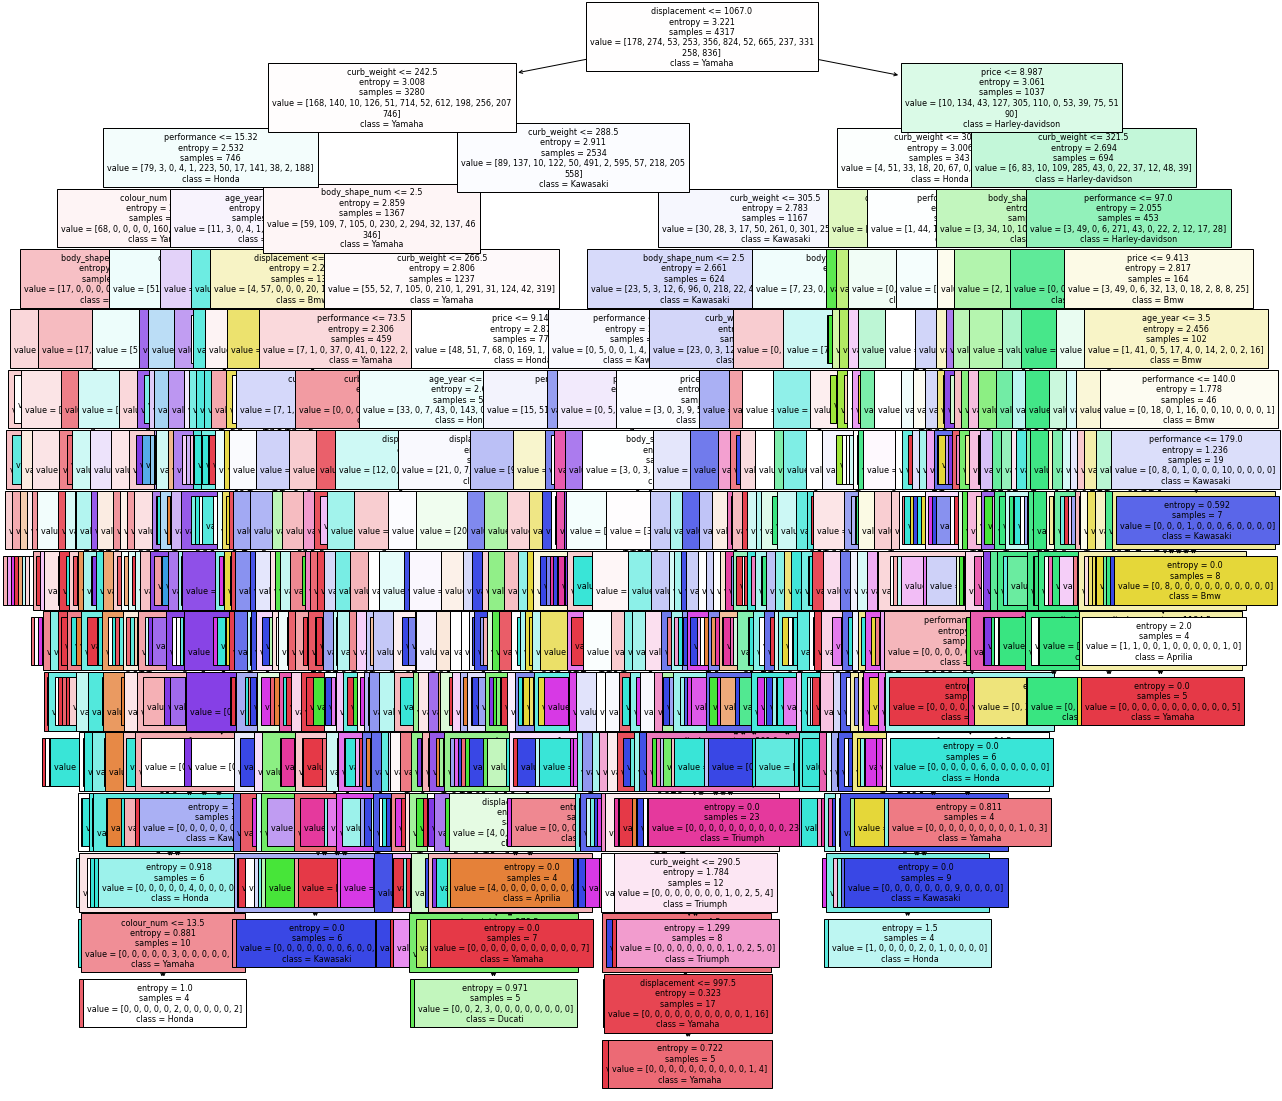

In [94]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 20))
plot_tree(random_grid_tree.best_estimator_,  max_depth=50, fontsize=8, 
          feature_names=list(X_train_tree2.columns), 
          class_names=np.unique(y_train_tree2), filled=True)
plt.show()

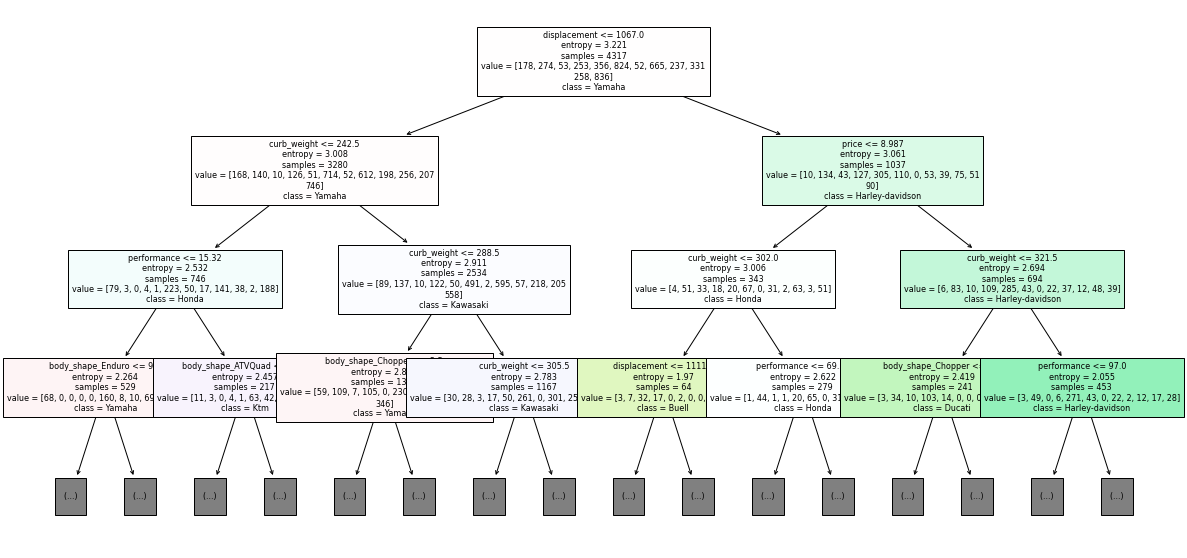

In [95]:
fig = plt.figure(figsize=(20, 10))
plot_tree(random_grid_tree.best_estimator_,  max_depth=3, fontsize=8, 
          feature_names=list(X_train_scaled.columns), 
          class_names=np.unique(y_train), filled=True)
plt.show()

**Baumstruktur zeichnen** [doku](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)   
Erklärung

**Confusions_Matrix**

In [96]:
# Vorhersage für Marke erstellen
y_train_pred = random_grid_tree.best_estimator_.predict(X_train_tree2)
y_test_pred = random_grid_tree.best_estimator_.predict(X_test_tree2)

# F1 Score Testdaten
print('Testdaten Scores:')
tree2_sklearn_acc, tree2_sklearn_acc, tree2_sklearn_pre, tree2_sklearn_f1 = calc_class_scores(y_test_tree2, y_test_pred, print_info=True)


Testdaten Scores:
Accuracy: 0.756
Precision: 0.711
Recall: 0.716
F1: 0.710 



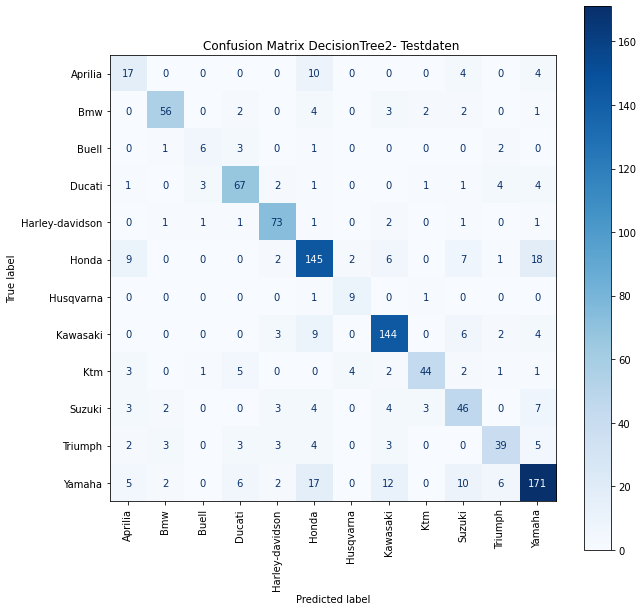

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(random_grid_tree.best_estimator_, X_test_tree2, y_test_tree2, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix DecisionTree2- Testdaten ')
plt.show()

**Fazit Confusion Matrix**  
Der F1-Score von 0.72 auf den Testdaten ist nicht so schlecht, in der Confusion Matrix kann erkannt werden, dass die Marken Honda, Yahmaha und Suzuki, häufiger falsch Klassifiziert werden als die übrigen Marken. Die Vermutung liegt nahe dass die technischen Eigenschaften dieser Marken sehr ähnlich sind. Um das Modell zu verbessern könnten mehr markenspezifische Merkmale helfen um die Ähnlichkeit zwischen diesen drei Marken besser zu unterscheiden (evtl mehr Infos zu verwendeten Bauteilen eines Motorrades).

Der **DecisionTreeClasifier** von Sklearn bietet die Möglichkeit **Feature Importance** auszugeben (auch Gini Importance). Die Top Features werden folgend als Tabelle gezeigt. Die technischen Eigenschaften der Motorräder zeigen sich wichtiger als zum Beispiel Farbe. Das zum Beispie Kawasaki grün kann hilfreich sein um die Marke Kawasaki Vorherzusagen, aber ist keine der Top Splits.

In [98]:
# Top n Features des Decision Trees
df_feat_imp = pd.DataFrame(random_grid_tree.best_estimator_.feature_importances_)
df_feat_imp['feature_name'] = X_train_tree2.columns.to_list()
df_feat_imp.rename(columns={0:'feature_importance'}, inplace=True)
df_feat_imp.sort_values('feature_importance', ascending=False, inplace=True)
df_feat_imp.head(20)

,feature_importance,feature_name
3,0.283442,curb_weight
0,0.244359,displacement
1,0.188716,performance
2,0.097511,price
6,0.059672,body_shape_num
5,0.056834,age_year
4,0.042417,mileage
7,0.027049,colour_num


**Model auf dem gesamten Datensat testen**  
Das Model wurde mit den upsampleten Trainingsdaten trainiert. Um zu testen ob dies hilfreich war soll hier getestet werden, wie gut die Klassifizierung des Models auf dem kompletten Datensatz aussieht (Datensatz ohne künstliches upsampling von kleinen Klassen). 

In [99]:
# Daten vorbereiten
X_tree_3_all = df_tree_model2_num.copy().drop('brand', axis=1)
y_tree3_all = df_tree_model2_num['brand']

In [100]:
# Modell anwenden
y_all_pred = random_grid_tree.best_estimator_.predict(X_tree_3_all)

# Score Model sklearn
print('Sklearn Model Score: ', random_grid_tree.best_estimator_.score(X_tree_3_all, y_tree3_all).round(4))

# F1 Score Testdaten
print('Kompleter Datensatz Scores:')
tree3_sklearn_acc, tree3_sklearn_acc, tree3_sklearn_pre, tree3_sklearn_f1 = calc_class_scores(y_tree3_all, 
                                                                                              y_all_pred, print_info=True)


Sklearn Model Score:  0.8547
Kompleter Datensatz Scores:
Accuracy: 0.855
Precision: 0.841
Recall: 0.833
F1: 0.836 



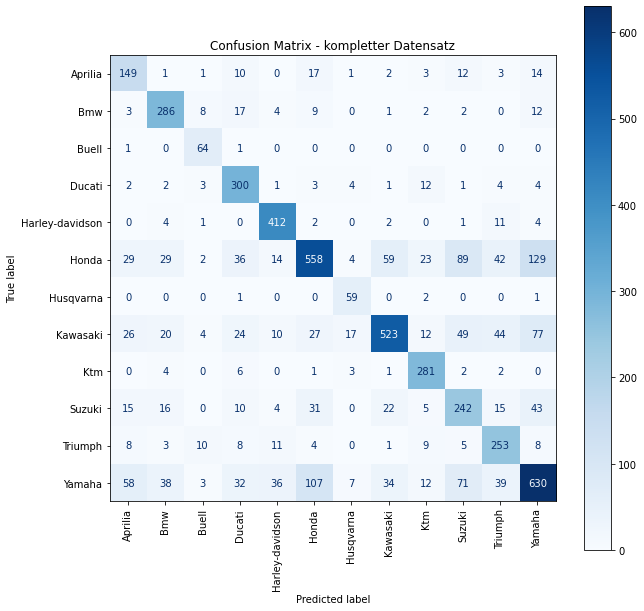

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(mlp_sklearn, X_all_scaled, y_all, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - kompletter Datensatz')
plt.show()

**Fazit Model auf dem kompletten Datensatz**  
Wie schon in Aufgabe 5 führt auch dieses Modell zu einem besseren Score auf dem kompletten Datensatz. Was zu erwarten ist, da ein grosser Teil aus den Trainingsdaten stammt. Die schwach vertretenen Klassen wie Buell und Husqvarna werden ohne Fehler Klassifiziert. Es ist wichtig dass diese Klassen klassifiziert werden, dennoch scheint es durch das Upsampling einen Overfitt auf diesen Klassen zu geben.  
Aus der Confusion Matrix ist auch ersichtlich welche Marken häuifger Falsch Klassifiziert werde. Zum Beispiel wird auch hier Honda überdurchschnittlich oft als Yamaha (und umgekehrt) klassifiziert..

### Aufgabe 9 - Bestes Modell (4 Punkte)

Nun bist du frei eine beliebiges scikit-learn Modell zur Vorhersage von `brand` zu verwenden, um eine möglichst gute Vorhersage im Sinne unserer Zielmetrik zu erreichen.  

Zeichne die Confusion Matrix auf dem Testset und diskutiere die Resultate.

Gute Resultate würde auch einen Random Forrest erziehlen. Da in der Challenge 1 bereits ein Random Forrest erstellt wurde, soll folgend die **Klassifiaktion mit k-Nearest-Neighbour** ausprobiert werden.  
Vorgehen:
- [Doku](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) einlesen
- Attribute festlegen
- Optimierungsparameter festlegen
- RandomizedSearchCV aufbauen
- Score und Confusion Matrix ausgeben
- Erkenntnisse ziehen

In [102]:
attr_knn = ['displacement', 'performance', 'price', 'curb_weight', 'mileage', 'age_year', 'brand']
df_knn = df_moto_clean[attr_knn].copy()
df_knn

,displacement,performance,price,curb_weight,mileage,age_year,brand
0,947.0,125.0,9890,285.0,1.0,0.0,Kawasaki
1,947.0,125.0,9890,285.0,1.0,0.0,Kawasaki
2,947.0,125.0,9890,285.0,1.0,0.0,Kawasaki
3,948.0,125.0,11990,285.0,10.0,0.0,Kawasaki
4,649.0,48.0,10500,262.0,10.0,1.0,Kawasaki
...,...,...,...,...,...,...,...
5614,997.0,188.0,5590,283.0,24762.0,11.0,Kawasaki
5615,997.0,175.0,5400,271.0,31000.0,13.0,Kawasaki
5616,997.0,188.0,5990,283.0,17400.0,9.0,Kawasaki
5617,998.0,200.0,19990,281.0,10.0,0.0,Kawasaki


In [103]:
# Daten vorbereiten
X_knn = df_knn.copy().drop('brand', axis=1)
y_knn = df_knn.copy()['brand']

# shuffel um die Daten zu mischen und stratify um auch in den Testdaten die kleinen Klassen zu haben
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, shuffle=True, stratify=y_knn)

# Standardisierung der Daten nach Train-Test split um Information Leakage zu verhindern
X_train_knn, _, _ = MLP.normalize_data(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn)
X_test_knn, _, _ = MLP.normalize_data(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn)
X_train_knn

,displacement,performance,price,curb_weight,mileage,age_year
120,0.347232,0.304071,0.809455,0.158270,-0.881029,-0.985530
567,-0.141704,0.528509,-0.437170,-0.093073,-0.325691,-0.583567
4134,-0.387401,-0.818123,0.204238,0.519575,0.202407,1.694225
669,-0.141704,1.365054,-0.616121,-0.375834,1.036247,0.622323
2418,-0.399686,-0.940544,-0.716655,-0.642885,-0.464665,0.890298
...,...,...,...,...,...,...
4288,0.467623,1.426264,-0.676441,0.064016,1.547669,0.622323
2454,1.116262,0.936580,-0.817189,1.729161,1.397578,1.292262
381,-0.166274,-0.080332,-1.038365,0.189687,2.391070,1.426250
830,1.003242,1.161019,-0.213984,0.660955,2.342597,-0.449579


In [104]:
from sklearn.neighbors import KNeighborsClassifier

# Modell Parameter für Tunning auslesen
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [105]:
# Modell erstellen
knn_sklearn = KNeighborsClassifier()
    
# Parameter festlegen
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2]}
    
# GridSearchCV suche
knn_sklearn = RandomizedSearchCV(estimator=knn_sklearn,
                              param_distributions=param_grid,
                              cv=6, verbose=1)

knn_sklearn.fit(X_train_knn, y_train_knn)

# Randomized Search Parameter Info
print('Beste Parameter und Scores:')
print('best parameter: ', knn_sklearn.best_params_)
print('best scores: ', knn_sklearn.best_score_.round(4))
#print('grid scores: ', knn_sklearn.cv_results_.keys())
print('mean cv test score: ', np.mean(knn_sklearn.cv_results_['mean_test_score']).round(4))

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Beste Parameter und Scores:
best parameter:  {'p': 1, 'n_neighbors': 3, 'algorithm': 'auto'}
best scores:  0.7487
mean cv test score:  0.6783


In [106]:
# Vorhersage für Marke erstellen
y_train_pred = knn_sklearn.best_estimator_.predict(X_train_knn)
y_test_pred = knn_sklearn.best_estimator_.predict(X_test_knn)

# F1 Score Testdaten
print('Testdaten Scores:')
knn1_sklearn_acc, knn1_sklearn_acc, knn1_sklearn_pre, knn1_sklearn_f1 = calc_class_scores(y_test_knn, y_test_pred, print_info=True)


Testdaten Scores:
Accuracy: 0.731
Precision: 0.722
Recall: 0.728
F1: 0.719 



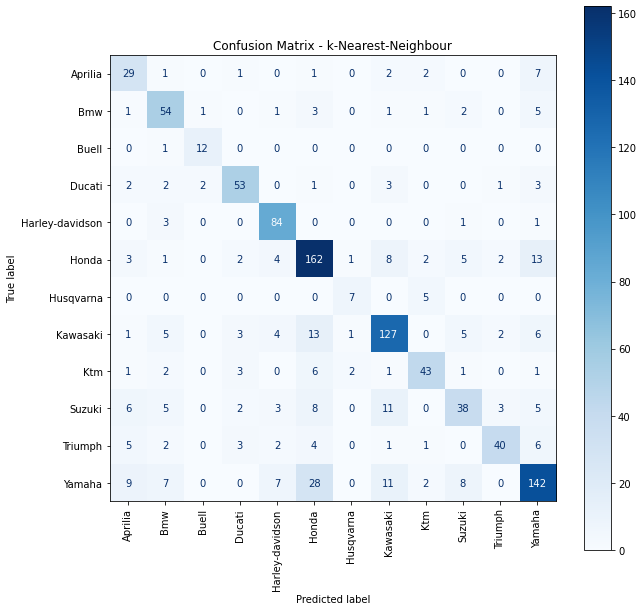

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn_sklearn, X_test_knn, y_test_knn, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - k-Nearest-Neighbour')
plt.show()

**Fazit KNN Modell**  
Das KNN Modell erreicht einen F1_score von 0.71 auf den Testdaten mit k=7. Da KNN mit höheren Dimensionen immer mehr Daten benötigt (Dichte der Datenpunkte wird mit zunehmender Dimension geringer und das Modell daher weniger präzise) wurde das KNN Datenset auf die Nummerischen Werte reduziert. Das Anwenden von Integer Encoding auf Body_shape und colour2 wurde getestet, führte aber zu einem schlechteren Score, vermutlich durch das 'Dimension Curse' Problem unter dem KNN leidet.

Die Daten wurden standardisiert um die Attributverhältnisse auf die gleiche Ebene zu bringen. Das KNN-Modell vergleicht für eine Vorhersage die Anzahl vorhandenen Nachbarn und entscheidet sich für entsprechende gleiche Mehrzahl. Der Nachteil ist das für eine Vorhersage die Ähnlichkeiten (Distanz der Attribute) von Daten verwendet werden. Eine Erklärung weshalb diese ähnlich sind wird nicht geklärt. Das kann auch in den wenigen Parameter die zur Optimierung verfügbar sind gesehen werden. Ein Model das mit komplexeren Daten besser umgehen kann, aber die Erklärbarkeit einschränkt.

**Model auf dem gesamten Datensat testen**  
Das Model wurde mit den upsampleten Daten trainiert. Um zu testen ob dies hilfreich war soll hier getestet werden, wie gut die Klassifizierung des Models auf dem kompletten Datensatz aussieht (Datensatz ohne künstliches upsampling von kleinen Klassen). 

In [108]:
# Daten vorbereiten
X_all_knn = df_moto_clean[attr_knn].copy().drop('brand', axis=1)
y_all_knn = df_moto_clean.copy()['brand']
X_all_knn, _, _ = MLP.normalize_data(X_all_knn)

# Modell anwenden
y_all_pred = knn_sklearn.best_estimator_.predict(X_all_knn)

# Score Model sklearn
print('Sklearn Model Score: ', knn_sklearn.best_estimator_.score(X_all_knn, y_all_knn).round(4))

# F1 Score Testdaten
print('Kompleter Datensatz Scores:')
knn2_sklearn_acc, knn2_sklearn_acc, knn2_sklearn_pre, knn2_sklearn_f1 = calc_class_scores(y_all_knn, y_all_pred, print_info=True)


Sklearn Model Score:  0.8585
Kompleter Datensatz Scores:
Accuracy: 0.859
Precision: 0.846
Recall: 0.858
F1: 0.850 



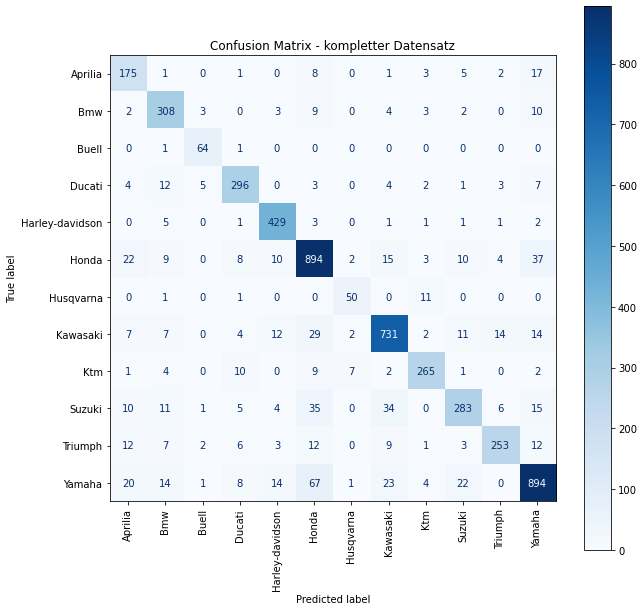

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn_sklearn.best_estimator_, X_all_knn, y_all_knn, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - kompletter Datensatz')
plt.show()

**Fazit KNN-Modell auf dem kompletten Datensatz**  
Wie in der Confusion-Matrix und dem Score (F1=0.85) ersichtlich findet eine relativ Gute Klassifizeriung statt. Hier fällt auch wieder die sehr präzise Klassifizierung der kleinen Klassen Buell und Husqvarna auf. Intressant wäre es auszuprobieren ob ein upsampling auf allen Klassen und Training des Modells die Zuordnung der Marke verbessert.

**Resample Test 5500 -> 24'000**  
Das upsampling der Daten von ca. 5500 auf 24'000 Datenpunkte auf dem Trainingset wurde getestet, führt bei RandomSearchCV mit cv= 8 auf einen Trainingsscore von 0.97.  Da aber resample nur Observationen kopiert scheint dies wohl auf einen hohe Variance (Overfitting) hizudeuten (KFold wurde verwendet um mögliche Repetitionen des Resamplings aufzuheben). Der schlechtere F1-Score (0.67) auf dem originalen kompletten Datensatz bestätigt diese Annahme. [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) wäre eine weitere Methode um ein upsampling zu testen. Dabei werden Daten nicht kopiert sondern neue ähnliche Datenpunkte erschaffen.  
Inwieweit es sinnvoll ist Datensätze künstlich zu vergrössern bleibt aber fragwürdig, wo ist die Grenze? Vorhersagen auf neue Daten werden vermutlich nicht präziser sein. Der Test zeigt aber das neben der Scores und der Confusion-Matrix auch auf die Methode wie Modelle entwickelt wurden geachtet werden sollte. Als Kunde ist es ebenfalls sinnvoll ein eigenes Testset zurückzuhalten um  Modelle zu testen.

### Aufgabe 10 - Übersicht der Resultate (3 Punkte)

Stelle die Resultate der verschiedenen Modelle zur Vorhersage von `brand` in einer Tabelle zusammen und auch graphisch dar.  

Diskutiere deine Einsichten.

In [110]:
# YOUR CODE HERE
info = ['Score Trainingsdaten', 'Score Testdaten', 'Score kompletter Datensatz', 
       'Score Testdaten, class_weight=balanced ', 'Score Testdaten, class_weight = None',
       'Upsampling test CV']
aufgabe = ['Aufgabe 3', 'Aufgabe 5', 'Aufgabe 8', 'Aufgabe 9']

res_dict = {'Model':['log_modell1', 'log_modell_weight_true', 'log_modell_weight_false',
                     'mlp_sklearn', 'mlp_sklearn',
                     'tree_sklearn','tree_sklearn',
                     'knn_sklearn','knn_sklearn'
                    ],
           'F1_score':[F1_log_modell, F1_log_modell2, F1_log_modell3,
                       mlp1_sklearn_f1, mlp2_sklearn_f1,
                       tree2_sklearn_f1, tree3_sklearn_f1, 
                       knn1_sklearn_f1, knn2_sklearn_f1            
           ],
           'Beschreibung':[info[1], info[1], info[1],
                           info[1], info[2],
                           info[1], info[2],
                           info[1], info[2]           
           ], 
            'Aufgabe': [aufgabe[0], aufgabe[0], aufgabe[0],
                       aufgabe[1], aufgabe[1],
                       aufgabe[2], aufgabe[2],
                       aufgabe[3], aufgabe[3]]
           }

**Resulate der Modelle in Tabellenform**

In [111]:
# Tabellarische Übersicht nach Aufgaben
result_models = pd.DataFrame(res_dict)
result_models

,Model,F1_score,Beschreibung,Aufgabe
0,log_modell1,0.340200,Score Testdaten,Aufgabe 3
1,log_modell_weight_true,0.370648,Score Testdaten,Aufgabe 3
2,log_modell_weight_false,0.373468,Score Testdaten,Aufgabe 3
3,mlp_sklearn,0.576743,Score Testdaten,Aufgabe 5
4,mlp_sklearn,0.717565,Score kompletter Datensatz,Aufgabe 5
5,tree_sklearn,0.710194,Score Testdaten,Aufgabe 8
6,tree_sklearn,0.835792,Score kompletter Datensatz,Aufgabe 8
7,knn_sklearn,0.719423,Score Testdaten,Aufgabe 9
8,knn_sklearn,0.850117,Score kompletter Datensatz,Aufgabe 9


In [112]:
# Tabellarische Übersicht sortiert nach Scores
result_models = pd.DataFrame(res_dict)
result_models.sort_values(by=['Beschreibung', 'F1_score'], ascending=True, inplace=True)
result_models.reset_index(drop=True, inplace=True)
result_models

,Model,F1_score,Beschreibung,Aufgabe
0,log_modell1,0.340200,Score Testdaten,Aufgabe 3
1,log_modell_weight_true,0.370648,Score Testdaten,Aufgabe 3
2,log_modell_weight_false,0.373468,Score Testdaten,Aufgabe 3
3,mlp_sklearn,0.576743,Score Testdaten,Aufgabe 5
4,tree_sklearn,0.710194,Score Testdaten,Aufgabe 8
5,knn_sklearn,0.719423,Score Testdaten,Aufgabe 9
6,mlp_sklearn,0.717565,Score kompletter Datensatz,Aufgabe 5
7,tree_sklearn,0.835792,Score kompletter Datensatz,Aufgabe 8
8,knn_sklearn,0.850117,Score kompletter Datensatz,Aufgabe 9


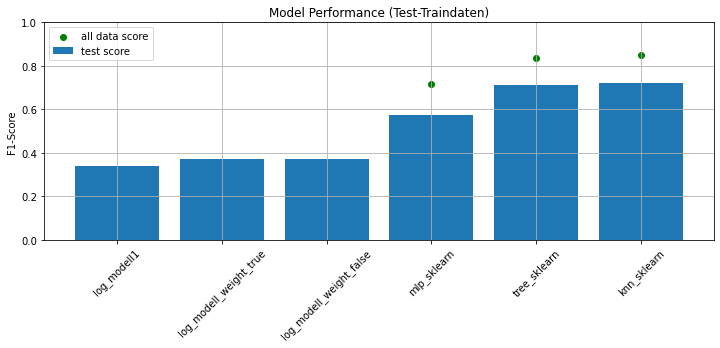

In [113]:
# best of model (testdata) als Barplot
model_test_scores = result_models.loc[0:5, ['Model', 'F1_score']]
model_all_data_scores = result_models.loc[6:9, ['Model', 'F1_score']]

# plot
plt.figure(figsize=(12,4))
plt.bar(model_test_scores['Model'], model_test_scores['F1_score'], label='test score')
plt.scatter(model_all_data_scores['Model'], model_all_data_scores['F1_score'], marker='o', color='green', label='all data score')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title('Model Performance (Test-Traindaten)')
plt.ylabel(r'F1-Score')
plt.legend(loc=2)
plt.grid()
plt.show()

Die erste Tabelle ist in der bearbeiteten Reihenfolge nach Aufgaben. Die zweite Tabelle sortiert die Resultate der verschiedenen Modelle.  

**Vorbereitung der Daten**
In den Trainingsdaten wurde das Ungleichgewicht von einzelnen Klassen (z.B Marke: Buell und Husqvarna) im originalen Datenset adressiert. Mit preprocessing resampling wurden die kleinen Klassen künstlich erweitert (kopiert), um Modelle zu trainieren die alle Klassen berücksichtigen (Aufteilung in Aufgabe 2 ersichtlich). 

**Zu den Modellen:**  
Das Aufbereiten der Daten hat einen grossen Einfluss auf die Modelle. Wird Imbalance nicht angesprochen sind höhere Accuracyy Scores möglich, da Falschklassifikation von wenigen Daten keine grosse Rolle spielen. Daher ist es sinnvoll die weiteren Metriken wie F1 zu berücksichtigen. Einen guten Score heisst nicht dass das Modell gut ist. Die Anwendung der verschiedenen Modelle von sklearn folgt einem  Muster. Die jeweilige Dokumentation zum Modell ist einheitlich und die Parameter, die optimiert werden sollen, werden kurz beschrieben. Die Optimierung kann dann mit RandomizedSeachCV für eine erste schnelle Optimierung und GridSearchCV für eine genauere Optimierung verwendet werden.  

Weiter ist zu beachten dass für verschiedene Modelle die Daten weiter aufbereitet werden müssen. Zum Beispiel müssen Kategorische Attribute zum verrechnen in nummerische Werte umgewandelt werde. Bei Integer-encoding können kategorische Werte zu nummerischen Werte umgerechnet werden(class1 = 1, class2 = 2, class3 = 3). Dadurch ensteht aber eine Rangfolge ( 1 < 2), um diese zu verhindern wurde OneHotEncoding eingesetzt. Mit `pd.get_dummies()` wird jede Klasse eines Attributes zu einer neuen Spalte und beschreibt mit 0 oder 1, ob die Klasse enthalten ist. Wichtig ist zudem die anderen numerschischen Werte zu standardisieren um Vergleiche auf dem selbem Niveau zu erhalten.

OneHotEncoding wurde für das Logistische Modell, Decision Tree und MultiLayerPerceptron Modell eingesetzt. Beim Knn Modell wäre das Grundsätzlich auch möglich, aber je höher die Dimensionen umso mehr Daten benötigt KNN für eine präzise Vorhersage (Dimension Curse). Aus den Auswertungen, von zum Beispiel Feature Importance des Decision Trees, wurde daher für KNN nur die relevanten technischen Attribute verwendet.

**Modell Resultate:**  
Auf den Testdaten führt knapp das DecisionTree-Modell. Der F1-Score auf dem kompletten Datenset ist mit Vorsicht zu geniessen da in dem kompletten Datenset einen grossen Teil der Trainingsdaten verwendet wurde. In der Aufgabe 5 zum MLP wurde festgestellt dass das erhöhen der Anzahl Layer den Testscore weiter verbessern kann. Um das Overfitting zu unterbinden kann RandomizedSearchCV helfen die optimalen Parameter zu finden. Somit wären für das MLP bessere Scores möglich, falls man die Absicht hat den Score hochzutreiben. Hier wurde auf Crossvalidation von RandomizedSearchCV vertraut um das Modell zu optimieren und nicht den Score.
Das Modell mit dem besten Score auf dem kompletten Datensatz ist auch wieder der Decision Tree. Anhand der Scores und der Confusion Matrix ist auch ersichtlich dass die Vorhersage der Zielvariable 'brand' wohl komplexer für einige Marken (Honda, Yamaha sehr ähnliche Hersteller) ist und mit einfachen Modellen wie der Logistischen Regression nicht gut abgebildet werden kann.

**Abschluss:**  
Der Einsatz von Modellen, wie der Logistischen Regression, (Ridge-Lasso Regression aus der Challenge 1) dienen sehr gut als Baseline Modell, um zu sehen wie gut einfache Modelle mit einem Problem klar kommen. Falls nun einfache Modelle auf komplexe Problem stossen, schneiden diese aber schlecht ab. Komplexere Modell wie ein MLP können dann eingesetzt werden. Mit dem Nachteil, dass das Modell nicht mehr einfach zu interpretieren ist. MLP, KNN und andere komplexere Modell leiden unter diesem Problem. Aber in wohl vielen komplexeren Problemstellungen, ist man froh wenn dennoch eine Optimierung erfolgen kann. 